# Project Chicago: Transform ResStock UPGRADE Results to 15 SFD prototypes (Elevate Energy)
Created on: 12/15/2020 \
By: Lixi Liu (Lixi.Liu@nrel.gov)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
print(f'Notebook path: {os.getcwd()}')

Notebook path: /Users/lliu2/Documents/GitHub/resstock/files


### Download results online
* unprocessed upgrade results: S3/resbldg-datasets/chicagoeui
* processed result tables for plots: https://nrel.sharepoint.com/sites/ChicagoRetrofits/Shared%20Documents/Forms/AllItems.aspx?viewid=289cdd1a%2D97c9%2D4bcc%2D8416%2Dc19bf01c6302&id=%2Fsites%2FChicagoRetrofits%2FShared%20Documents%2FGeneral%2FUpgrade%20results

### Initialize
For modifying plots, can go directly to section 2.3 after initialization

In [2]:
# local path to downloaded results
iteration = '02a' # <----- options: '02a', '02b'
iter_path = f'cookcnty_upgrades_{iteration}'
result_dir = '/Users/lliu2/Documents/Chicago retrofits/ResStock results'
result_path = os.path.join(result_dir,iter_path)

## create folder for post-processed results:
if not os.path.exists(os.path.join(result_path, 'processed results')):
    os.mkdir(os.path.join(result_path, 'processed results'))
    
## create folder for exported baseline and upgrade results to csv (to share with Elevate):
combined_res_csv_path = os.path.join(result_path, 'processed results', 'raw combined csvs')
if not os.path.exists(combined_res_csv_path):
    os.mkdir(combined_res_csv_path)
    
## create folder for plots:
plot_path = os.path.join(result_path, 'processed results', 'plots')
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

print(f'Result path: \n   {result_path}')


Result path: 
   /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a


### Functions

In [3]:
def add_sqft_eui(df):
    global res
    sqft_map = {'0-499': 328,
                '500-749': 633,
                '750-999': 885,
                '1000-1499': 1220,
                '1500-1999': 1690,
                '2000-2499': 2176,
                '2500-2999': 2663,
                '3000-3999': 3301,
                '4000+': 8194}

    df['sqft'] = res['build_existing_model.geometry_floor_area'].map(sqft_map)
    df['gas_eui'] = df['simulation_output_report.total_site_natural_gas_therm'].divide(df['sqft']) # therm/sqft
    df['elec_eui'] = df['simulation_output_report.total_site_electricity_kwh'].divide(df['sqft']) # kwh/sqft
    df['site_eui'] = df['simulation_output_report.total_site_energy_mbtu'].divide(df['sqft'])*1000 # kbtu/sqft
    
    return df

print('func loaded: "add_sqft_eui"')

def get_res_by_prototype(df, slice_by_df, row):
    """
    df: df to slice on
    slice_by_df: df used to do the slicing
    """
    res_group_i = df[slice_by_df['build_existing_model.geometry_stories'].isin(row['Stories'].split(',')) & \
        slice_by_df['build_existing_model.geometry_wall_type'].isin(row['WallType'].split(',')) & \
        slice_by_df['build_existing_model.vintage_acs'].isin(row['Vintage'].split(',')) & \
        slice_by_df['build_existing_model.geometry_building_type_recs'].isin(['Single-Family Detached'])]
    res_group_i = res_group_i[res_group_i['completed_status']=="Success"]
    
    return res_group_i

print('func loaded: "get_res_by_prototype"')

func loaded: "add_sqft_eui"
func loaded: "get_res_by_prototype"


### 1. BASELINE results

In [4]:
save_a_copy_in_csv = True # <-----
res = pd.read_parquet(os.path.join(result_path,'baseline','results_up00.parquet'))

# (1) get sqft, gas/elec/site eui
res = add_sqft_eui(res)

if save_a_copy_in_csv:
    res.to_csv(os.path.join(combined_res_csv_path,'results_baseline.csv'), index=False)
res

,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.applicable,...,qoi_report.average_of_top_ten_highest_peaks_timing_cooling_hour,qoi_report.average_of_top_ten_highest_peaks_timing_heating_hour,qoi_report.average_of_top_ten_highest_peaks_use_cooling_kw,qoi_report.average_of_top_ten_highest_peaks_use_heating_kw,qoi_report.peak_magnitude_timing_kw,qoi_report.peak_magnitude_use_kw,sqft,gas_eui,elec_eui,site_eui
0,1,111,2021-01-16 13:02:15,2021-01-16 13:03:40,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,16.909091,18.545455,18.585986,14.853667,4697.0,20.743684,885.0,1.147362,11.142590,152.728881
1,2,60,2021-01-16 22:34:09,2021-01-16 22:35:49,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,14.727273,18.545455,17.924759,9.109371,4791.0,21.032739,3301.0,0.456519,3.047444,56.039339
2,3,193,2021-01-16 15:03:37,2021-01-16 15:05:03,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,16.272727,18.090909,14.121335,11.013050,4742.0,17.635847,1690.0,0.679216,4.243502,82.384863
3,4,181,2021-01-16 20:01:20,2021-01-16 20:02:46,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,16.272727,18.545455,11.852284,9.437454,4790.0,13.289626,2176.0,0.574673,4.678334,73.416766
4,5,101,2021-01-16 11:52:51,2021-01-16 11:54:10,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,16.272727,13.454545,17.982806,29.960426,618.0,32.823039,1690.0,0.000000,11.732754,40.033788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37531,37532,141,2021-01-17 00:17:22,2021-01-17 00:24:46,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,14.454545,10.727273,171.317433,276.895478,618.0,303.681271,1220.0,0.104677,122.180347,427.361550
37532,37533,56,2021-01-16 16:48:17,2021-01-16 17:34:26,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,12.636364,14.363636,746.415132,992.303666,137.0,1100.661002,633.0,1.643015,1107.772888,3944.137310
37533,37534,225,2021-01-16 22:38:52,2021-01-16 22:53:23,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,13.090909,16.454545,878.071523,828.026784,5391.0,1009.137630,1220.0,16.806858,210.412072,2398.240548
37534,37535,35,2021-01-16 08:22:38,2021-01-16 08:33:06,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,14.909091,6.000000,195.767812,840.312740,630.0,926.739790,885.0,0.000000,287.434379,980.766028


In [5]:
# assign heating/cooling
cooling_col = 'build_existing_model.hvac_cooling_type'
heating_col = 'build_existing_model.hvac_heating_type_and_fuel'
print('selected')

# if using a national run
if iteration == '_national_2018':
    res = res[res['build_existing_model.ahs_region']=='CBSA Chicago-Naperville-Elgin, IL-IN-WI'].reset_index(drop=True)
    res
    

selected


### 1.1. Check housing charateristics distributions in BASELINE

In [96]:
proto_chars = ['build_existing_model.geometry_stories',
              'build_existing_model.geometry_wall_type',
              'build_existing_model.vintage_acs',
              cooling_col,
              heating_col,
              'build_existing_model.geometry_floor_area'
             ]

Ns = len(res.query('completed_status=="Success"')); N = len(res)
print(f'>>> ResStock - {iter_path} - BASELINE result summary:\n')
print(f'  * {Ns} / {N} samples ran successfully, {N-Ns} failed, efficacy: {Ns/N:.1%} \n')

print('>>> Housing characteristics splits:\n')

Res_char = []
for i, char in enumerate(proto_chars,1):
    Nchar = res.groupby(char)['building_id'].count()
    Nchar = Nchar/Ns
    Nchar['N_failed'] = len(res[res[char].isnull()])
    print(f'  * [{i}] {Nchar}\n')
    
    ## append for export
    Nchar = Nchar.rename('fraction').to_frame()
    Nchar['housing_char'] = Nchar.index.name
    Res_char.append(Nchar)
    
Res_char = pd.concat(Res_char, axis=0)
Res_char.index.name = 'sub_char'
Res_char = Res_char.reset_index()
Res_char = Res_char[['housing_char','sub_char','fraction']]

Res_char.to_csv(os.path.join(result_path, 'baseline', 'baseline_housing_char_breakdown.csv'), index=False)
print(f'>>> file saved to:\n  {os.path.join(result_path, "baseline")}')

>>> ResStock - cookcnty_upgrades_02a - BASELINE result summary:

  * 37512 / 37536 samples ran successfully, 24 failed, efficacy: 99.9% 

>>> Housing characteristics splits:

  * [1] build_existing_model.geometry_stories
1            0.528151
2            0.247254
3            0.224595
N_failed    24.000000
Name: building_id, dtype: float64

  * [2] build_existing_model.geometry_wall_type
Masonry      0.728967
WoodStud     0.271033
N_failed    24.000000
Name: building_id, dtype: float64

  * [3] build_existing_model.vintage_acs
1940-59      0.241523
1960-79      0.255838
1980-99      0.123640
2000-09      0.070351
2010s        0.011490
<1940        0.297158
N_failed    24.000000
Name: building_id, dtype: float64

  * [4] build_existing_model.hvac_cooling_type
Central AC     0.604047
Heat Pump      0.025645
None           0.053903
Room AC        0.316405
N_failed      24.000000
Name: building_id, dtype: float64

  * [5] build_existing_model.hvac_heating_type_and_fuel
Electricity ASHP   

### 1.2. Add additional metrics to Baseline

In [97]:
# (2) aggregate heating and cooling end uses in ResStock results
res['total_gas_heating'] = res['simulation_output_report.natural_gas_central_system_heating_therm'] +\
    res['simulation_output_report.natural_gas_heating_therm']

res['total_elec_heating'] = res['simulation_output_report.electricity_central_system_heating_kwh'] +\
    res['simulation_output_report.electricity_central_system_pumps_heating_kwh'] +\
    res['simulation_output_report.electricity_fans_heating_kwh'] +\
    res['simulation_output_report.electricity_heating_kwh'] +\
    res['simulation_output_report.electricity_pumps_heating_kwh']

res['total_elec_cooling'] = res['simulation_output_report.electricity_central_system_cooling_kwh'] +\
    res['simulation_output_report.electricity_central_system_pumps_cooling_kwh'] +\
    res['simulation_output_report.electricity_cooling_kwh'] +\
    res['simulation_output_report.electricity_fans_cooling_kwh'] +\
    res['simulation_output_report.electricity_pumps_cooling_kwh']

## EE prototype tags
res['vintage_ee'] = '3: post-1978'
res.loc[res['build_existing_model.vintage_acs'].isin(['1940-59','1960-79']),'vintage_ee'] = '2: 1942-1978'
res.loc[res['build_existing_model.vintage_acs']=='<1940','vintage_ee'] = '1: pre-1942'

res['stories'] = '2: 2+ stories'
res.loc[res['build_existing_model.geometry_stories']=='1','stories'] = '1: <2 stories'

print('new cols added to "res"')
res

new cols added to "res"


,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,apply_upgrade.reference_scenario,build_existing_model.ahs_region,build_existing_model.applicable,...,elec_rate,elec_CO2_rate,gas_fixed,gas_rate,gas_CO2_rate,total_gas_heating,total_elec_heating,total_elec_cooling,vintage_ee,stories
0,1,111,2021-01-16 13:02:15,2021-01-16 13:03:40,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.126207,0.000835,45.32,1.84944,0.005322,642.139144,0.000000,1830.084576,2: 1942-1978,1: <2 stories
1,2,60,2021-01-16 22:34:09,2021-01-16 22:35:49,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.126207,0.000835,45.32,1.84944,0.005322,1272.791202,1050.107151,2732.180807,3: post-1978,2: 2+ stories
2,3,193,2021-01-16 15:03:37,2021-01-16 15:05:03,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.126207,0.000835,45.32,1.84944,0.005322,936.514162,747.775468,1011.999828,3: post-1978,2: 2+ stories
3,4,181,2021-01-16 20:01:20,2021-01-16 20:02:46,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.126207,0.000835,45.32,1.84944,0.005322,843.126544,91.309419,981.346347,2: 1942-1978,1: <2 stories
4,5,101,2021-01-16 11:52:51,2021-01-16 11:54:10,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.107257,0.000835,0.00,0.00000,0.005322,0.000000,8942.899697,1845.669229,3: post-1978,1: <2 stories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37531,37532,141,2021-01-17 00:17:22,2021-01-17 00:24:46,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.107257,0.000835,21.51,1.70274,0.005322,0.000000,84557.737644,20851.199289,2: 1942-1978,2: 2+ stories
37532,37533,56,2021-01-16 16:48:17,2021-01-16 17:34:26,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.107257,0.000835,21.51,1.70274,0.005322,0.000000,217934.112261,83348.836776,3: post-1978,2: 2+ stories
37533,37534,225,2021-01-16 22:38:52,2021-01-16 22:53:23,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.126207,0.000835,45.32,1.84944,0.005322,12756.098623,15140.706650,48942.798465,3: post-1978,2: 2+ stories
37534,37535,35,2021-01-16 08:22:38,2021-01-16 08:33:06,Success,None,None,,"CBSA Chicago-Naperville-Elgin, IL-IN-WI",True,...,0.126207,0.000835,0.00,0.00000,0.005322,0.000000,163085.847446,27179.552877,3: post-1978,2: 2+ stories


### 1.3. Get BASELINE results by building prototypes from Elevate Energy
#### Note: cannot add prototype tags directly to ResStock results as prototypes overlap in chars

In [98]:
## Load prototype csv
groups = pd.read_csv(os.path.join(result_dir,'Groups.csv'))
print('prototypes loaded')


prototypes loaded


In [99]:
### (1) get count & median consumption
Metric_map1 = {'count': 'completed_status',
           'median gas': 'simulation_output_report.total_site_natural_gas_therm',
           'median elec': 'simulation_output_report.total_site_electricity_kwh'}

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map1.items():
        if metric == 'count':
            groups.loc[i, 'count'] = len(res_group_i)
        else:
            groups.loc[i, metric] = res_group_i[res_var].median()

groups['Gas Diff-med(%)'] = ((groups['Non-normalized gas usage'] - groups['median gas']) / groups['Non-normalized gas usage']) * 100
groups['Elec Diff-med(%)'] = ((groups['Non-normalized elec. usage'] - groups['median elec']) / groups['Non-normalized elec. usage']) * 100
print('>> (1) median consumption computed')


>> (1) median consumption computed


In [100]:
### (2) get mean consumption
Metric_map2 = {'mean gas': 'simulation_output_report.total_site_natural_gas_therm',
           'mean elec': 'simulation_output_report.total_site_electricity_kwh'} # metric: res_var

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

groups['Gas Diff-mean(%)'] = ((groups['Non-normalized gas usage'] - groups['mean gas']) / groups['Non-normalized gas usage']) * 100
groups['Elec Diff-mean(%)'] = ((groups['Non-normalized elec. usage'] - groups['mean elec']) / groups['Non-normalized elec. usage']) * 100
print('>> (2) mean consumption computed')


>> (2) mean consumption computed


In [101]:
### (3) get median & mean sqft & eui
Metric_map1 = {'median sqft': 'sqft',
               'median gas eui': 'gas_eui', 
               'median elec eui': 'elec_eui'}
Metric_map2 = {'mean sqft': 'sqft', 
               'mean gas eui': 'gas_eui', 
               'mean elec eui': 'elec_eui'}

for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row) # <----
    
    ### (3.1) get median values
    for metric, res_var in Metric_map1.items():
        groups.loc[i, metric] = res_group_i[res_var].median()

    ### (3.2) get mean values
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = \
            res_group_i[res_var].mean()

print('>> (3) median & mean sqft & eui computed:');

groups.set_index(['HousingGroupNo','HousingGroupName'])[['median sqft', 'mean sqft',
                                                         'median gas','mean gas',
                                                         'median gas eui', 'mean gas eui', 
                                                         'median elec','mean elec', 
                                                         'median elec eui','mean elec eui']]


>> (3) median & mean sqft & eui computed:


,,median sqft,mean sqft,median gas,mean gas,median gas eui,mean gas eui,median elec,mean elec,median elec eui,mean elec eui
HousingGroupNo,HousingGroupName,,,,,,,,,,
1,Masonry Post-1978 less than 2 stories,2176.0,2394.582482,814.176472,896.130657,0.404468,0.438007,8455.592702,9505.954978,4.043285,4.686193
2,Masonry All Years Split Level,1690.0,2000.196867,1160.188446,1286.125679,0.693515,0.736299,8691.571343,10070.158070,5.107963,5.887168
3,Masonry Post-1978 2 or more stories,3301.0,4058.270428,1331.608504,1366.550260,0.386128,0.418799,11165.891658,13064.820710,3.400469,3.869549
4,Masonry 1942-1978 Less than 2 Stories,1690.0,1680.132653,1041.965863,1136.678048,0.690638,0.723748,8219.999688,9273.250513,5.317172,6.075352
5,Masonry 1942-1978 2 or more stories,2176.0,2392.638539,1585.851757,1670.642890,0.756901,0.785800,9836.595137,11514.446868,4.715166,5.582744
6,Masonry Pre-1942 less than 2 stories,1220.0,1460.060606,1362.174432,1433.432127,1.018897,1.061736,8385.192118,9471.866153,6.422198,7.091857
7,Masonry Pre-1942 2 or more stories,2176.0,2552.909881,1818.719734,1974.210154,0.872846,0.910926,10400.016131,12793.552010,4.945490,6.097888
8,Frame Post-1978 Less than 2 stories,2176.0,2243.300336,857.015417,938.155517,0.458100,0.480878,8409.295904,9527.363743,4.423384,4.976688
9,Frame Post-1978 Split Level,2176.0,3012.053452,1098.217867,1221.660736,0.466244,0.484808,9431.754031,11368.460001,3.875454,4.567690


In [102]:
### (4) optional - get heating and cooling end uses to "groups"
Metric_map1 = ['frac_gas_heating', 'frac_elec_heating', 'frac_elec_cooling']
Metric_map2 = {'size_heating_kbut_h': 'simulation_output_report.size_heating_system_kbtu_h',
               'size_cooling_kbut_h': 'simulation_output_report.size_cooling_system_kbtu_h'}


for i, row in groups.iterrows():
    res_group_i = get_res_by_prototype(res, res, row)
    
    ### (4.1) get fractions
    groups.loc[i, 'frac_gas_heating'] = res_group_i['total_gas_heating'].mean() / \
        res_group_i['simulation_output_report.total_site_natural_gas_therm'].mean()

    groups.loc[i, 'frac_elec_heating'] = res_group_i['total_elec_heating'].mean() / \
        res_group_i['simulation_output_report.total_site_electricity_kwh'].mean()
    
    groups.loc[i, 'frac_elec_cooling'] = res_group_i['total_elec_cooling'].mean() / \
        res_group_i['simulation_output_report.total_site_electricity_kwh'].mean()
    
    ### (4.2) get mean values
    for metric, res_var in Metric_map2.items():
        groups.loc[i, metric] = res_group_i[res_var].mean()

print('(4) heating and cooling end uses computed')

(4) heating and cooling end uses computed


In [103]:
### (5) optional - get heating & cooling and floor area char breakdowns
House = []
House_chars = [cooling_col, heating_col,
              #'build_existing_model.geometry_floor_area',
              'build_existing_model.insulation_unfinished_attic']

for i, row in groups.iterrows():
    
    res_group_i = get_res_by_prototype(res, res, row)
    
    Ns = len(res_group_i)
    Hi = []
    for char in House_chars:
        Nchar = res_group_i.groupby(char)['building_id'].count()/Ns # fractions
        Nchar = Nchar.rename('fraction').to_frame()
        Nchar['housing_char'] = Nchar.index.name
        Hi.append(Nchar)
    
    Hi = pd.concat(Hi, axis=0)
    Hi.index.name = 'sub_char'
    Hi = Hi.reset_index()
    Hi['HousingGroupNo'] = row['HousingGroupNo']
    
    House.append(Hi)
    
House = pd.concat(House, axis=0)
House = pd.pivot_table(House, values='fraction', index=['HousingGroupNo'],
                    columns=['housing_char','sub_char'], aggfunc=np.sum)

print('(5) heating & cooling and floor area char breakdowns computed')

(5) heating & cooling and floor area char breakdowns computed


In [104]:
### Combine "groups" + "House" into "Out" for export
out = groups.drop(['Stories','WallType','Vintage'], axis=1)
out = pd.concat([out.set_index('HousingGroupNo')], axis=1, keys=['none']).join(House)

out

none                     \
                                     HousingGroupName Chicago Prevalence   
HousingGroupNo                                                             
1               Masonry Post-1978 less than 2 stories           0.009009   
2                       Masonry All Years Split Level           0.012012   
3                 Masonry Post-1978 2 or more stories           0.044044   
4               Masonry 1942-1978 Less than 2 Stories           0.235235   
5                 Masonry 1942-1978 2 or more stories           0.072072   
6                Masonry Pre-1942 less than 2 stories           0.160160   
7                  Masonry Pre-1942 2 or more stories           0.041041   
8                 Frame Post-1978 Less than 2 stories           0.001001   
9                         Frame Post-1978 Split Level           0.004004   
10                  Frame Post-1978 2 or more stories           0.025025   
11                Frame 1942-1978 less than 2 stories           0.082082   
12                         Frame Pre-1942 Split Level           0.014014   
13                  Frame 1942-1978 2 or more stories           0.023023   
14                 Frame Pre-1942 less than 2 stories           0.218218   
15                   Frame Pre-1942 2 or more stories           0.059059   

                                                              \
               Cook Cnty Prevalence Non-normalized gas usage   
HousingGroupNo                                                 
1                          0.012987                     1133   
2                          0.019980                     1416   
3                          0.032967                     1812   
4                          0.191808                     1210   
5                          0.045954                     1427   
6                          0.073926                     1504   
7                          0.021978                     2044   
8                          0.015984                     1054   
9                          0.021978                     1168   
10                         0.087912                     1422   
11                         0.183816                     1176   
12                         0.064935                     1297   
13                         0.066933                     1530   
14                         0.109890                     1340   
15                         0.048951                     1753   

                                                                              \
               Non-normalized elec. usage   count   median gas   median elec   
HousingGroupNo                                                                 
1                                   10282   685.0   814.176472   8455.592702   
2                                    9661  9128.0  1160.188446   8691.571343   
3                                   18225   514.0  1331.608504  11165.891658   
4                                    8779  5488.0  1041.965863   8219.999688   
5                                   10549   794.0  1585.851757   9836.595137   
6                                    9299   726.0  1362.174432   8385.192118   
7                                   13272   921.0  1818.719734  10400.016131   
8                                    9353   596.0   857.015417   8409.295904   
9                                   10445  1347.0  1098.217867   9431.754031   
10                                  13495   751.0  1341.786474  10584.482546   
11                                   9213  3012.0  1106.606380   8094.493818   
12                                   9964  2128.0  1797.643113   9418.223428   
13                                  12543  1138.0  1690.251095   9622.460944   
14                                   9103   703.0  1417.258296   8167.086506   
15                                  11967  1425.0  1965.872773  10003.147123   

                                                 ...  \
               Gas Diff-med(%)

In [105]:
### export BASELINE prototype summary
out.to_csv(os.path.join(result_path, 'baseline', 'baseline_prototype_results.csv'), index=True)
print(f'BASELINE prototype summary saved to:\n  {os.path.join(result_path, "baseline")}')


BASELINE prototype summary saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/baseline


## 2. UPGRADE results ###

In [51]:
### upgrade result processing funcs
def assign_utility_rates_to_upgrade(p, res, HVAC_upgrades_rate_change):    
    ## assign rates
    p['gas_rate'] = res['gas_rate']
    p['gas_fixed'] = res['gas_fixed']
    p['gas_CO2_rate'] = res['gas_CO2_rate']
    p['elec_rate'] = res['elec_rate']
    p['elec_fixed'] = res['elec_fixed']
    p['elec_CO2_rate'] = res['elec_CO2_rate']
    if n in HVAC_upgrades_rate_change.keys():
        new_rates = HVAC_upgrades_rate_change[n]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_rate'] = new_rates[0]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'gas_fixed'] = new_rates[1]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_rate'] = new_rates[2]
        p.loc[(p[p['simulation_output_report.applicable']==True]).index, 'elec_fixed'] = new_rates[3]
    # assign 0 rates to building with no energy use  
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_rate'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_fixed'] = 0 
    p.loc[p['simulation_output_report.total_site_electricity_kwh']==0, 'elec_rate'] = 0 
    
    return p

def combine_upgrade_cost_and_lifetime(p):
    
    ## upgrade costs (sum)
    cost_cols = list(x for x in p.columns if x.endswith('cost_usd'))
    p['upgrade_cost'] = p[cost_cols].fillna(0).sum(axis=1)
    p = p.drop(cost_cols, axis=1)
    
    ## upgrade lifetime (max)
    lt_cols = list(x for x in p.columns if x.endswith('lifetime_yrs'))
    p['upgrade_lifetime'] = p[lt_cols].max(axis=1)
    p = p.drop(lt_cols, axis=1)

    p['upgrade_cost'] = p['upgrade_cost'].replace(0,np.nan)
    p['upgrade_lifetime'] = p['upgrade_lifetime'].replace(0,np.nan)
    
    return p

def get_annual_gas_elec_site_energy_saving(p, ref, get_col_only=False):
    """
    p: upgrade df
    ref: reference scenario df
    get_col_only: whether to return the computed col only or the entire upgrade df p
    """
    p['ann_therm_gas_saving'] = ref['simulation_output_report.total_site_natural_gas_therm']-\
         p['simulation_output_report.total_site_natural_gas_therm']
    p['ann_kwh_elec_saving'] = ref['simulation_output_report.total_site_electricity_kwh']-\
         p['simulation_output_report.total_site_electricity_kwh']
    p['ann_mbtu_site_energy_saving'] = ref['simulation_output_report.total_site_energy_mbtu']-\
        p['simulation_output_report.total_site_energy_mbtu']
    
    return p

def get_annual_energy_cost_saving(p, ref, get_col_only=False):
    """
    p: upgrade df
    ref: reference scenario df
    get_col_only: whether to return the computed col only or the entire upgrade df p
    """
    p['ann_gas_cost_saving'] = \
        ref['simulation_output_report.total_site_natural_gas_therm']*ref['gas_rate']+ref['gas_fixed']-\
         (p['simulation_output_report.total_site_natural_gas_therm']*p['gas_rate']+p['gas_fixed'])
    p['ann_elec_cost_saving'] = \
        ref['simulation_output_report.total_site_electricity_kwh']*ref['elec_rate']+ref['elec_fixed']-\
         (p['simulation_output_report.total_site_electricity_kwh']*p['elec_rate']+p['elec_fixed'])
    
    p['ann_energy_cost_saving'] = p['ann_gas_cost_saving'] + p['ann_elec_cost_saving']
    
    if get_col_only:
        return p['ann_energy_cost_saving']
    else:
        return p

def get_annual_metric_ton_co2e_saving(p, ref, get_col_only=False):
    """
    p: upgrade df
    ref: reference scenario df
    get_col_only: whether to return the computed col only or the entire upgrade df p
    """
    p['ann_metric_ton_co2e_saving'] = \
        (ref['simulation_output_report.total_site_natural_gas_therm']-\
         p['simulation_output_report.total_site_natural_gas_therm'])*p['gas_CO2_rate'] +\
        (ref['simulation_output_report.total_site_electricity_kwh']-\
         p['simulation_output_report.total_site_electricity_kwh'])*p['elec_CO2_rate']
    
    if get_col_only:
        return p['ann_metric_ton_co2e_saving']
    else:
        return p

def print_metrics_report(p):
    ### (1) check for simple_payback > 100 yr or if < 0 yr
    spb_100 = p[p['simple_payback']>100]
    if len(spb_100)>0:
        print(f'    *PAYBACK - too large* upgrade={n} has {len(spb_100)} simple_payback>100 ' +\
              f'(including {len(p[p["simple_payback"]==np.inf])} INF)')
    spb_neg = p[p['simple_payback']<0]
    if len(spb_neg)>0:
        print(f'    *PAYBACK - negative*  upgrade={n} has {len(spb_neg)} simple_payback<0 ' +\
              '(due to negative energy cost saving)')

    ### (2) check for comparative_payback > 100 yr or if < 0 yr
    spb_100 = p[p['comparative_payback']>100]
    if len(spb_100)>0:
        print(f'    *PAYBACK - too large* upgrade={n} has {len(spb_100)} comparative_payback>100 ' +\
              f'(including {len(p[p["comparative_payback"]==np.inf])} INF)')
    spb_neg = p[p['comparative_payback']<0]
    if len(spb_neg)>0:
        print(f'    *PAYBACK - negative*  upgrade={n} has {len(spb_neg)} comparative_payback<0 ' +\
              '(due to negative energy cost saving)')

    ### (3) check for eui==inf
    for eui in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui']:
        eui_inf = p[p[eui]==np.inf]
        if len(eui_inf)>0:
            print(f'       *EUI - inf* upgrade={n} has {len(eui_inf)} {eui}=INF ' +\
                  '(due to fuel introduction from upgrade)')

    ### (4) check for neg carbon savings
    ces_neg = p[p['ann_metric_ton_co2e_saving']<0]
    if len(ces_neg)>0:
        print(f'    *CARBON - negative*  upgrade={n} has {len(ces_neg)} carbon saving<0 ')

print('funcs loaded')

funcs loaded


In [126]:
### set utility rates ###
NG_rate_multiplier = 1 # <-----

if NG_rate_multiplier > 1:
    fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
else:
    fn_ext = ''

### utility rates ###########################################
# ref (EIA): 
# avg ComEd res elec rate 2019: $ 0.1330 /kWh
# weighted avg IL gas rate 2019: $ 0.77183 /therm

## electricity ##
# annual fixed rates = monthly x 12
EH_fixed = 15.70 * 12 # annual
NEH_fixed = 14.28 *12 # annual
# avg of summer rates (J,J,A,S) and non-summer rates
EH_rate = (0.10273*4+0.10952*8)/12 # 0.08019, $/kWh, electric rate for electric heating customers
NEH_rate = (0.12168*4+0.12847*8)/12 # 0.09889, $/kWh, electric rate for non-electric heating customers
# marginal carbon emission factor:
elec_CO2_rate = 0.000834702 # metric tons of CO2e/kWh

## gas ##
# annual fixed rates = monthly x 12
GH_fixed = 45.32 
NGH_fixed = 21.51 
# variable rates
GH_rate = 0.61648 * NG_rate_multiplier # 0.19477, $/therm, gas rate for NG heating customers
NGH_rate = 0.56758 * NG_rate_multiplier # 0.14964, $/therm, gas rate for non-NG heating customers
# marginal carbon emission factor:
gas_CO2_rate = 0.00532181 # metric tons of CO2e/therm


### upgrades that will cause utility rate change: ###########################################
HVAC_upgrades_rate_change = {
    27: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # SEER 15 ASHP
    28: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # SEER 22 ASHP
    31: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Room AC to Heat Pump
    32: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Shared Cooling to MSHP
    33: [GH_rate, GH_fixed,  NEH_rate, NEH_fixed], # EnergyStar 96% AFUE Natural Gas Furnace
    34: [GH_rate, GH_fixed,  NEH_rate, NEH_fixed], # EnergyStar Natural Gas Boiler
    36: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Electric Furnace to Heat Pump, High Eff
    37: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Electric Furnace to Heat Pump, Min Eff
    39: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-ducted Electric to MSHP
    40: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-ducted Non-electric to MSHP
    41: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-electric Furnace to Heat Pump, High Eff
    42: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Non-electric Furnace to Heat Pump, Min Eff
    43: [NGH_rate, NGH_fixed,  EH_rate, EH_fixed], # Shared Heating to MSHP
}

# assign rates accordingly
Elec_heating_types = ['Electricity Baseboard','Electricity ASHP','Electricity Electric Furnace',
                      'Electricity Electric Boiler', 'Electricity Electric Wall Furnace']
NG_heating_types = ['Natural Gas Fuel Wall/Floor Furnace', 'Natural Gas Fuel Furnace',
                    'Natural Gas Fuel Boiler']

res['elec_fixed'] = NEH_fixed
res['elec_rate'] = NEH_rate
res['elec_CO2_rate'] = elec_CO2_rate
res['gas_fixed'] = NGH_fixed
res['gas_rate'] = NGH_rate
res['gas_CO2_rate'] = gas_CO2_rate

res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(Elec_heating_types)]).index,
        'elec_fixed'] = EH_fixed
res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(Elec_heating_types)]).index,
        'elec_rate'] = EH_rate
res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(NG_heating_types)]).index,
       'gas_fixed'] = GH_fixed
res.loc[(res[res['build_existing_model.hvac_heating_type_and_fuel'].isin(NG_heating_types)]).index,
       'gas_rate'] = GH_rate
# assign 0 rates to building with no energy use 
res.loc[res['simulation_output_report.total_site_electricity_kwh']==0, 'elec_fixed'] = 0 
res.loc[res['simulation_output_report.total_site_electricity_kwh']==0, 'elec_rate'] = 0 
res.loc[res['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_fixed'] = 0 
res.loc[res['simulation_output_report.total_site_natural_gas_therm']==0, 'gas_rate'] = 0 

print(f'Natural gas rate multiplier: {NG_rate_multiplier}')


Natural gas rate multiplier: 1


In [80]:
## make dictionary of upgrades paths, for mapping reference scenarios ##

res_partitions = ['02a','02b'] # <------
print(f'>>> {iter_path[:-1]} has {len(res_partitions)} partitions')

## get summary table
upgrades_path_df = []

ni = 1
for part in res_partitions:
    iteration_path = f'cookcnty_upgrades_{part}'
    res_path = os.path.join(result_dir,iteration_path)

    #### count upgrades
    N_upgrades = 0

    for _, dirnames, _ in os.walk(os.path.join(res_path,'upgrades')):
        N_upgrades += len(dirnames)

    print(f'\n >> {iteration_path} has {N_upgrades:,} upgrades')
    
    for n in range(1, N_upgrades+1):
        p = pd.read_parquet(os.path.join(res_path,'upgrades',
                                         f'upgrade={n}/results_up{str(n).zfill(2)}.parquet'))
        
        upgrade_name = p['apply_upgrade.upgrade_name'].unique()[0]
        ### add to summary table
        summ = pd.DataFrame()
        if not upgrade_name.startswith('Reference'):
            summ.loc[0,'upgrade_no'] = ni
        else:
            summ.loc[0,'upgrade_no'] = np.nan
        summ.loc[0,'upgrade_name'] = upgrade_name
        summ.loc[0,'partition'] = part
        summ.loc[0,'partition_upgrade_no'] = n
        upgrades_path_df.append(summ)
        
        if not upgrade_name.startswith('Reference'):
            ni += 1
        
upgrades_path_df = pd.concat(upgrades_path_df, axis=0).reset_index(drop=True).set_index(['upgrade_name'])
upgrades_path_df

>>> cookcnty_upgrades_02 has 2 partitions

 >> cookcnty_upgrades_02a has 43 upgrades

 >> cookcnty_upgrades_02b has 36 upgrades


,upgrade_no,partition,partition_upgrade_no
upgrade_name,,,
"Air Leakage 25% Reduction, with Mech Vent under 7 ACH50",1.0,02a,1.0
"Air Leakage to 1ACH50, with Mech Vent",2.0,02a,2.0
"Attic Insulation, R-49",3.0,02a,3.0
"Attic Insulation, R-60",4.0,02a,4.0
"Finished Roof, R-49",5.0,02a,5.0
...,...,...,...
"EnergyStar Dishwasher, Most Eff",59.0,02b,32.0
Plug Loads 25% Reduction,60.0,02b,33.0
"Rooftop Solar, 4 kW",61.0,02b,34.0


### 2.1. Get UPGRADE summary

In [81]:
res_partitions = ['02a','02b'] # <------

export_all_upgrades_to_csv = False # <------

print(f'>>> {iter_path[:-1]} has {len(res_partitions)} partitions')
if export_all_upgrades_to_csv:
    print(f'    Exporting upgrades results to {combined_res_csv_path}\n')

## get summary table
summary_upgrades = []

ni = 1
for part in res_partitions:
    iteration_path = f'cookcnty_upgrades_{part}'
    res_path = os.path.join(result_dir,iteration_path)

    #### count upgrades
    N_upgrades = 0

    for _, dirnames, _ in os.walk(os.path.join(res_path,'upgrades')):
        N_upgrades += len(dirnames)

    print(f'\n >> {iteration_path} has {N_upgrades:,} upgrades')
    
    for n in range(1, N_upgrades+1):
        p = pd.read_parquet(os.path.join(res_path,'upgrades',
                                         f'upgrade={n}/results_up{str(n).zfill(2)}.parquet'))
        print(f'\nUpgrade {ni} ({part}.{n})')
        
        ### assign utility rates
        p = assign_utility_rates_to_upgrade(p, res, HVAC_upgrades_rate_change)

        ### collapse upgrade cost and lifetime cols
        p = combine_upgrade_cost_and_lifetime(p)
        
        ### check if upgrade has 0 successful sims
        if len(p[p['completed_status']=='Success']) == 0:
            print(f' * upgrade={n} has 0 successful simulations')

        ### calculate metrics
        p = add_sqft_eui(p)
        for var in ['gas_eui','elec_eui','site_eui']:
            p[f'pct_delta_{var}'] = ((p[var]-res[var])/res[var]*100)

        # annual kBtu saved per upgrade cost:
        p['ann_kbtu_saved_per_dollar'] = p['simulation_output_report.total_site_energy_mbtu'].divide(
                                p['upgrade_cost'])*1000 

        # annual energy cost saving:
        p = get_annual_energy_cost_saving(p, res)
        
        # simple payback
        p['simple_payback'] = p['upgrade_cost']/p['ann_energy_cost_saving']
        
        # comparative payback ###
        p['comparative_payback'] = np.nan
        ref_name = p['apply_upgrade.reference_scenario'].unique()[0]
        if ref_name != '':
            print(f'  - has ref scenario: {ref_name}')
            ref_info = upgrades_path_df.loc[ref_name]
            
            # load ref scenario:
            iterpath = f'cookcnty_upgrades_{ref_info["partition"]}'
            n_ref = int(ref_info['partition_upgrade_no'])
            
            ref_path = os.path.join(result_dir,iterpath)
            refp = pd.read_parquet(os.path.join(ref_path,'upgrades',
                                         f'upgrade={n_ref}/results_up{str(n_ref).zfill(2)}.parquet'))
            
            # assign utility rates
            refp = assign_utility_rates_to_upgrade(refp, res, HVAC_upgrades_rate_change)
            
            # collapse upgrade cost and lifetime cols
            refp = combine_upgrade_cost_and_lifetime(refp)
            
            # annual energy cost saving:
            ann_energy_cost_saving_ref = get_annual_energy_cost_saving(p, refp, get_col_only=True)
            
            # update comparative payback
            p['comparative_payback'] = (p['upgrade_cost']-refp['upgrade_cost'])/ann_energy_cost_saving_ref

        # annual metric ton carbon emission savings:
        p = get_annual_metric_ton_co2e_saving(p, res)
        
        ### check for neg/large paybacks, inf eui, neg carbon savings 
        print_metrics_report(p)

        ### subset to only those that have been applied with the upgrades successfully:
        p = p[p['apply_upgrade.applicable']==True].reset_index(drop=True)
        upgrade_name = p['apply_upgrade.upgrade_name'].unique()[0]
        if not upgrade_name.startswith('Reference'):
            p['upgrade_no'] = ni

        ### export upgrade results to csv 
        if export_all_upgrades_to_csv:
            p.to_csv(os.path.join(combined_res_csv_path, f'results_up{nf}.csv'), index=False)

        for eui in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui']:
            p[eui] = p[eui].replace([np.inf, -np.inf], np.nan) # for mean calc

        ### add to summary table
        summ = pd.DataFrame()
        if not upgrade_name.startswith('Reference'):
            summ.loc[0,'upgrade_no'] = ni
        else:
            summ.loc[0,'upgrade_no'] = np.nan
        summ.loc[0,'upgrade_name'] = upgrade_name
        summ.loc[0,'n_applied'] = len(p)
        summ.loc[0,'n_success'] = len(p[p['completed_status']=='Success'])
        summ.loc[0,'n_fail'] = len(p[p['completed_status']=='Fail'])
        summ['pct_success'] = round(summ['n_success']/summ['n_applied']*100,1)

        p = p[p['completed_status']=='Success']
        summ['mean_pct_delta_gas_eui'] = round(p['pct_delta_gas_eui'].mean(), 3)
        summ['mean_pct_delta_elec_eui'] = round(p['pct_delta_elec_eui'].mean(), 3)
        summ['mean_pct_delta_site_eui'] = round(p['pct_delta_site_eui'].mean(), 3)
        summ['mean_upgrade_cost'] = round(p['upgrade_cost'].mean(),2)
        summ['mean_ann_kbtu_saved_per_dollar'] = p['ann_kbtu_saved_per_dollar'].mean() # annual kBtu saved per upgrade cost
        summ['mean_ann_energy_cost_saving'] = round(p['ann_energy_cost_saving'].mean(),2)
        summ['median_simple_payback'] = p['simple_payback'].median()
        summ['median_comparative_payback'] = p['comparative_payback'].median()
        summ['mean_ann_metric_ton_co2e_saving'] = p['ann_metric_ton_co2e_saving'].mean()

        summary_upgrades.append(summ)
        if not upgrade_name.startswith('Reference'):
            ni += 1
    
summary_upgrades = pd.concat(summary_upgrades).reset_index(drop=True)
summary_upgrades


>>> cookcnty_upgrades_02 has 2 partitions

 >> cookcnty_upgrades_02a has 43 upgrades

Upgrade 1-02a.1
    *PAYBACK - too large* upgrade=1 has 1358 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=1 has 2071 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=1 has 2334 carbon saving<0 

Upgrade 2-02a.2


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=2 has 2062 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 2494 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=2 has 2861 carbon saving<0 

Upgrade 3-02a.3


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=3 has 285 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 1 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=3 has 4 carbon saving<0 

Upgrade 4-02a.4


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=4 has 1107 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=4 has 2 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=4 has 6 carbon saving<0 

Upgrade 5-02a.5


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *CARBON - negative*  upgrade=5 has 32 carbon saving<0 

Upgrade 6-02a.6


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=6 has 7732 simple_payback>100 (including 44 INF)
    *PAYBACK - negative*  upgrade=6 has 5230 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=6 has 5084 carbon saving<0 

Upgrade 7-02a.7


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=7 has 1690 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=7 has 69 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=7 has 73 carbon saving<0 

Upgrade 8-02a.8


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=8 has 25204 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=8 has 362 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=8 has 377 carbon saving<0 

Upgrade 9-02a.9


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=9 has 26943 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=9 has 115 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=9 has 119 carbon saving<0 

Upgrade 10-02a.10


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=10 has 24193 simple_payback>100 (including 4479 INF)
    *PAYBACK - negative*  upgrade=10 has 13318 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=10 has 13498 carbon saving<0 

Upgrade 10-02a.11


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Roof Replacement
    *PAYBACK - too large* upgrade=11 has 12359 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=11 has 25153 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=11 has 7791 carbon saving<0 

Upgrade 11-02a.12
    *PAYBACK - too large* upgrade=12 has 1120 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=12 has 28 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=12 has 30 carbon saving<0 

Upgrade 12-02a.13


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=13 has 161 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=13 has 34 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=13 has 36 carbon saving<0 

Upgrade 13-02a.14


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=14 has 177 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=14 has 29 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=14 has 32 carbon saving<0 

Upgrade 14-02a.15


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=15 has 2006 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=15 has 134 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=15 has 146 carbon saving<0 

Upgrade 15-02a.16


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=16 has 11498 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=16 has 160 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=16 has 172 carbon saving<0 

Upgrade 16-02a.17


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=17 has 294 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=17 has 39 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=17 has 44 carbon saving<0 

Upgrade 17-02a.18


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=18 has 681 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=18 has 40 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=18 has 45 carbon saving<0 

Upgrade 18-02a.19


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=19 has 1159 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 343 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=19 has 630 carbon saving<0 

Upgrade 19-02a.20


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=20 has 3752 simple_payback>100 (including 3 INF)
    *PAYBACK - negative*  upgrade=20 has 353 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=20 has 322 carbon saving<0 

Upgrade 20-02a.21


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=21 has 4 simple_payback>100 (including 0 INF)

Upgrade 21-02a.22


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=22 has 16 simple_payback>100 (including 0 INF)

Upgrade 22-02a.23


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=23 has 2059 simple_payback>100 (including 1507 INF)
    *PAYBACK - negative*  upgrade=23 has 1014 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=23 has 5085 carbon saving<0 

Upgrade 23-02a.24


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=24 has 17097 simple_payback>100 (including 183 INF)
    *PAYBACK - negative*  upgrade=24 has 2945 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=24 has 2952 carbon saving<0 

Upgrade 23-02a.25


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=25 has 4356 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 16181 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=25 has 75 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 20460 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=25 has 16186 carbon saving<0 

Upgrade 24-02a.26
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=26 has 18355 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=26 has 3056 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 268 comparative_payback<0 (due to negative energy cost saving)

Upgrade 25-02a.27
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=27 has 762 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=30 has 9367 simple_payback>100 (including 165 INF)
    *PAYBACK - negative*  upgrade=30 has 1854 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=30 has 1805 carbon saving<0 

Upgrade 28-02a.31


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Room AC
    *PAYBACK - too large* upgrade=31 has 517 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 275 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=31 has 320 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 347 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=31 has 3109 carbon saving<0 

Upgrade 29-02a.32
  - has ref scenario: Reference Room AC
    *PAYBACK - too large* upgrade=32 has 111 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 47 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=32 has 64 carbon saving<0 

Upgrade 30-02a.33


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=33 has 4118 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=33 has 250 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=33 has 216 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=33 has 250 carbon saving<0 

Upgrade 31-02a.34


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=34 has 299 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 21 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=34 has 17 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=34 has 21 carbon saving<0 

Upgrade 32-02a.35


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=35 has 548 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=35 has 541 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=35 has 541 carbon saving<0 

Upgrade 32-02a.36


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Furnace
    *PAYBACK - too large* upgrade=36 has 767 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 33 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=36 has 117 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=36 has 33 carbon saving<0 

Upgrade 33-02a.37
  - has ref scenario: Reference Electric Furnace
    *PAYBACK - too large* upgrade=37 has 817 simple_payback>100 (including 9 INF)
    *PAYBACK - negative*  upgrade=37 has 96 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=37 has 124 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=37 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=37 has 96 carbon saving<0 

Upgrade 34-02a.38
    *P

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=39 has 103 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=39 has 97 comparative_payback>100 (including 0 INF)

Upgrade 35-02a.40
  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=40 has 76 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=40 has 85 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=40 has 298 carbon saving<0 

Upgrade 36-02a.41


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: EnergyStar 96% AFUE Natural Gas Furnace
    *PAYBACK - too large* upgrade=41 has 967 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=41 has 242 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=41 has 4055 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=41 has 144 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=41 has 18091 carbon saving<0 

Upgrade 37-02a.42
  - has ref scenario: EnergyStar 96% AFUE Natural Gas Furnace
    *PAYBACK - too large* upgrade=42 has 942 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=42 has 249 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=42 has 5875 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=42 has 279 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=42 has 18978 ca

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=1 has 149 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=1 has 354 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=1 has 417 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=1 has 745 carbon saving<0 

Upgrade 39-02b.2


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=2 has 196 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 228 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=2 has 26 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 31 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=2 has 417 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=2 has 448 carbon saving<0 

Upgrade 40-02b.3
  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=3 has 324 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 173 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=3 has 949 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 65 comparative_payback<0 (due to negative energy cost 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Water Heater
    *PAYBACK - too large* upgrade=5 has 421 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=5 has 22 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=5 has 124 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=5 has 12 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=5 has 22 carbon saving<0 

Upgrade 42-02b.6
  - has ref scenario: Reference Electric Water Heater
    *PAYBACK - too large* upgrade=6 has 1453 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=6 has 265 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=6 has 1010 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=6 has 347 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=6 has 265 carbon saving<0 

Upgrade 43-02b.7
 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Clothes Dryer
    *PAYBACK - too large* upgrade=10 has 2368 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=10 has 1 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=10 has 20 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=10 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=10 has 1 carbon saving<0 

Upgrade 46-02b.11
    *PAYBACK - too large* upgrade=11 has 11923 simple_payback>100 (including 7271 INF)
    *PAYBACK - negative*  upgrade=11 has 4758 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=11 has 164 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=11 has 4832 carbon saving<0 

Upgrade 46-02b.12


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Fuel Clothes Dryer
    *PAYBACK - too large* upgrade=12 has 126 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=12 has 16462 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=12 has 279 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=12 has 219 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=12 has 16680 carbon saving<0 

Upgrade 47-02b.13
  - has ref scenario: Reference Fuel Clothes Dryer
    *PAYBACK - too large* upgrade=13 has 1829 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=13 has 14851 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=13 has 1625 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=13 has 14853 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=13 has 16681 carbon saving<0 



/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Pool Pump

Upgrade 49-02b.16
    *PAYBACK - too large* upgrade=16 has 280 simple_payback>100 (including 213 INF)
    *PAYBACK - negative*  upgrade=16 has 69 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=16 has 68 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



Upgrade 49-02b.17
  - has ref scenario: Reference Pool Heating

Upgrade 50-02b.18
    *PAYBACK - too large* upgrade=18 has 11617 simple_payback>100 (including 5106 INF)
    *PAYBACK - negative*  upgrade=18 has 6542 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=18 has 270 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=18 has 6662 carbon saving<0 

Upgrade 50-02b.19


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Gas Cooking
    *PAYBACK - too large* upgrade=19 has 715 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 17420 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=19 has 524 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 17398 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=19 has 18159 carbon saving<0 

Upgrade 51-02b.20
  - has ref scenario: Reference Gas Cooking
    *PAYBACK - too large* upgrade=20 has 10783 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=20 has 7375 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=20 has 10596 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=20 has 7335 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=20 has 18158 carbon saving<0 

Upgrade 52-0

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Cooking
    *PAYBACK - too large* upgrade=22 has 13887 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 4710 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=22 has 13299 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 4711 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=22 has 4707 carbon saving<0 

Upgrade 53-02b.23
    *PAYBACK - too large* upgrade=23 has 6691 simple_payback>100 (including 0 INF)

Upgrade 54-02b.24


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=24 has 25496 simple_payback>100 (including 6226 INF)
    *PAYBACK - negative*  upgrade=24 has 8482 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=24 has 8464 carbon saving<0 

Upgrade 54-02b.25


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Refrigerator
    *PAYBACK - too large* upgrade=25 has 25363 simple_payback>100 (including 6182 INF)
    *PAYBACK - negative*  upgrade=25 has 8616 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=25 has 22978 comparative_payback>100 (including 9485 INF)
    *PAYBACK - negative*  upgrade=25 has 14146 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=25 has 8591 carbon saving<0 

Upgrade 55-02b.26
  - has ref scenario: Reference Refrigerator
    *PAYBACK - too large* upgrade=26 has 34336 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 10 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=26 has 37500 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 11 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=26 has 5 carbon saving<0 

Upgrade 56

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Clothes Washer
    *PAYBACK - too large* upgrade=28 has 31 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=28 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=28 has 2 carbon saving<0 

Upgrade 57-02b.29
  - has ref scenario: Reference Clothes Washer
    *PAYBACK - too large* upgrade=29 has 13933 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=29 has 6 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=29 has 4962 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=29 has 7 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=29 has 8 carbon saving<0 

Upgrade 58-02b.30
    *PAYBACK - too large* upgrade=30 has 8650 simple_payback>100 (including 4172 INF)
    *PAYBACK - negative*  upgrade=30 has 4630 simple_payback<0 (due to negative energy cost saving)
    *

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Dishwasher
    *PAYBACK - too large* upgrade=31 has 669 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=31 has 51 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=31 has 4 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=31 has 3 carbon saving<0 

Upgrade 59-02b.32
  - has ref scenario: Reference Dishwasher
    *PAYBACK - too large* upgrade=32 has 1080 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 1 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=32 has 3982 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=32 has 8 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=32 has 10 carbon saving<0 

Upgrade 60-02b.33
    *PAYBACK - too large* upgrade=33 has 197 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=34 has 12201 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 6744 simple_payback<0 (due to negative energy cost saving)

Upgrade 62-02b.35


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


 * upgrade=35 has 0 successful simulations

Upgrade 62-02b.36
  - has ref scenario: Reference Thermostat
    *PAYBACK - too large* upgrade=36 has 934 simple_payback>100 (including 117 INF)
    *PAYBACK - negative*  upgrade=36 has 752 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=36 has 8884 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,upgrade_no,upgrade_name,n_applied,n_success,n_fail,pct_success,mean_pct_delta_gas_eui,mean_pct_delta_elec_eui,mean_pct_delta_site_eui,mean_upgrade_cost,mean_ann_kbtu_saved_per_dollar,mean_ann_energy_cost_saving,median_simple_payback,median_comparative_payback,mean_ann_metric_ton_co2e_saving
0,1.0,"Air Leakage 25% Reduction, with Mech Vent unde...",37512.0,37499.0,0.0,100.0,-8.519,-2.051,-7.340,26521.31,39.379757,1605.60,15.132339,NaN,7.088341
1,2.0,"Air Leakage to 1ACH50, with Mech Vent",37512.0,37512.0,0.0,100.0,-25.460,-4.617,-21.518,87191.06,10.591723,4816.92,19.299092,NaN,20.659686
2,3.0,"Attic Insulation, R-49",37512.0,15365.0,0.0,41.0,-6.197,-2.707,-5.646,3363.02,73.229880,242.45,36.963837,NaN,0.859332
3,4.0,"Attic Insulation, R-60",37512.0,16753.0,0.0,44.7,-6.165,-2.667,-5.603,4450.21,53.446299,236.84,49.118971,NaN,0.840167
4,5.0,"Finished Roof, R-49",37512.0,19431.0,0.0,51.8,-1.702,-1.001,-1.618,NaN,NaN,514.67,NaN,NaN,2.577067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,59.0,"EnergyStar Dishwasher, Most Eff",37512.0,13280.0,0.0,35.4,-0.379,-0.396,-0.376,21828.25,57.011836,79.11,8.445107,76.947344,0.447836
75,60.0,Plug Loads 25% Reduction,37512.0,37512.0,0.0,100.0,2.249,-15.171,-2.189,6731.14,209.608673,197.83,5.047230,NaN,8.122573
76,61.0,"Rooftop Solar, 4 kW",37512.0,37512.0,0.0,100.0,0.000,-34.508,-7.137,269245.68,4.939726,-296.86,37.463696,NaN,3.927772
77,NaN,Reference Thermostat,37512.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
### export UPGRADE summary
summary_upgrades.to_csv(os.path.join(result_path,'processed results',f'upgrades_summary{fn_ext}.csv'), index=False)
print(f'UPGRADE summary table saved to:\n  {os.path.join(result_path, "processed results")}')

UPGRADE summary table saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results


In [131]:
### optional - export specific upgrade parquet as csv
save_to_csv = False # <-----
n = 5 # <----- number or 'bl'

if save_to_csv:
    if n in ['baseline', 'bl', 0]:
        p = pd.read_parquet(os.path.join(result_path,'baseline',
                                     'results_up00.parquet'))
        p.to_csv(os.path.join(result_path,'baseline',
                                         'results_up00.csv'), index=False)
        print(f'baseline parquet file exported as csv')
        
    else:
        nf = f'0{n}' if n<10 else n
        p = pd.read_parquet(os.path.join(result_path,'upgrades',
                                         f'upgrade={n}/results_up{str(n).zfill(2)}.parquet'))
        p.to_csv(os.path.join(result_path,'upgrades',
                                         f'upgrade={n}/results_up{str(n).zfill(2)}.csv'), index=False)
        print(f'upgrade {nf} parquet file exported as csv')


upgrade 05 parquet file exported as csv


### 2.1B. Get UPGRADE results for Multi-Family

In [127]:
## Process UPGRADE results for Multi-Family

MF = ['Multi-Family with 2 - 4 Units', 'Multi-Family with 5+ Units']
res_mf = res[res['build_existing_model.geometry_building_type_recs'].isin(MF)].reset_index(drop=True)

if len(res_mf)>0:
    res_partitions = ['02a','02b'] # <------

    print('** Processing UPGRADE results for Multi-Family **')
    ## get summary table
    summary_upgrades_mf = []

    ni = 1
    for part in res_partitions:
        iteration_path = f'cookcnty_upgrades_{part}'
        res_path = os.path.join(result_dir,iteration_path)

        #### count upgrades
        N_upgrades = 0

        for _, dirnames, _ in os.walk(os.path.join(res_path,'upgrades')):
            N_upgrades += len(dirnames)

        print(f'\n >> {iteration_path} has {N_upgrades:,} upgrades')

        for n in range(1, N_upgrades+1):
            p = pd.read_parquet(os.path.join(res_path,'upgrades',
                                             f'upgrade={n}/results_up{str(n).zfill(2)}.parquet'))
            print(f'\nUpgrade {ni} ({part}.{n})')

            ### subset to MF
            p = p[res['build_existing_model.geometry_building_type_recs'].isin(MF)].reset_index(drop=True)

            ### assign utility rates
            p = assign_utility_rates_to_upgrade(p, res_mf, HVAC_upgrades_rate_change)

            ### collapse upgrade cost and lifetime cols
            p = combine_upgrade_cost_and_lifetime(p)

            ### check if upgrade has 0 successful sims
            if len(p[p['completed_status']=='Success']) == 0:
                print(f' * upgrade={n} has 0 successful simulations')

            ### calculate metrics
            p = add_sqft_eui(p)
            for var in ['gas_eui','elec_eui','site_eui']:
                p[f'pct_delta_{var}'] = ((p[var]-res[var])/res[var]*100)

            # annual kBtu saved per upgrade cost:
            p['ann_kbtu_saved_per_dollar'] = p['simulation_output_report.total_site_energy_mbtu'].divide(
                                    p['upgrade_cost'])*1000 

            # annual energy cost saving:
            p = get_annual_energy_cost_saving(p, res_mf)

            # simple payback
            p['simple_payback'] = p['upgrade_cost']/p['ann_energy_cost_saving']

            # comparative payback ###
            p['comparative_payback'] = np.nan
            ref_name = p['apply_upgrade.reference_scenario'].unique()[0]
            if ref_name != '':
                print(f'  - has ref scenario: {ref_name}')
                ref_info = upgrades_path_df.loc[ref_name]

                # load ref scenario:
                iterpath = f'cookcnty_upgrades_{ref_info["partition"]}'
                n_ref = int(ref_info['partition_upgrade_no'])

                ref_path = os.path.join(result_dir,iterpath)
                refp = pd.read_parquet(os.path.join(ref_path,'upgrades',
                                             f'upgrade={n_ref}/results_up{str(n_ref).zfill(2)}.parquet'))

                # assign utility rates
                refp = assign_utility_rates_to_upgrade(refp, res_mf, HVAC_upgrades_rate_change)

                # collapse upgrade cost and lifetime cols
                refp = combine_upgrade_cost_and_lifetime(refp)

                # annual energy cost saving:
                ann_energy_cost_saving_ref = get_annual_energy_cost_saving(p, refp, get_col_only=True)

                # update comparative payback
                p['comparative_payback'] = (p['upgrade_cost']-refp['upgrade_cost'])/ann_energy_cost_saving_ref

            # annual metric ton carbon emission savings:
            p = get_annual_metric_ton_co2e_saving(p, res_mf)

            ### check for neg/large paybacks, inf eui, neg carbon savings 
            print_metrics_report(p)

            ### subset to only those that have been applied with the upgrades successfully:
            p = p[p['apply_upgrade.applicable']==True].reset_index(drop=True)
            upgrade_name = p['apply_upgrade.upgrade_name'].unique()[0]
            if not upgrade_name.startswith('Reference'):
                p['upgrade_no'] = ni

            for eui in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui']:
                p[eui] = p[eui].replace([np.inf, -np.inf], np.nan) # for mean calc

            ### add to summary table
            summ = pd.DataFrame()
            if not upgrade_name.startswith('Reference'):
                summ.loc[0,'upgrade_no'] = ni
            else:
                summ.loc[0,'upgrade_no'] = np.nan
            summ.loc[0,'upgrade_name'] = upgrade_name
            summ.loc[0,'n_applied'] = len(p)
            summ.loc[0,'n_success'] = len(p[p['completed_status']=='Success'])
            summ.loc[0,'n_fail'] = len(p[p['completed_status']=='Fail'])
            summ['pct_success'] = round(summ['n_success']/summ['n_applied']*100,1)

            p = p[p['completed_status']=='Success']
            summ['mean_pct_delta_gas_eui'] = round(p['pct_delta_gas_eui'].mean(), 3)
            summ['mean_pct_delta_elec_eui'] = round(p['pct_delta_elec_eui'].mean(), 3)
            summ['mean_pct_delta_site_eui'] = round(p['pct_delta_site_eui'].mean(), 3)
            summ['mean_upgrade_cost'] = round(p['upgrade_cost'].mean(),2)
            summ['mean_ann_kbtu_saved_per_dollar'] = p['ann_kbtu_saved_per_dollar'].mean() # annual kBtu saved per upgrade cost
            summ['mean_ann_energy_cost_saving'] = round(p['ann_energy_cost_saving'].mean(),2)
            summ['median_simple_payback'] = p['simple_payback'].median()
            summ['median_comparative_payback'] = p['comparative_payback'].median()
            summ['mean_ann_metric_ton_co2e_saving'] = p['ann_metric_ton_co2e_saving'].mean()

            summary_upgrades_mf.append(summ)
            if not upgrade_name.startswith('Reference'):
                ni += 1

    summary_upgrades_mf = pd.concat(summary_upgrades_mf).reset_index(drop=True)
    summary_upgrades_mf
    

** Processing UPGRADE results for Multi-Family **

 >> cookcnty_upgrades_02a has 43 upgrades

Upgrade 1 (02a.1)
    *PAYBACK - too large* upgrade=1 has 1216 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=1 has 1102 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=1 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=1 has 1039 carbon saving<0 

Upgrade 2 (02a.2)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=2 has 2430 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 1463 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=2 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=2 has 1405 carbon saving<0 

Upgrade 3 (02a.3)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


 * upgrade=3 has 0 successful simulations

Upgrade 4 (02a.4)
 * upgrade=4 has 0 successful simulations

Upgrade 5 (02a.5)
       *EUI - inf* upgrade=5 has 785 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=5 has 32 carbon saving<0 

Upgrade 6 (02a.6)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=6 has 7642 simple_payback>100 (including 39 INF)
    *PAYBACK - negative*  upgrade=6 has 4808 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=6 has 555 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=6 has 4869 carbon saving<0 

Upgrade 7 (02a.7)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=7 has 10246 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=7 has 65 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=7 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=7 has 60 carbon saving<0 

Upgrade 8 (02a.8)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=8 has 18453 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=8 has 349 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=8 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=8 has 325 carbon saving<0 

Upgrade 9 (02a.9)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=9 has 19038 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=9 has 100 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=9 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=9 has 100 carbon saving<0 

Upgrade 10 (02a.10)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=10 has 11150 simple_payback>100 (including 85 INF)
    *PAYBACK - negative*  upgrade=10 has 9609 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=10 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=10 has 9599 carbon saving<0 

Upgrade 10 (02a.11)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Roof Replacement
    *PAYBACK - too large* upgrade=11 has 15549 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=11 has 5210 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=11 has 59 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=11 has 14986 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=11 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=11 has 5653 carbon saving<0 

Upgrade 11 (02a.12)
    *PAYBACK - too large* upgrade=12 has 254 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=12 has 20 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=12 has 99 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=12 has 20 carbon saving<0 

Upgrade 12 (02a.13)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=13 has 325 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=13 has 23 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=13 has 103 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=13 has 23 carbon saving<0 

Upgrade 13 (02a.14)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=14 has 325 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=14 has 22 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=14 has 103 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=14 has 22 carbon saving<0 

Upgrade 14 (02a.15)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=15 has 4314 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=15 has 137 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=15 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=15 has 128 carbon saving<0 

Upgrade 15 (02a.16)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=16 has 17899 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=16 has 162 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=16 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=16 has 151 carbon saving<0 

Upgrade 16 (02a.17)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


 * upgrade=17 has 0 successful simulations

Upgrade 17 (02a.18)
 * upgrade=18 has 0 successful simulations

Upgrade 18 (02a.19)
    *PAYBACK - too large* upgrade=19 has 911 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 16 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=19 has 221 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=19 has 141 carbon saving<0 

Upgrade 19 (02a.20)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=20 has 6600 simple_payback>100 (including 3 INF)
    *PAYBACK - negative*  upgrade=20 has 277 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=20 has 358 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=20 has 278 carbon saving<0 

Upgrade 20 (02a.21)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


 * upgrade=21 has 0 successful simulations

Upgrade 21 (02a.22)
 * upgrade=22 has 0 successful simulations

Upgrade 22 (02a.23)
       *EUI - inf* upgrade=23 has 259 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=23 has 4065 carbon saving<0 

Upgrade 23 (02a.24)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=24 has 5727 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=24 has 991 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=24 has 296 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=24 has 1000 carbon saving<0 

Upgrade 23 (02a.25)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=25 has 1468 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 5315 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=25 has 48 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 4767 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=25 has 296 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=25 has 5316 carbon saving<0 

Upgrade 24 (02a.26)
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=26 has 6437 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=26 has 73 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 4727 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=26 has 296 pct_delta_gas_eui=INF (due to fuel introduc

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=30 has 7315 simple_payback>100 (including 2 INF)
    *PAYBACK - negative*  upgrade=30 has 1524 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=30 has 378 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=30 has 1589 carbon saving<0 

Upgrade 28 (02a.31)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Room AC
    *PAYBACK - too large* upgrade=31 has 3015 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 2210 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=31 has 46 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 1703 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=31 has 377 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=31 has 2955 carbon saving<0 

Upgrade 29 (02a.32)
  - has ref scenario: Reference Room AC
    *PAYBACK - too large* upgrade=32 has 685 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 48 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=32 has 11 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 385 comparative_payback<0 (due to negative energy cost s

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=34 has 1216 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 13 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=34 has 62 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=34 has 13 carbon saving<0 

Upgrade 32 (02a.35)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=35 has 465 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=35 has 476 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=35 has 22 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=35 has 476 carbon saving<0 

Upgrade 32 (02a.36)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Furnace
    *PAYBACK - too large* upgrade=36 has 735 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 33 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=36 has 3 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 27 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=36 has 48 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=36 has 33 carbon saving<0 

Upgrade 33 (02a.37)
  - has ref scenario: Reference Electric Furnace
    *PAYBACK - too large* upgrade=37 has 760 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=37 has 90 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=37 has 1 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=37 has 29 comparative_payback<0 (due to negative energy

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=39 has 103 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=39 has 1 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=39 has 23 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=39 has 25 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)

Upgrade 35 (02a.40)
  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=40 has 1213 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=40 has 119 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=40 has 5 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=40 has 35 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=40 has 113 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=40 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=2 has 2769 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 166 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=2 has 19 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 14596 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=2 has 797 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=2 has 327 carbon saving<0 

Upgrade 40 (02b.3)
  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=3 has 11327 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 156 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=3 has 79 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 14356 comparative_payback<0 (due to negative en

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Water Heater
    *PAYBACK - too large* upgrade=5 has 388 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=5 has 16 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=5 has 2 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=5 has 231 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=5 has 55 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=5 has 16 carbon saving<0 

Upgrade 42 (02b.6)
  - has ref scenario: Reference Electric Water Heater
    *PAYBACK - too large* upgrade=6 has 1337 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=6 has 241 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=6 has 3 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=6 has 232 comparative_payback<0 (due to negative ene

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Clothes Dryer
    *PAYBACK - too large* upgrade=10 has 1380 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=10 has 1 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=10 has 1 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=10 has 664 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=10 has 127 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=10 has 1 carbon saving<0 

Upgrade 46 (02b.11)
    *PAYBACK - too large* upgrade=11 has 1923 simple_payback>100 (including 28 INF)
    *PAYBACK - negative*  upgrade=11 has 1977 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=11 has 199 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=11 has 2040 carbon saving<0 

Upgrade 46 (02b.12)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Fuel Clothes Dryer
    *PAYBACK - negative*  upgrade=12 has 3900 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=12 has 3 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=12 has 2377 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=12 has 180 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=12 has 3900 carbon saving<0 

Upgrade 47 (02b.13)
  - has ref scenario: Reference Fuel Clothes Dryer
    *PAYBACK - negative*  upgrade=13 has 3900 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=13 has 8 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=13 has 2371 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=13 has 180 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=13

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



Upgrade 50 (02b.19)
  - has ref scenario: Reference Gas Cooking
    *PAYBACK - negative*  upgrade=19 has 9267 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=19 has 6 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 4489 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=19 has 399 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=19 has 9267 carbon saving<0 

Upgrade 51 (02b.20)
  - has ref scenario: Reference Gas Cooking
    *PAYBACK - too large* upgrade=20 has 1 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=20 has 9266 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=20 has 24 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=20 has 4410 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=20 has 399 pct_delta

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Electric Cooking
    *PAYBACK - too large* upgrade=22 has 8104 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 2804 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=22 has 24 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 4759 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=22 has 406 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=22 has 2805 carbon saving<0 

Upgrade 53 (02b.23)
    *PAYBACK - too large* upgrade=23 has 1215 simple_payback>100 (including 0 INF)
       *EUI - inf* upgrade=23 has 772 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)

Upgrade 54 (02b.24)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=24 has 12635 simple_payback>100 (including 57 INF)
    *PAYBACK - negative*  upgrade=24 has 6167 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=24 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=24 has 6143 carbon saving<0 

Upgrade 54 (02b.25)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Refrigerator
    *PAYBACK - too large* upgrade=25 has 12597 simple_payback>100 (including 58 INF)
    *PAYBACK - negative*  upgrade=25 has 6205 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=25 has 16 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 19359 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=25 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=25 has 6201 carbon saving<0 

Upgrade 55 (02b.26)
  - has ref scenario: Reference Refrigerator
    *PAYBACK - too large* upgrade=26 has 18987 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 5 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=26 has 49 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 19119 comparative_payback<0 (due to negati

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Clothes Washer
    *PAYBACK - too large* upgrade=28 has 8 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=28 has 3 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=28 has 2127 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=28 has 107 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=28 has 2 carbon saving<0 

Upgrade 57 (02b.29)
  - has ref scenario: Reference Clothes Washer
    *PAYBACK - too large* upgrade=29 has 6122 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=29 has 10 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=29 has 17 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=29 has 6191 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=29 has 329 pct_delta_gas_eui=INF (due to fuel introductio

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


  - has ref scenario: Reference Dishwasher
    *PAYBACK - too large* upgrade=31 has 562 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=31 has 2 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 1448 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=31 has 154 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=31 has 3 carbon saving<0 

Upgrade 59 (02b.32)
  - has ref scenario: Reference Dishwasher
    *PAYBACK - too large* upgrade=32 has 842 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 1 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=32 has 6 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 2296 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=32 has 246 pct_delta_gas_eui=INF (due to fuel introduction from up

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


    *PAYBACK - too large* upgrade=34 has 13788 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 4599 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=34 has 838 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)

Upgrade 62 (02b.35)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


 * upgrade=35 has 0 successful simulations

Upgrade 62 (02b.36)
  - has ref scenario: Reference Thermostat
    *PAYBACK - too large* upgrade=36 has 770 simple_payback>100 (including 2 INF)
    *PAYBACK - negative*  upgrade=36 has 652 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=36 has 796 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=36 has 6141 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [128]:
### export UPGRADE summary for Multi-Family
if len(res_mf)>0:
    summary_upgrades_mf.to_csv(os.path.join(result_path,'processed results',
                                            f'mf_upgrades_summary{fn_ext}.csv'), index=False)
    print(f'UPGRADE summary table saved to:\n  {os.path.join(result_path, "processed results")}')


UPGRADE summary table saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results


### 2.2. Get UPGRADE results by SFD building prototypes from Elevate Energy

In [84]:
res_partitions = ['02a','02b'] # <------

combine_all_upgrades_and_export_as_csv = True # <------ used to plot distributions

print(f'>>> {iter_path[:-1]} has {len(res_partitions)} partitions')

## (1) Load prototype csv
groups2 = pd.read_csv(os.path.join(result_dir,'Groups.csv'))
groups2 = groups2.drop(['Non-normalized gas usage','Non-normalized elec. usage'], axis=1)
chars_to_map = groups2[['HousingGroupNo','HousingGroupName','Stories','WallType','Vintage']]
print('prototypes loaded.')

Metric_map1 = {'count': '',
               'mean_gas_eui therm_per_sqft': 'gas_eui',
               'mean_elec_eui kwh_per_sqft': 'elec_eui',
               'mean_site_eui kbtu_per_sqft': 'site_eui'
              }

### (2) get baseline results
for i, row in chars_to_map.iterrows():
    res_i = get_res_by_prototype(res, res, row) # <----
    
    for metric, res_var in Metric_map1.items():
        if metric == 'count':
            groups2.loc[i, 'count'] = len(res_i)
        else:
            groups2.loc[i, metric] = res_i[res_var].mean()

groups2.columns = pd.MultiIndex.from_product([['Baseline'], groups2.columns])
print('Prototype baseline results copied.')
print(f'Number of buildings simulated: {len(res)}')
N_baseline = len(groups2.columns)

if combine_all_upgrades_and_export_as_csv:
    all_proto_upgrades = []

ni = 1
for part in res_partitions:
    iteration_path = f'cookcnty_upgrades_{part}'
    res_path = os.path.join(result_dir,iteration_path)

    #### count upgrades
    N_upgrades = 0

    for _, dirnames, _ in os.walk(os.path.join(res_path,'upgrades')):
        N_upgrades += len(dirnames)

    print(f'\n >> {iteration_path} has {N_upgrades:,} upgrades')

    ### (3) add upgrades results
    for n in range(1, N_upgrades+1):
        p = pd.read_parquet(os.path.join(res_path,'upgrades',
                                         f'upgrade={n}/results_up{str(n).zfill(2)}.parquet'))
        
        upgrade_name = p['apply_upgrade.upgrade_name'].unique()[0]
        print(f'\nUpgrade {ni} ({part}.{n}): {upgrade_name}')
        
        if upgrade_name.startswith('Reference'):
            print(f'  - is a reference scenario, skipping')
            
        else:
            ### assign utility rates
            p = assign_utility_rates_to_upgrade(p, res, HVAC_upgrades_rate_change)

            ### collapse upgrade cost and lifetime cols
            p = combine_upgrade_cost_and_lifetime(p)

            ### check if upgrade has 0 successful sims
            if len(p[p['completed_status']=='Success']) == 0:
                print(f' * upgrade={n} has 0 successful simulations\n')

            ### calculate metrics 
            p = add_sqft_eui(p)
            for var in ['gas_eui','elec_eui','site_eui']:
                p[f'pct_delta_{var}'] = ((p[var]-res[var])/res[var]*100)

            # annual kBtu saved per upgrade cost:
            p['ann_kbtu_saved_per_dollar'] = p['simulation_output_report.total_site_energy_mbtu'].divide(
                                    p['upgrade_cost'])*1000 

            # annual energy cost saving:
            p = get_annual_energy_cost_saving(p, res)

            # simple payback
            p['simple_payback'] = p['upgrade_cost']/p['ann_energy_cost_saving']

            # comparative payback ###
            p['comparative_payback'] = np.nan
            ref_name = p['apply_upgrade.reference_scenario'].unique()[0]
            if ref_name != '':
                print(f'  - has ref scenario: {ref_name}')
                ref_info = upgrades_path_df.loc[ref_name]

                # load ref scenario:
                iterpath = f'cookcnty_upgrades_{ref_info["partition"]}'
                n_ref = int(ref_info['partition_upgrade_no'])

                ref_path = os.path.join(result_dir,iterpath)
                refp = pd.read_parquet(os.path.join(ref_path,'upgrades',
                                             f'upgrade={n_ref}/results_up{str(n_ref).zfill(2)}.parquet'))

                # assign utility rates
                refp = assign_utility_rates_to_upgrade(refp, res, HVAC_upgrades_rate_change)

                # collapse upgrade cost and lifetime cols
                refp = combine_upgrade_cost_and_lifetime(refp)

                # annual energy cost saving:
                ann_energy_cost_saving_ref = get_annual_energy_cost_saving(p, refp, get_col_only=True)

                # update comparative payback
                p['comparative_payback'] = (p['upgrade_cost']-refp['upgrade_cost'])/ann_energy_cost_saving_ref

            # annual metric ton carbon emission savings:
            p = get_annual_metric_ton_co2e_saving(p, res)

            ### check for neg/large paybacks, inf eui, neg carbon savings 
            print_metrics_report(p)

            ### subset to only those that have been applied with the upgrades successfully:
            p = p[p['simulation_output_report.applicable']==True].reset_index(drop=True)
            p['upgrade_no'] = ni

            ### get results by prototype
            for i, row in chars_to_map.iterrows():
                pi = get_res_by_prototype(p, res, row) # <----

                if combine_all_upgrades_and_export_as_csv:
                    pi['HousingGroupNo'] = row["HousingGroupNo"]
                    pi['HousingGroupName'] = row["HousingGroupName"]
                    all_proto_upgrades.append(pi)

                for var in ['pct_delta_gas_eui','pct_delta_elec_eui','pct_delta_site_eui','ann_metric_ton_co2e_saving']:
                    pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
                    groups2.loc[i, ((f'mean_{var}'),(f'upg{str(ni).zfill(2)}'))] = round(pi[var].mean(), 3)
                for var in ['upgrade_cost', 'ann_kbtu_saved_per_dollar','ann_energy_cost_saving']:
                    pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
                    groups2.loc[i, ((f'mean_{var}'),(f'upg{str(ni).zfill(2)}'))] = round(pi[var].mean(), 2)
                for var in ['simple_payback','comparative_payback']:
                    groups2.loc[i, ((f'median_{var}'),(f'upg{str(ni).zfill(2)}'))] = round(pi[var].median(), 2)

            ni += 1

if combine_all_upgrades_and_export_as_csv:
    all_proto_upgrades = pd.concat(all_proto_upgrades).reset_index(drop=True).replace('',np.nan).dropna(axis=1, how='all')
    all_proto_upgrades.to_csv(os.path.join(result_path,'processed results',f'all_upgrades_by_prototype_combined{fn_ext}.csv'), index=False)
    print(f'\nall {N_upgrades} UPGRADEs are combined and saved to:\n  {os.path.join(result_path, "processed results")}')            

# split to sort
groups_upgrades = groups2.iloc[:, N_baseline:].sort_index(axis=1, level=[0,1]) # in upgrades section, sort by col indices
groups2 = pd.concat([groups2.iloc[:, :N_baseline],groups_upgrades], axis=1)              
groups2


>>> cookcnty_upgrades_02 has 2 partitions
prototypes loaded.
Prototype baseline results copied.
Number of buildings simulated: 37536

 >> cookcnty_upgrades_02a has 43 upgrades

Upgrade 1 (02a.1): Air Leakage 25% Reduction, with Mech Vent under 7 ACH50
    *PAYBACK - too large* upgrade=1 has 1358 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=1 has 2071 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=1 has 2334 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 2 (02a.2): Air Leakage to 1ACH50, with Mech Vent
    *PAYBACK - too large* upgrade=2 has 2062 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 2494 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=2 has 2861 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 3 (02a.3): Attic Insulation, R-49
    *PAYBACK - too large* upgrade=3 has 285 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 1 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=3 has 4 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 4 (02a.4): Attic Insulation, R-60
    *PAYBACK - too large* upgrade=4 has 1107 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=4 has 2 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=4 has 6 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 5 (02a.5): Finished Roof, R-49
    *CARBON - negative*  upgrade=5 has 32 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-pack


Upgrade 6 (02a.6): Duct Sealing and Insulation to R-8, 10% Leakage
    *PAYBACK - too large* upgrade=6 has 7732 simple_payback>100 (including 44 INF)
    *PAYBACK - negative*  upgrade=6 has 5230 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=6 has 5084 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 7 (02a.7): Low-E Storm Window
    *PAYBACK - too large* upgrade=7 has 1690 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=7 has 69 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=7 has 73 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 8 (02a.8): Low-E Double Pane, High-Gain
    *PAYBACK - too large* upgrade=8 has 25204 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=8 has 362 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=8 has 377 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 9 (02a.9): Low-E Double Pane, Low-Gain
    *PAYBACK - too large* upgrade=9 has 26943 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=9 has 115 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=9 has 119 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 10 (02a.10): Reference Roof Replacement
  - is a reference scenario, skipping

Upgrade 10 (02a.11): Cool Roof
  - has ref scenario: Reference Roof Replacement
    *PAYBACK - too large* upgrade=11 has 12359 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=11 has 25153 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=11 has 7791 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 11 (02a.12): Drill-and-fill Insulation for Wood Wall
    *PAYBACK - too large* upgrade=12 has 1120 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=12 has 28 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=12 has 30 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 12 (02a.13): Drill-and-fill to R-13, R-20 External XPS
    *PAYBACK - too large* upgrade=13 has 161 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=13 has 34 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=13 has 36 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 13 (02a.14): Drill-and-fill Insulation for Wood wall and R-5 Sheathing
    *PAYBACK - too large* upgrade=14 has 177 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=14 has 29 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=14 has 32 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 14 (02a.15): R-20 External XPS
    *PAYBACK - too large* upgrade=15 has 2006 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=15 has 134 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=15 has 146 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 15 (02a.16): External SIP
    *PAYBACK - too large* upgrade=16 has 11498 simple_payback>100 (including 7 INF)
    *PAYBACK - negative*  upgrade=16 has 160 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=16 has 172 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 16 (02a.17): Finished Basement, R-10
    *PAYBACK - too large* upgrade=17 has 294 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=17 has 39 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=17 has 44 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 17 (02a.18): Finished Basement, R-15
    *PAYBACK - too large* upgrade=18 has 681 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=18 has 40 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=18 has 45 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 18 (02a.19): Crawlspace, Vented R-30, Unvented R-13
    *PAYBACK - too large* upgrade=19 has 1159 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 343 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=19 has 630 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 19 (02a.20): Unfinished Basement, R-13
    *PAYBACK - too large* upgrade=20 has 3752 simple_payback>100 (including 3 INF)
    *PAYBACK - negative*  upgrade=20 has 353 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=20 has 322 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 20 (02a.21): Pier and Beam, R-19
    *PAYBACK - too large* upgrade=21 has 4 simple_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 21 (02a.22): Pier and Beam, R-38
    *PAYBACK - too large* upgrade=22 has 16 simple_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 22 (02a.23): Insulation Slab, R20
    *PAYBACK - too large* upgrade=23 has 2059 simple_payback>100 (including 1507 INF)
    *PAYBACK - negative*  upgrade=23 has 1014 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=23 has 5085 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 23 (02a.24): Reference AC, SEER 15
  - is a reference scenario, skipping

Upgrade 23 (02a.25): SEER 18 CAC
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=25 has 4356 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 16181 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=25 has 75 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=25 has 20460 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=25 has 16186 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 24 (02a.26): SEER 24.5 CAC
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=26 has 18355 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=26 has 3056 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 268 comparative_payback<0 (due to negative energy cost saving)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 25 (02a.27): SEER 15 ASHP
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=27 has 762 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=27 has 453 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=27 has 42 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=27 has 490 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=27 has 19356 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 26 (02a.28): SEER 22 ASHP
  - has ref scenario: Reference AC, SEER 15
    *PAYBACK - too large* upgrade=28 has 1026 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=28 has 440 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=28 has 308 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=28 has 682 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=28 has 18627 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 27 (02a.29): EnergyStar Room AC
    *PAYBACK - too large* upgrade=29 has 8009 simple_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 28 (02a.30): Reference Room AC
  - is a reference scenario, skipping

Upgrade 28 (02a.31): Room AC to Heat Pump
  - has ref scenario: Reference Room AC
    *PAYBACK - too large* upgrade=31 has 517 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 275 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=31 has 320 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=31 has 347 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=31 has 3109 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 29 (02a.32): Shared Cooling to MSHP
  - has ref scenario: Reference Room AC
    *PAYBACK - too large* upgrade=32 has 111 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 47 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=32 has 64 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 30 (02a.33): EnergyStar 96% AFUE Natural Gas Furnace
    *PAYBACK - too large* upgrade=33 has 4118 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=33 has 250 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=33 has 216 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=33 has 250 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 31 (02a.34): EnergyStar Natural Gas Boiler
    *PAYBACK - too large* upgrade=34 has 299 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 21 simple_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=34 has 17 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=34 has 21 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 32 (02a.35): Reference Electric Furnace
  - is a reference scenario, skipping

Upgrade 32 (02a.36): Electric Furnace to Heat Pump, High Eff
  - has ref scenario: Reference Electric Furnace
    *PAYBACK - too large* upgrade=36 has 767 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 33 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=36 has 117 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=36 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=36 has 33 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 33 (02a.37): Electric Furnace to Heat Pump, Min Eff
  - has ref scenario: Reference Electric Furnace
    *PAYBACK - too large* upgrade=37 has 817 simple_payback>100 (including 9 INF)
    *PAYBACK - negative*  upgrade=37 has 96 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=37 has 124 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=37 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=37 has 96 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 34 (02a.38): Reference Non-ducted Electric
  - is a reference scenario, skipping

Upgrade 34 (02a.39): Non-ducted Electric to MSHP
  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=39 has 103 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=39 has 97 comparative_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 35 (02a.40): Non-ducted Non-electric to MSHP
  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=40 has 76 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=40 has 85 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=40 has 298 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 36 (02a.41): Non-electric Furnace to Heat Pump, High Eff
  - has ref scenario: EnergyStar 96% AFUE Natural Gas Furnace
    *PAYBACK - too large* upgrade=41 has 967 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=41 has 242 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=41 has 4055 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=41 has 144 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=41 has 18091 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 37 (02a.42): Non-electric Furnace to Heat Pump, Min Eff
  - has ref scenario: EnergyStar 96% AFUE Natural Gas Furnace
    *PAYBACK - too large* upgrade=42 has 942 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=42 has 249 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=42 has 5875 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=42 has 279 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=42 has 18978 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 38 (02a.43): Shared Heating to MSHP
  - has ref scenario: Reference Non-ducted Electric
    *PAYBACK - too large* upgrade=43 has 354 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=43 has 155 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=43 has 521 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


 >> cookcnty_upgrades_02b has 36 upgrades

Upgrade 39 (02b.1): Reference Gas Water Heater
  - is a reference scenario, skipping

Upgrade 39 (02b.2): Condensing NG Tank Water Heater
  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=2 has 196 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 228 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=2 has 26 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=2 has 31 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=2 has 417 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=2 has 448 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 40 (02b.3): NG Tankless Water Heater
  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=3 has 324 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 173 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=3 has 949 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=3 has 65 comparative_payback<0 (due to negative energy cost saving)
       *EUI - inf* upgrade=3 has 417 pct_delta_gas_eui=INF (due to fuel introduction from upgrade)
    *CARBON - negative*  upgrade=3 has 466 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 41 (02b.4): Reference Electric Water Heater
  - is a reference scenario, skipping

Upgrade 41 (02b.5): Electric Water Heater to 50 gal HPWH
  - has ref scenario: Reference Electric Water Heater
    *PAYBACK - too large* upgrade=5 has 421 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=5 has 22 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=5 has 124 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=5 has 12 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=5 has 22 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 42 (02b.6): Electric Water Heater to 80 gal HPWH
  - has ref scenario: Reference Electric Water Heater
    *PAYBACK - too large* upgrade=6 has 1453 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=6 has 265 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=6 has 1010 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=6 has 347 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=6 has 265 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 43 (02b.7): Non-electric Water Heater to 50 gal HPWH
  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=7 has 3055 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=7 has 2041 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=7 has 2464 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=7 has 11828 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=7 has 29793 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 44 (02b.8): Non-electric Water Heater to 80 gal HPWH
  - has ref scenario: Reference Gas Water Heater
    *PAYBACK - too large* upgrade=8 has 8243 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=8 has 1614 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=8 has 7508 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=8 has 12659 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=8 has 32767 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 45 (02b.9): Reference Electric Clothes Dryer
  - is a reference scenario, skipping

Upgrade 45 (02b.10): Electric Clothes Dryer to HPCD
  - has ref scenario: Reference Electric Clothes Dryer
    *PAYBACK - too large* upgrade=10 has 2368 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=10 has 1 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=10 has 20 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=10 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=10 has 1 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 46 (02b.11): Reference Fuel Clothes Dryer
  - is a reference scenario, skipping

Upgrade 46 (02b.12): Electrify Non-electric Clothes Dryer
  - has ref scenario: Reference Fuel Clothes Dryer
    *PAYBACK - too large* upgrade=12 has 126 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=12 has 16462 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=12 has 279 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=12 has 219 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=12 has 16680 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 47 (02b.13): Non-electric Clothes Dryer to HPCD
  - has ref scenario: Reference Fuel Clothes Dryer
    *PAYBACK - too large* upgrade=13 has 1829 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=13 has 14851 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=13 has 1625 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=13 has 14853 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=13 has 16681 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 48 (02b.14): Reference Pool Pump
  - is a reference scenario, skipping

Upgrade 48 (02b.15): Efficient Pool Pump
  - has ref scenario: Reference Pool Pump


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 49 (02b.16): Reference Pool Heating
  - is a reference scenario, skipping

Upgrade 49 (02b.17): Electrify Pool Heating
  - has ref scenario: Reference Pool Heating


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 50 (02b.18): Reference Gas Cooking
  - is a reference scenario, skipping

Upgrade 50 (02b.19): Electrify Non-electric Cooking
  - has ref scenario: Reference Gas Cooking
    *PAYBACK - too large* upgrade=19 has 715 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 17420 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=19 has 524 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=19 has 17398 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=19 has 18159 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 51 (02b.20): Non-electric Cooking to Induction
  - has ref scenario: Reference Gas Cooking
    *PAYBACK - too large* upgrade=20 has 10783 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=20 has 7375 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=20 has 10596 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=20 has 7335 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=20 has 18158 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 52 (02b.21): Reference Electric Cooking
  - is a reference scenario, skipping

Upgrade 52 (02b.22): Electric Cooking to Induction
  - has ref scenario: Reference Electric Cooking
    *PAYBACK - too large* upgrade=22 has 13887 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 4710 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=22 has 13299 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=22 has 4711 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=22 has 4707 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 53 (02b.23): LED
    *PAYBACK - too large* upgrade=23 has 6691 simple_payback>100 (including 0 INF)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 54 (02b.24): Reference Refrigerator
  - is a reference scenario, skipping

Upgrade 54 (02b.25): EnergyStar Refrigerator
  - has ref scenario: Reference Refrigerator
    *PAYBACK - too large* upgrade=25 has 25363 simple_payback>100 (including 6182 INF)
    *PAYBACK - negative*  upgrade=25 has 8616 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=25 has 22978 comparative_payback>100 (including 9485 INF)
    *PAYBACK - negative*  upgrade=25 has 14146 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=25 has 8591 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 55 (02b.26): EnergyStar Refrigerator, Most Eff
  - has ref scenario: Reference Refrigerator
    *PAYBACK - too large* upgrade=26 has 34336 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 10 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=26 has 37500 comparative_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=26 has 11 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=26 has 5 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 56 (02b.27): Reference Clothes Washer
  - is a reference scenario, skipping

Upgrade 56 (02b.28): EnergyStar Clothes Washer
  - has ref scenario: Reference Clothes Washer
    *PAYBACK - too large* upgrade=28 has 31 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=28 has 1 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=28 has 2 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 57 (02b.29): EnergyStar Clothes Washer, Most Eff
  - has ref scenario: Reference Clothes Washer
    *PAYBACK - too large* upgrade=29 has 13933 simple_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=29 has 6 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=29 has 4962 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=29 has 7 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=29 has 8 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 58 (02b.30): Reference Dishwasher
  - is a reference scenario, skipping

Upgrade 58 (02b.31): EnergyStar Dishwasher
  - has ref scenario: Reference Dishwasher
    *PAYBACK - too large* upgrade=31 has 669 simple_payback>100 (including 0 INF)
    *PAYBACK - too large* upgrade=31 has 51 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=31 has 4 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=31 has 3 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 59 (02b.32): EnergyStar Dishwasher, Most Eff
  - has ref scenario: Reference Dishwasher
    *PAYBACK - too large* upgrade=32 has 1080 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=32 has 1 simple_payback<0 (due to negative energy cost saving)
    *PAYBACK - too large* upgrade=32 has 3982 comparative_payback>100 (including 1 INF)
    *PAYBACK - negative*  upgrade=32 has 8 comparative_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=32 has 10 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match Da


Upgrade 60 (02b.33): Plug Loads 25% Reduction
    *PAYBACK - too large* upgrade=33 has 197 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=33 has 7326 simple_payback<0 (due to negative energy cost saving)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 61 (02b.34): Rooftop Solar, 4 kW
    *PAYBACK - too large* upgrade=34 has 12201 simple_payback>100 (including 0 INF)
    *PAYBACK - negative*  upgrade=34 has 6744 simple_payback<0 (due to negative energy cost saving)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


Upgrade 62 (02b.35): Reference Thermostat
  - is a reference scenario, skipping

Upgrade 62 (02b.36): Smart Thermostat
  - has ref scenario: Reference Thermostat
    *PAYBACK - too large* upgrade=36 has 934 simple_payback>100 (including 117 INF)
    *PAYBACK - negative*  upgrade=36 has 752 simple_payback<0 (due to negative energy cost saving)
    *CARBON - negative*  upgrade=36 has 8884 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher


all 36 UPGRADEs are combined and saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results


Baseline                                                           \
   HousingGroupNo                       HousingGroupName Stories  WallType   
0               1  Masonry Post-1978 less than 2 stories       1   Masonry   
1               2          Masonry All Years Split Level   1,2,3   Masonry   
2               3    Masonry Post-1978 2 or more stories     2,3   Masonry   
3               4  Masonry 1942-1978 Less than 2 Stories       1   Masonry   
4               5    Masonry 1942-1978 2 or more stories     2,3   Masonry   
5               6   Masonry Pre-1942 less than 2 stories       1   Masonry   
6               7     Masonry Pre-1942 2 or more stories     2,3   Masonry   
7               8    Frame Post-1978 Less than 2 stories       1  WoodStud   
8               9            Frame Post-1978 Split Level   1,2,3  WoodStud   
9              10      Frame Post-1978 2 or more stories     2,3  WoodStud   
10             11    Frame 1942-1978 less than 2 stories       1  WoodStud   
11             12             Frame Pre-1942 Split Level   1,2,3  WoodStud   
12             13      Frame 1942-1978 2 or more stories     2,3  WoodStud   
13             14     Frame Pre-1942 less than 2 stories       1  WoodStud   
14             15       Frame Pre-1942 2 or more stories     2,3  WoodStud   

                                                                    \
                                        Vintage Chicago Prevalence   
0                         1980-99,2000-09,2010s           0.009009   
1   <1940,1940-59,1960-79,1980-99,2000-09,2010s           0.012012   
2                         1980-99,2000-09,2010s           0.044044   
3                               1940-59,1960-79           0.235235   
4                               1940-59,1960-79           0.072072   
5                                         <1940           0.160160   
6                                         <1940           0.041041   
7                         1980-99,2000-09,2010s           0.001001   
8                         1980-99,2000-09,2010s           0.004004   
9                         1980-99,2000-09,2010s           0.025025   
10                              1940-59,1960-79           0.082082   
11                                        <1940           0.014014   
12                              1940-59,1960-79           0.023023   
13                                        <1940           0.218218   
14                                        <1940           0.059059   

                                                             \
   Cook Cnty Prevalence   count mean_gas_eui therm_per_sqft   
0              0.012987   685.0                    0.438007   
1              0.019980  9128.0                    0.736299   
2              0.032967   514.0                    0.418799   
3              0.191808  5488.0                    0.723748   
4              0.045954   794.0                    0.785800   
5              0.073926   726.0                    1.061736   
6              0.021978   921.0                    0.910926   
7              0.015984   596.0                    0.480878   
8              0.021978  1347.0                    0.484808   
9              0.087912   751.0                    0.487927   
10             0.183816  3012.0                    0.762584   
11             0.064935  2128.0                    1.087288   
12             0.066933  1138.0                    0.899388   
13             0.109890   703.0                    1.168730   
14             0.048951  1425.0                    1.047110   

                               ... median_simple_payback                \
   mean_elec_eui kwh_per_sqft  ...                 upg53         upg54   
0                    4.686193  ...                 18.43  3.261444e+08   
1                    5.887168  ...                 18.26  8.389927e+07   
2                    3.869549  ...                 18.67  4.110565e+08   
3                    6.075352  ...               

In [85]:
### export prototype UPGRADE summary
groups2.to_csv(os.path.join(result_path,'processed results',f'upgrades_prototype_results{fn_ext}.csv'), index=False)
print(f'UPGRADE by prototype table saved to:\n  {os.path.join(result_path, "processed results")}')

UPGRADE by prototype table saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results


### 2.3. Get UPGRADE results for Chicago total stock

In [86]:
## get mean cost, energy, and carbon emission savings
res_partitions = ['02a','02b'] # <------

print(f'>>> {iter_path[:-1]} has {len(res_partitions)} partitions')

## (1) Load prototype csv
groups3 = pd.read_csv(os.path.join(result_dir,'Groups.csv'))
groups3 = groups3.drop(['Non-normalized gas usage','Non-normalized elec. usage'], axis=1)
chars_to_map = groups3[['HousingGroupNo','HousingGroupName','Stories','WallType','Vintage']]
print('prototypes loaded.')

groups3.columns = pd.MultiIndex.from_product([['Baseline'], groups3.columns])
print('Prototype baseline results copied.')
print(f'Number of buildings simulated: {len(res)}')
N_baseline = len(groups3.columns)

ni = 1
for part in res_partitions:
    iteration_path = f'cookcnty_upgrades_{part}'
    res_path = os.path.join(result_dir,iteration_path)

    #### count upgrades
    N_upgrades = 0

    for _, dirnames, _ in os.walk(os.path.join(res_path,'upgrades')):
        N_upgrades += len(dirnames)

    print(f'\n >> {iteration_path} has {N_upgrades:,} upgrades')

    ### (2) add upgrades results
    for n in range(1, N_upgrades+1):
        p = pd.read_parquet(os.path.join(res_path,'upgrades',
                                         f'upgrade={n}/results_up{str(n).zfill(2)}.parquet'))
        
        upgrade_name = p['apply_upgrade.upgrade_name'].unique()[0]
        print(f'\nUpgrade {ni} ({part}.{n}): {upgrade_name}')
        
        if upgrade_name.startswith('Reference'):
            print(f'  - is a reference scenario, skipping')
            
        else:
            ### assign utility rates
            p = assign_utility_rates_to_upgrade(p, res, HVAC_upgrades_rate_change)

            ### collapse upgrade cost and lifetime cols
            p = combine_upgrade_cost_and_lifetime(p)

            ### check if upgrade has 0 successful sims
            if len(p[p['completed_status']=='Success']) == 0:
                print(f' * upgrade={n} has 0 successful simulations\n')

            ### calculate metrics 
            # annual energy savings:
            p = get_annual_gas_elec_site_energy_saving(p, res)

            # annual energy cost savings:
            p = get_annual_energy_cost_saving(p, res)

            # annual metric ton carbon emission savings:
            p = get_annual_metric_ton_co2e_saving(p, res)

            ### check for neg carbon savings
            ces_neg = p[p['ann_metric_ton_co2e_saving']<0]
            if len(ces_neg)>0:
                print(f'    *CARBON - negative*  upgrade={n} has {len(ces_neg)} carbon saving<0 ')        

            ### subset to only those that have been applied with the upgrades:
            p = p[p['simulation_output_report.applicable']==True].reset_index(drop=True)
            p['upgrade_no'] = ni

            ### get results by prototype
            for i, row in chars_to_map.iterrows():
                pi = get_res_by_prototype(p, res, row) # <----

                for var in ['ann_mbtu_site_energy_saving','ann_therm_gas_saving', 'ann_kwh_elec_saving', 
                            'ann_metric_ton_co2e_saving']:
                    pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
                    groups3.loc[i, ((f'mean_{var}'),(f'upg{str(ni).zfill(2)}'))] = round(pi[var].mean(), 3)
                for var in ['upgrade_cost', 'ann_gas_cost_saving','ann_elec_cost_saving']:
                    pi[var] = pi[var].replace([np.inf, -np.inf], np.nan) # for mean calc
                    groups3.loc[i, ((f'mean_{var}'),(f'upg{str(ni).zfill(2)}'))] = round(pi[var].mean(), 2)

            ni += 1
        

# split to sort
groups_upgrades = groups3.iloc[:, N_baseline:].sort_index(axis=1, level=[0,1]) # in upgrades section, sort by col indices
groups3 = pd.concat([groups3.iloc[:, :N_baseline],groups_upgrades], axis=1)              
groups3


>>> cookcnty_upgrades_02 has 2 partitions
prototypes loaded.
Prototype baseline results copied.
Number of buildings simulated: 37536

 >> cookcnty_upgrades_02a has 43 upgrades

Upgrade 1 (02a.1): Air Leakage 25% Reduction, with Mech Vent under 7 ACH50
    *CARBON - negative*  upgrade=1 has 2334 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 2 (02a.2): Air Leakage to 1ACH50, with Mech Vent
    *CARBON - negative*  upgrade=2 has 2861 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 3 (02a.3): Attic Insulation, R-49
    *CARBON - negative*  upgrade=3 has 4 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 4 (02a.4): Attic Insulation, R-60
    *CARBON - negative*  upgrade=4 has 6 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 5 (02a.5): Finished Roof, R-49
    *CARBON - negative*  upgrade=5 has 32 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 6 (02a.6): Duct Sealing and Insulation to R-8, 10% Leakage
    *CARBON - negative*  upgrade=6 has 5084 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 7 (02a.7): Low-E Storm Window
    *CARBON - negative*  upgrade=7 has 73 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 8 (02a.8): Low-E Double Pane, High-Gain
    *CARBON - negative*  upgrade=8 has 377 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 9 (02a.9): Low-E Double Pane, Low-Gain
    *CARBON - negative*  upgrade=9 has 119 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 10 (02a.10): Reference Roof Replacement
  - is a reference scenario, skipping

Upgrade 10 (02a.11): Cool Roof
    *CARBON - negative*  upgrade=11 has 7791 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 11 (02a.12): Drill-and-fill Insulation for Wood Wall
    *CARBON - negative*  upgrade=12 has 30 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 12 (02a.13): Drill-and-fill to R-13, R-20 External XPS
    *CARBON - negative*  upgrade=13 has 36 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 13 (02a.14): Drill-and-fill Insulation for Wood wall and R-5 Sheathing
    *CARBON - negative*  upgrade=14 has 32 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 14 (02a.15): R-20 External XPS
    *CARBON - negative*  upgrade=15 has 146 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 15 (02a.16): External SIP
    *CARBON - negative*  upgrade=16 has 172 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 16 (02a.17): Finished Basement, R-10
    *CARBON - negative*  upgrade=17 has 44 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 17 (02a.18): Finished Basement, R-15
    *CARBON - negative*  upgrade=18 has 45 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 18 (02a.19): Crawlspace, Vented R-30, Unvented R-13
    *CARBON - negative*  upgrade=19 has 630 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 19 (02a.20): Unfinished Basement, R-13
    *CARBON - negative*  upgrade=20 has 322 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 20 (02a.21): Pier and Beam, R-19


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 21 (02a.22): Pier and Beam, R-38


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 22 (02a.23): Insulation Slab, R20
    *CARBON - negative*  upgrade=23 has 5085 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 23 (02a.24): Reference AC, SEER 15
  - is a reference scenario, skipping

Upgrade 23 (02a.25): SEER 18 CAC
    *CARBON - negative*  upgrade=25 has 16186 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 24 (02a.26): SEER 24.5 CAC


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 25 (02a.27): SEER 15 ASHP
    *CARBON - negative*  upgrade=27 has 19356 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 26 (02a.28): SEER 22 ASHP
    *CARBON - negative*  upgrade=28 has 18627 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 27 (02a.29): EnergyStar Room AC


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 28 (02a.30): Reference Room AC
  - is a reference scenario, skipping

Upgrade 28 (02a.31): Room AC to Heat Pump
    *CARBON - negative*  upgrade=31 has 3109 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 29 (02a.32): Shared Cooling to MSHP
    *CARBON - negative*  upgrade=32 has 64 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 30 (02a.33): EnergyStar 96% AFUE Natural Gas Furnace
    *CARBON - negative*  upgrade=33 has 250 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 31 (02a.34): EnergyStar Natural Gas Boiler
    *CARBON - negative*  upgrade=34 has 21 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 32 (02a.35): Reference Electric Furnace
  - is a reference scenario, skipping

Upgrade 32 (02a.36): Electric Furnace to Heat Pump, High Eff
    *CARBON - negative*  upgrade=36 has 33 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 33 (02a.37): Electric Furnace to Heat Pump, Min Eff
    *CARBON - negative*  upgrade=37 has 96 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 34 (02a.38): Reference Non-ducted Electric
  - is a reference scenario, skipping

Upgrade 34 (02a.39): Non-ducted Electric to MSHP


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 35 (02a.40): Non-ducted Non-electric to MSHP
    *CARBON - negative*  upgrade=40 has 298 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 36 (02a.41): Non-electric Furnace to Heat Pump, High Eff
    *CARBON - negative*  upgrade=41 has 18091 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 37 (02a.42): Non-electric Furnace to Heat Pump, Min Eff
    *CARBON - negative*  upgrade=42 has 18978 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 38 (02a.43): Shared Heating to MSHP
    *CARBON - negative*  upgrade=43 has 521 carbon saving<0 

 >> cookcnty_upgrades_02b has 36 upgrades


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 39 (02b.1): Reference Gas Water Heater
  - is a reference scenario, skipping

Upgrade 39 (02b.2): Condensing NG Tank Water Heater
    *CARBON - negative*  upgrade=2 has 448 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 40 (02b.3): NG Tankless Water Heater
    *CARBON - negative*  upgrade=3 has 466 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 41 (02b.4): Reference Electric Water Heater
  - is a reference scenario, skipping

Upgrade 41 (02b.5): Electric Water Heater to 50 gal HPWH
    *CARBON - negative*  upgrade=5 has 22 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 42 (02b.6): Electric Water Heater to 80 gal HPWH
    *CARBON - negative*  upgrade=6 has 265 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 43 (02b.7): Non-electric Water Heater to 50 gal HPWH
    *CARBON - negative*  upgrade=7 has 29793 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 44 (02b.8): Non-electric Water Heater to 80 gal HPWH
    *CARBON - negative*  upgrade=8 has 32767 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 45 (02b.9): Reference Electric Clothes Dryer
  - is a reference scenario, skipping

Upgrade 45 (02b.10): Electric Clothes Dryer to HPCD
    *CARBON - negative*  upgrade=10 has 1 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 46 (02b.11): Reference Fuel Clothes Dryer
  - is a reference scenario, skipping

Upgrade 46 (02b.12): Electrify Non-electric Clothes Dryer
    *CARBON - negative*  upgrade=12 has 16680 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 47 (02b.13): Non-electric Clothes Dryer to HPCD
    *CARBON - negative*  upgrade=13 has 16681 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 48 (02b.14): Reference Pool Pump
  - is a reference scenario, skipping

Upgrade 48 (02b.15): Efficient Pool Pump


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 49 (02b.16): Reference Pool Heating
  - is a reference scenario, skipping

Upgrade 49 (02b.17): Electrify Pool Heating


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 50 (02b.18): Reference Gas Cooking
  - is a reference scenario, skipping

Upgrade 50 (02b.19): Electrify Non-electric Cooking
    *CARBON - negative*  upgrade=19 has 18159 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 51 (02b.20): Non-electric Cooking to Induction
    *CARBON - negative*  upgrade=20 has 18158 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 52 (02b.21): Reference Electric Cooking
  - is a reference scenario, skipping

Upgrade 52 (02b.22): Electric Cooking to Induction
    *CARBON - negative*  upgrade=22 has 4707 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 53 (02b.23): LED


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 54 (02b.24): Reference Refrigerator
  - is a reference scenario, skipping

Upgrade 54 (02b.25): EnergyStar Refrigerator
    *CARBON - negative*  upgrade=25 has 8591 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 55 (02b.26): EnergyStar Refrigerator, Most Eff
    *CARBON - negative*  upgrade=26 has 5 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 56 (02b.27): Reference Clothes Washer
  - is a reference scenario, skipping

Upgrade 56 (02b.28): EnergyStar Clothes Washer
    *CARBON - negative*  upgrade=28 has 2 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 57 (02b.29): EnergyStar Clothes Washer, Most Eff
    *CARBON - negative*  upgrade=29 has 8 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 58 (02b.30): Reference Dishwasher
  - is a reference scenario, skipping

Upgrade 58 (02b.31): EnergyStar Dishwasher
    *CARBON - negative*  upgrade=31 has 3 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 59 (02b.32): EnergyStar Dishwasher, Most Eff
    *CARBON - negative*  upgrade=32 has 10 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 60 (02b.33): Plug Loads 25% Reduction


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 61 (02b.34): Rooftop Solar, 4 kW


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Upgrade 62 (02b.35): Reference Thermostat
  - is a reference scenario, skipping

Upgrade 62 (02b.36): Smart Thermostat
    *CARBON - negative*  upgrade=36 has 8884 carbon saving<0 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Baseline                                                           \
   HousingGroupNo                       HousingGroupName Stories  WallType   
0               1  Masonry Post-1978 less than 2 stories       1   Masonry   
1               2          Masonry All Years Split Level   1,2,3   Masonry   
2               3    Masonry Post-1978 2 or more stories     2,3   Masonry   
3               4  Masonry 1942-1978 Less than 2 Stories       1   Masonry   
4               5    Masonry 1942-1978 2 or more stories     2,3   Masonry   
5               6   Masonry Pre-1942 less than 2 stories       1   Masonry   
6               7     Masonry Pre-1942 2 or more stories     2,3   Masonry   
7               8    Frame Post-1978 Less than 2 stories       1  WoodStud   
8               9            Frame Post-1978 Split Level   1,2,3  WoodStud   
9              10      Frame Post-1978 2 or more stories     2,3  WoodStud   
10             11    Frame 1942-1978 less than 2 stories       1  WoodStud   
11             12             Frame Pre-1942 Split Level   1,2,3  WoodStud   
12             13      Frame 1942-1978 2 or more stories     2,3  WoodStud   
13             14     Frame Pre-1942 less than 2 stories       1  WoodStud   
14             15       Frame Pre-1942 2 or more stories     2,3  WoodStud   

                                                                    \
                                        Vintage Chicago Prevalence   
0                         1980-99,2000-09,2010s           0.009009   
1   <1940,1940-59,1960-79,1980-99,2000-09,2010s           0.012012   
2                         1980-99,2000-09,2010s           0.044044   
3                               1940-59,1960-79           0.235235   
4                               1940-59,1960-79           0.072072   
5                                         <1940           0.160160   
6                                         <1940           0.041041   
7                         1980-99,2000-09,2010s           0.001001   
8                         1980-99,2000-09,2010s           0.004004   
9                         1980-99,2000-09,2010s           0.025025   
10                              1940-59,1960-79           0.082082   
11                                        <1940           0.014014   
12                              1940-59,1960-79           0.023023   
13                                        <1940           0.218218   
14                                        <1940           0.059059   

                        mean_ann_elec_cost_saving                ...  \
   Cook Cnty Prevalence                     upg01  upg02  upg03  ...   
0              0.012987                     19.80  33.32  40.91  ...   
1              0.019980                     20.53  42.93  40.27  ...   
2              0.032967                     17.87  38.46  37.92  ...   
3              0.191808                     20.30  42.55  40.93  ...   
4              0.045954                     19.64  42.79  37.46  ...   
5              0.073926                     21.79  42.73  39.14  ...   
6              0.021978                     23.70  55.17  40.53  ...   
7              0.015984                     16.57  42.23  45.02  ...   
8              0.021978                     17.42  47.58  39.71  ...   
9              0.087912                     18.09  51.82  35.58  ...   
10             0.183816                     20.89  38.07  38.39  ...   
11             0.064935                     22.43  56.88  46.43  ...   
12             0.066933                     18.54  43.23  39.54  ...   
13             0.109890                     17.91  51.09  44.69  ...   
14             0.048951                     24.66  59.74  47.27  ...   

   mean_upgrade_cost                                                           \
               upg53    upg54    upg55     upg56    upg57     upg58     upg59   
0            2297.78  1347.82  2816.35  10010.26  3723.80  20854.09  20716.51   
1            2829.05  1

### Pivot results for Chicago total stock

In [87]:
Nchicago = 273742 # no of sfd in Chicago
Wtchicago = groups3.loc[:,[('Baseline', 'HousingGroupName'),('Baseline', 'Chicago Prevalence')]
                       ]['Baseline'].set_index('HousingGroupName')

## add 'Chicago avg' and 'Chicago total'
groups_total = groups3.set_index(('Baseline', 'HousingGroupName')).drop('Baseline', level=0, axis=1)
groups_total.index.name = groups_total.index.name[1]
groups_total = groups_total.stack(level=0).stack().unstack(level=0)
groups_total['Chicago avg'] = np.where(np.isnan(groups_total),0,groups_total).dot(
    np.where(np.isnan(Wtchicago),0,Wtchicago)) # np.dot() ignoring nan
groups_total['Chicago total'] = groups_total['Chicago avg']*Nchicago

## add upgrade names
upgrade_name_map = summary_upgrades.loc[~summary_upgrades['upgrade_no'].isnull(), ['upgrade_no','upgrade_name']]
upgrade_name_map.loc[:,'upgrade'] = upgrade_name_map['upgrade_no'].astype(int)
# upgrade_name_map.loc[:,'upgrade'] = 'upg' + \
#     upgrade_name_map['upgrade_no'].astype(int).astype(str).str.rjust(2,'0')
upgrade_name_map = upgrade_name_map.set_index('upgrade')['upgrade_name']

groups_total = groups_total.reset_index().rename({'level_0':'metrics','level_1':'upgrade_no'}, axis=1)
groups_total['upgrade_no'] = groups_total['upgrade_no'].str[3:5].astype(int)
groups_total['upgrade_name'] = groups_total['upgrade_no'].map(upgrade_name_map)
groups_total = groups_total.set_index(['metrics','upgrade_no','upgrade_name']).sort_index().reset_index()
groups_total


HousingGroupName,metrics,upgrade_no,upgrade_name,Frame 1942-1978 2 or more stories,Frame 1942-1978 less than 2 stories,Frame Post-1978 2 or more stories,Frame Post-1978 Less than 2 stories,Frame Post-1978 Split Level,Frame Pre-1942 2 or more stories,Frame Pre-1942 Split Level,Frame Pre-1942 less than 2 stories,Masonry 1942-1978 2 or more stories,Masonry 1942-1978 Less than 2 Stories,Masonry All Years Split Level,Masonry Post-1978 2 or more stories,Masonry Post-1978 less than 2 stories,Masonry Pre-1942 2 or more stories,Masonry Pre-1942 less than 2 stories,Chicago avg,Chicago total
0,mean_ann_elec_cost_saving,1,"Air Leakage 25% Reduction, with Mech Vent unde...",18.54,20.89,18.09,16.57,17.42,24.66,22.43,17.91,19.64,20.30,20.53,17.87,19.80,23.70,21.79,20.692833,5.664497e+06
1,mean_ann_elec_cost_saving,2,"Air Leakage to 1ACH50, with Mech Vent",43.23,38.07,51.82,42.23,47.58,59.74,56.88,51.09,42.79,42.55,42.93,38.46,33.32,55.17,42.73,49.074544,1.343376e+07
2,mean_ann_elec_cost_saving,3,"Attic Insulation, R-49",39.54,38.39,35.58,45.02,39.71,47.27,46.43,44.69,37.46,40.93,40.27,37.92,40.91,40.53,39.14,42.466707,1.162492e+07
3,mean_ann_elec_cost_saving,4,"Attic Insulation, R-60",44.56,40.08,37.05,42.45,39.44,44.75,42.91,39.17,39.59,37.59,38.47,37.72,34.94,44.87,39.64,42.032913,1.150617e+07
4,mean_ann_elec_cost_saving,5,"Finished Roof, R-49",331.35,274.67,220.44,232.96,225.98,245.96,247.33,250.10,228.10,247.84,247.39,222.13,254.07,299.54,210.56,251.059569,6.872555e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,mean_upgrade_cost,58,EnergyStar Dishwasher,25328.98,23005.15,25195.73,28738.20,26801.56,26819.61,26146.51,24816.61,23440.25,25086.51,24372.60,19907.41,20854.09,24451.25,26943.82,26107.775569,7.146795e+09
429,mean_upgrade_cost,59,"EnergyStar Dishwasher, Most Eff",21977.41,21753.26,24457.92,22438.74,23554.80,20155.75,20057.14,19854.55,22082.23,21706.99,22013.91,19182.00,20716.51,23416.39,25724.06,22397.212850,6.131058e+09
430,mean_upgrade_cost,60,Plug Loads 25% Reduction,600.00,605.18,643.94,600.00,624.50,620.63,614.10,600.85,606.05,609.07,607.56,603.50,603.50,611.07,600.00,611.063963,1.672739e+08
431,mean_upgrade_cost,61,"Rooftop Solar, 4 kW",24000.00,24207.17,25757.66,24000.00,24979.96,24825.26,24563.91,24034.14,24241.81,24362.97,24302.37,24140.08,24140.15,24443.00,24000.00,24442.613239,6.690970e+09


In [88]:
### export prototype UPGRADE results for Chicago total stock
groups_total.to_csv(
    os.path.join(result_path,
                 'processed results',f'upgrades_prototype_chicago_total{fn_ext}.csv'), index=False)
print(f'UPGRADE total Chicago saved to:\n  {os.path.join(result_path, "processed results")}')


UPGRADE total Chicago saved to:
  /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results


### 2.3. Visualize UPGRADE prototype summary 
#### 2.3.1. plot mean values by prototype
Run cell below to load df for plots

In [115]:
load_df_for_plot_below_from_file = False # <-----

if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''

    groups2 = pd.read_csv(os.path.join(result_path,'processed results',f'upgrades_prototype_results{fn_ext}.csv'),
                         header=[0, 1])
    
    print(f'"groups2{fn_ext}" df loaded from file.')
    display(groups2)


"groups2" df loaded from file.


Baseline                                                           \
   HousingGroupNo                       HousingGroupName Stories  WallType   
0               1  Masonry Post-1978 less than 2 stories       1   Masonry   
1               2          Masonry All Years Split Level   1,2,3   Masonry   
2               3    Masonry Post-1978 2 or more stories     2,3   Masonry   
3               4  Masonry 1942-1978 Less than 2 Stories       1   Masonry   
4               5    Masonry 1942-1978 2 or more stories     2,3   Masonry   
5               6   Masonry Pre-1942 less than 2 stories       1   Masonry   
6               7     Masonry Pre-1942 2 or more stories     2,3   Masonry   
7               8    Frame Post-1978 Less than 2 stories       1  WoodStud   
8               9            Frame Post-1978 Split Level   1,2,3  WoodStud   
9              10      Frame Post-1978 2 or more stories     2,3  WoodStud   
10             11    Frame 1942-1978 less than 2 stories       1  WoodStud   
11             12             Frame Pre-1942 Split Level   1,2,3  WoodStud   
12             13      Frame 1942-1978 2 or more stories     2,3  WoodStud   
13             14     Frame Pre-1942 less than 2 stories       1  WoodStud   
14             15       Frame Pre-1942 2 or more stories     2,3  WoodStud   

                                                                    \
                                        Vintage Chicago Prevalence   
0                         1980-99,2000-09,2010s           0.009009   
1   <1940,1940-59,1960-79,1980-99,2000-09,2010s           0.012012   
2                         1980-99,2000-09,2010s           0.044044   
3                               1940-59,1960-79           0.235235   
4                               1940-59,1960-79           0.072072   
5                                         <1940           0.160160   
6                                         <1940           0.041041   
7                         1980-99,2000-09,2010s           0.001001   
8                         1980-99,2000-09,2010s           0.004004   
9                         1980-99,2000-09,2010s           0.025025   
10                              1940-59,1960-79           0.082082   
11                                        <1940           0.014014   
12                              1940-59,1960-79           0.023023   
13                                        <1940           0.218218   
14                                        <1940           0.059059   

                                                             \
   Cook Cnty Prevalence   count mean_gas_eui therm_per_sqft   
0              0.012987   685.0                    0.438007   
1              0.019980  9128.0                    0.736299   
2              0.032967   514.0                    0.418799   
3              0.191808  5488.0                    0.723748   
4              0.045954   794.0                    0.785800   
5              0.073926   726.0                    1.061736   
6              0.021978   921.0                    0.910926   
7              0.015984   596.0                    0.480878   
8              0.021978  1347.0                    0.484808   
9              0.087912   751.0                    0.487928   
10             0.183816  3012.0                    0.762584   
11             0.064935  2128.0                    1.087288   
12             0.066933  1138.0                    0.899388   
13             0.109890   703.0                    1.168730   
14             0.048951  1425.0                    1.047110   

                               ... median_simple_payback                       \
   mean_elec_eui kwh_per_sqft  ...                 upg49  upg50         upg51   
0                    4.686193  ...                316.47  18.67           inf   
1                    5.887168  ...                582.41  18.01           inf   
2                    3.869550  ...                695.99  19.79  5.543711e+08   
3             

plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results/plots/mean_values_by_prototype

>> 1. plotting mean_ann_energy_cost_saving...
>> 2. plotting median_simple_payback...
>> 3. plotting median_comparative_payback...


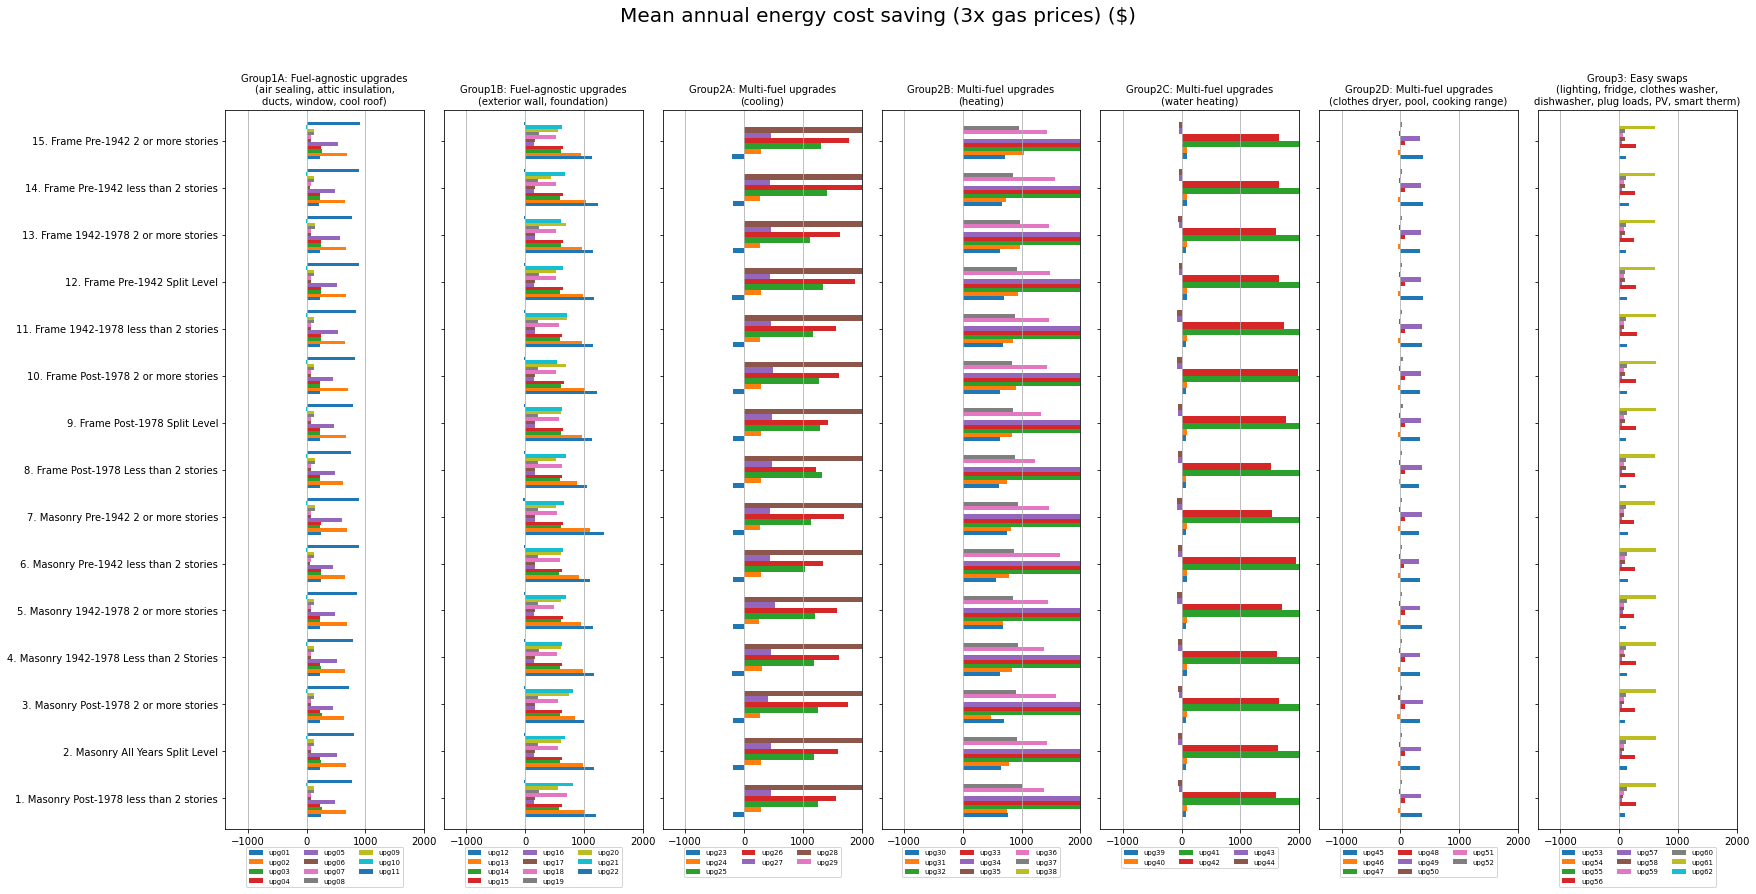

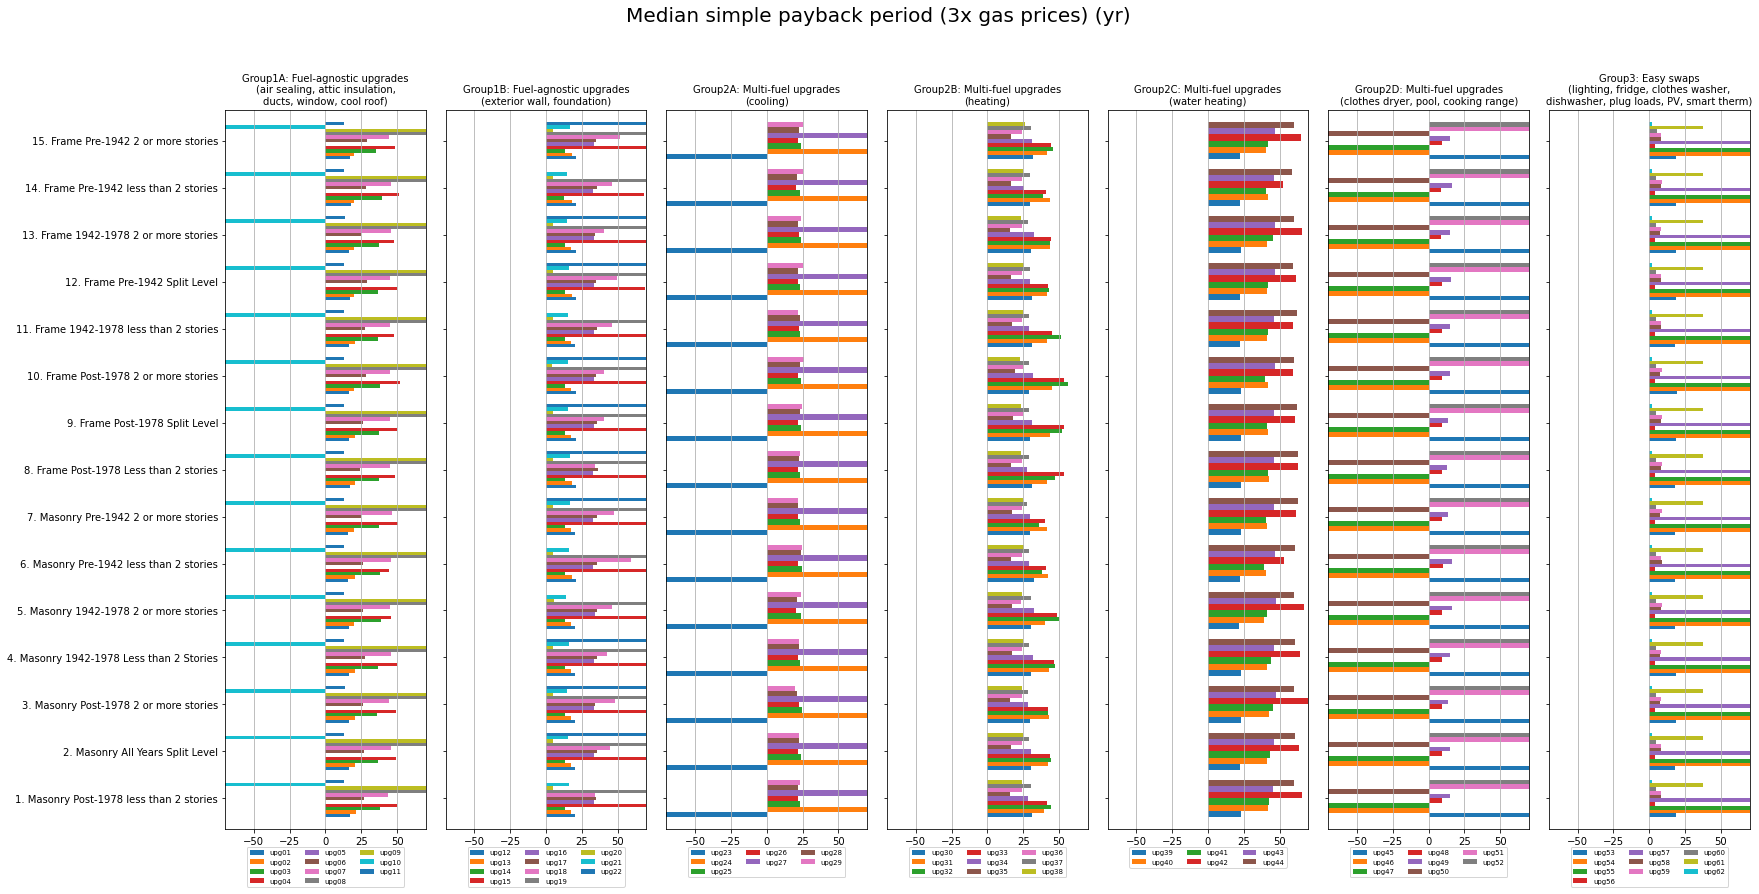

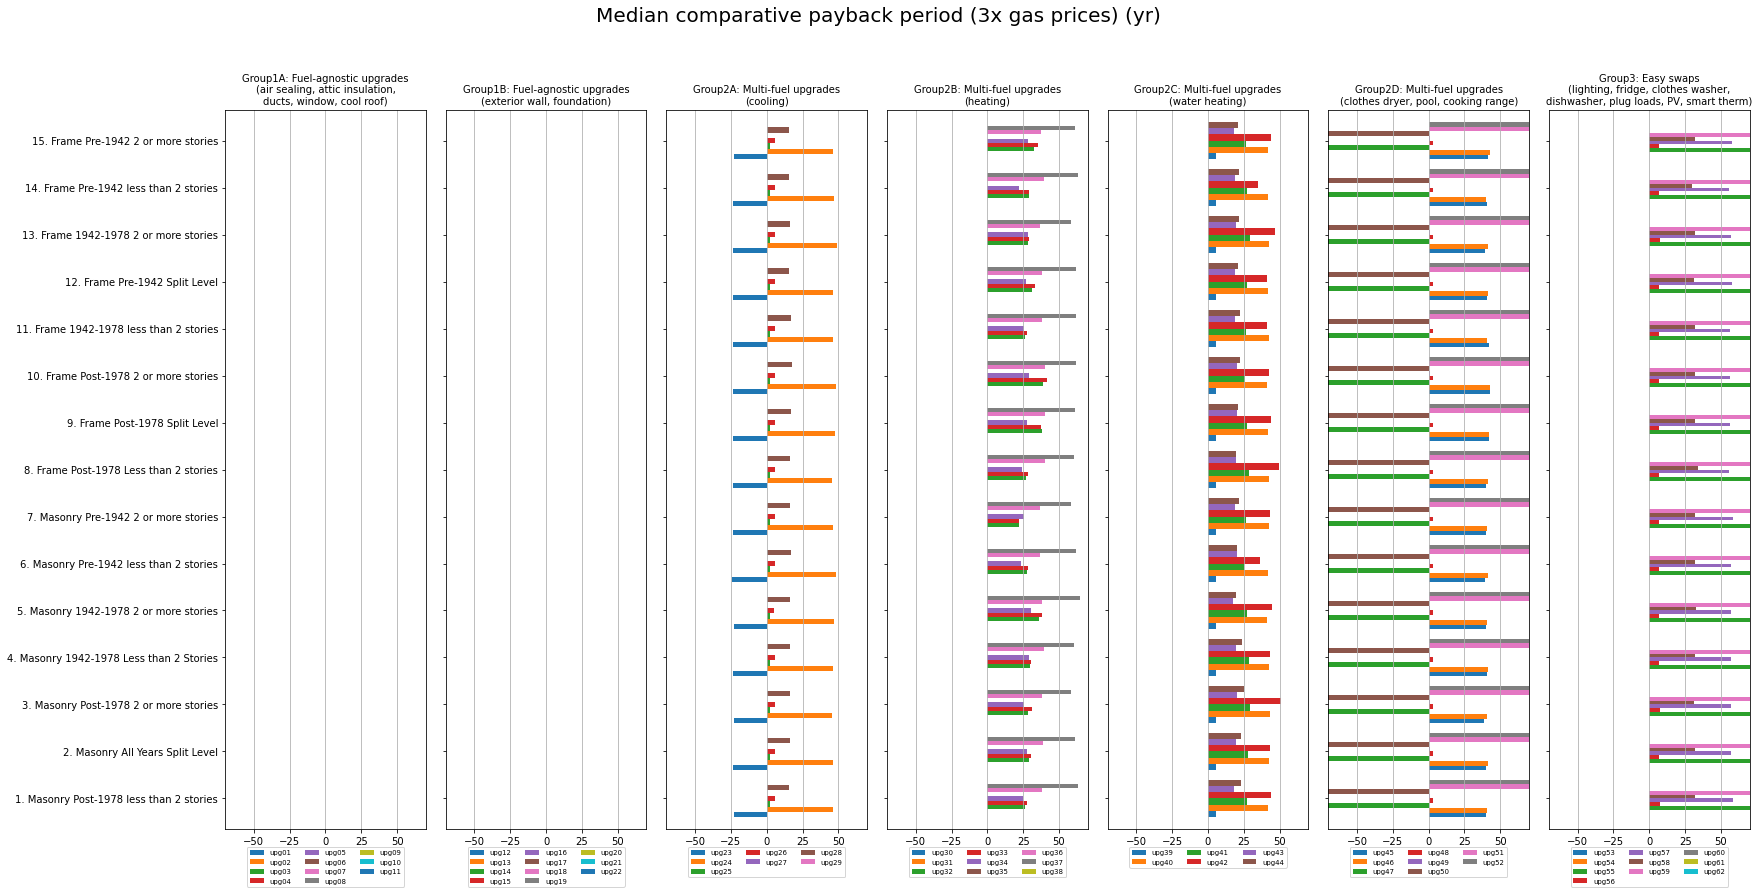

In [89]:
### other metrics to consider:
# energy savings per dollar (gas, elec)
# carbon savings (require timeseries results)

zoom_in_plots = False # <-------

zoom_in_xlimits = {
    'mean_pct_delta_gas_eui': [None, None],
    'mean_pct_delta_elec_eui': [None, None],
    'mean_pct_delta_site_eui': [-25, None],
    'mean_upgrade_cost': [None, 10000],
    'mean_ann_kbtu_saved_per_dollar': [None, 500],
    'mean_ann_energy_cost_saving': [None, 2000],
    'median_simple_payback': [-70, 70],
    'median_comparative_payback': [-70, 70],
    'mean_ann_metric_ton_co2e_saving': [None, 20],
}

# create subfolder for plots:
plot_path1 = os.path.join(plot_path, 'mean_values_by_prototype')
if not os.path.exists(plot_path1):
    os.mkdir(plot_path1)
print(f'plot dir: {plot_path1}\n')

title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'

if NG_rate_multiplier == 1:
    para_labels = {
        'mean_pct_delta_gas_eui': 'Mean percent change from baseline in gas use intensity (therm/sqft)',
        'mean_pct_delta_elec_eui': 'Mean percent change from baseline in electricity use intensity (kWh/sqft)',
        'mean_pct_delta_site_eui': 'Mean percent change from baseline in site energy use intensity (kBtu/sqft)',
        'mean_upgrade_cost': 'Mean upgrade capital cost ($)',
        'mean_ann_kbtu_saved_per_dollar': 'Mean annual site energy saving per upgrade cost (kBtu/$)',
        'mean_ann_energy_cost_saving': f'Mean annual energy cost saving{title_ext} ($)',
        'median_simple_payback': f'Median simple payback period{title_ext} (yr)',
        'median_comparative_payback': f'Median comparative payback period{title_ext} (yr)',
        'mean_ann_metric_ton_co2e_saving': f'Mean annual carbon emission saving (metric ton CO₂e)',
    }
else:
    para_labels = {
        'mean_ann_energy_cost_saving': f'Mean annual energy cost saving{title_ext} ($)',
        'median_simple_payback': f'Median simple payback period{title_ext} (yr)',
        'median_comparative_payback': f'Median comparative payback period{title_ext} (yr)',
    }

    
for i, para_to_plot in enumerate(para_labels.keys(),1):
    
    zoom_ext = ''
    if zoom_in_plots:
        if len(list(x for x in zoom_in_xlimits[para_to_plot] if x is not None))>0:
            zoom_ext = '_zoomed'

    print(f'>> {i}. plotting {para_to_plot}{zoom_ext}...')
    para_label = para_labels[para_to_plot]

    idx = groups2.loc[:,(('Baseline'),('HousingGroupNo'))].astype(str) +'. '+\
          groups2.loc[:,(('Baseline'),('HousingGroupName'))]
    UPs = groups2.set_index(idx)[para_to_plot]
    xmin = UPs.replace([np.inf, -np.inf], np.nan).min().min()*1.05
    xmax = UPs.replace([np.inf, -np.inf], np.nan).max().max()*1.05
    
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, nrows=1, 
                                                            sharex=True, sharey=True, figsize=(3.5*7, 12))

    ### Group 1: Intensive, fuel-agnostic upgrades (upg01-upg22)
    # Group 1A: (upg01-upg11) N=10
    ax = ax1
    Name = 'Group1A: Fuel-agnostic upgrades\n(air sealing, attic insulation,\nducts, window, cool roof)'
    UPi = UPs.iloc[:, :11] 
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 1B: (upg12-upg22) N=11
    ax = ax2
    Name = 'Group1B: Fuel-agnostic upgrades\n(exterior wall, foundation)'
    UPi = UPs.iloc[:, 11:22]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    
    ### Group 2: Multi-fuel upgrades (upg23-upg52)
    # Group 2A: (upg23-upg29) N=7
    ax = ax3
    Name = 'Group2A: Multi-fuel upgrades\n(cooling)'
    UPi = UPs.iloc[:, 22:29]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 2B: (upg30-upg38) N=9
    ax = ax4
    Name = 'Group2B: Multi-fuel upgrades\n(heating)'
    UPi = UPs.iloc[:, 29:38]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 2C: (upg39-upg44) N=6
    ax = ax5
    Name = 'Group2C: Multi-fuel upgrades\n(water heating)'
    UPi = UPs.iloc[:, 38:44]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)

    # Group 2D: (upg45-upg52) N=8
    ax = ax6
    Name = 'Group2D: Multi-fuel upgrades\n(clothes dryer, pool, cooking range)'
    UPi = UPs.iloc[:, 44:52]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)


    ### Group 3: Easy swaps (upg53-upg62) N=12
    ax = ax7
    Name = 'Group3: Easy swaps\n(lighting, fridge, clothes washer,\ndishwasher, plug loads, PV, smart therm)'
    UPi = UPs.iloc[:, 52:]
    UPi.plot(kind='barh', width=0.8, ax=ax)
    ax.xaxis.grid(True)
    if (para_to_plot[-3:]=='eui') & (xmin < -50):
        ax.axvline(x=-50, linestyle='--', color='darkred')
    ax.set_title(Name, fontsize='medium')
    ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.02), fontsize='x-small')
    ax.margins(y=0)
    
    if para_to_plot in ['median_simple_payback', 'median_comparative_payback']:
        ax.set_xlim(0,100)
    
    [xmin, xmax] = zoom_in_xlimits[para_to_plot]
    if xmin is not None:
        ax.set_xlim(left = xmin)
    if xmax is not None:
        ax.set_xlim(right=xmax)
    
    fig.suptitle(para_label, fontsize=20, y=1.03)
    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
    
    filename = f'{iter_path}-comparison_{para_to_plot}{zoom_ext}{fn_ext}.pdf'
    fig.savefig(os.path.join(plot_path1, filename),
                bbox_inches='tight')


#### 2.3.2. plot mean values for Chicago avg per SFD

In [90]:
Nchicago = 273742 # no of sfd in Chicago
Wtchicago = groups2.loc[:,[('Baseline', 'HousingGroupName'),('Baseline', 'Chicago Prevalence')]
                       ]['Baseline'].set_index('HousingGroupName')

## add 'Chicago avg' and 'Chicago total'
groups_avg = groups2.set_index(('Baseline', 'HousingGroupName')).drop('Baseline', level=0, axis=1)
groups_avg.index.name = groups_avg.index.name[1]
groups_avg = groups_avg.stack(level=0).stack().unstack(level=0)
groups_avg['Chicago avg'] = np.where(np.isnan(groups_avg),0,groups_avg).dot(
    np.where(np.isnan(Wtchicago),0,Wtchicago)) # np.dot() ignoring nan

## add upgrade names
upgrade_name_map = summary_upgrades.loc[~summary_upgrades['upgrade_no'].isnull(), ['upgrade_no','upgrade_name']]
upgrade_name_map.loc[:,'upgrade'] = upgrade_name_map['upgrade_no'].astype(int)
# upgrade_name_map.loc[:,'upgrade'] = 'upg' + \
#     upgrade_name_map['upgrade_no'].astype(int).astype(str).str.rjust(2,'0')
upgrade_name_map = upgrade_name_map.set_index('upgrade')['upgrade_name']

groups_avg = groups_avg.reset_index().rename({'level_0':'metrics','level_1':'upgrade_no'}, axis=1)
groups_avg['upgrade_no'] = groups_avg['upgrade_no'].str[3:5].astype(int)
groups_avg['upgrade_name'] = groups_avg['upgrade_no'].map(upgrade_name_map)
groups_avg = groups_avg.set_index(['metrics','upgrade_no','upgrade_name']).sort_index().reset_index()
groups_avg


HousingGroupName,metrics,upgrade_no,upgrade_name,Frame 1942-1978 2 or more stories,Frame 1942-1978 less than 2 stories,Frame Post-1978 2 or more stories,Frame Post-1978 Less than 2 stories,Frame Post-1978 Split Level,Frame Pre-1942 2 or more stories,Frame Pre-1942 Split Level,Frame Pre-1942 less than 2 stories,Masonry 1942-1978 2 or more stories,Masonry 1942-1978 Less than 2 Stories,Masonry All Years Split Level,Masonry Post-1978 2 or more stories,Masonry Post-1978 less than 2 stories,Masonry Pre-1942 2 or more stories,Masonry Pre-1942 less than 2 stories,Chicago avg
0,mean_ann_energy_cost_saving,1,"Air Leakage 25% Reduction, with Mech Vent unde...",227.31,223.02,228.58,223.07,226.15,236.65,226.32,205.39,235.90,224.65,230.99,221.16,246.17,250.03,242.01,234.110730
1,mean_ann_energy_cost_saving,2,"Air Leakage to 1ACH50, with Mech Vent",676.67,646.75,703.35,624.14,668.30,682.24,675.56,662.03,685.38,662.87,666.46,631.98,664.87,697.13,659.82,666.780540
2,mean_ann_energy_cost_saving,3,"Attic Insulation, R-49",244.18,242.03,230.33,234.72,232.25,255.54,249.08,235.74,234.26,243.44,242.39,260.69,255.68,225.88,239.23,238.476326
3,mean_ann_energy_cost_saving,4,"Attic Insulation, R-60",245.94,242.58,232.47,236.65,234.32,240.77,239.46,236.81,236.75,231.46,233.46,232.83,222.30,243.82,242.85,238.383794
4,mean_ann_energy_cost_saving,5,"Finished Roof, R-49",576.70,538.47,456.02,486.26,469.40,528.10,514.65,487.37,486.18,520.78,513.69,444.30,485.35,602.78,452.95,518.987867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,median_simple_payback,58,EnergyStar Dishwasher,7.34,8.23,7.61,8.15,7.89,8.13,8.12,8.10,7.85,7.81,7.83,7.68,8.01,7.51,8.61,7.938378
516,median_simple_payback,59,"EnergyStar Dishwasher, Most Eff",8.28,8.48,8.89,8.72,8.82,8.34,8.37,8.54,8.53,8.40,8.40,8.18,8.30,8.55,8.38,8.542993
517,median_simple_payback,60,Plug Loads 25% Reduction,4.82,4.98,4.92,4.84,4.91,5.04,5.01,4.97,4.98,4.94,4.93,4.93,4.93,4.79,4.79,4.889129
518,median_simple_payback,61,"Rooftop Solar, 4 kW",37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.46,37.460000


plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results/plots/mean_values_chicago_avg

Plotting Chicago avg: mean_ann_energy_cost_saving (3x gas prices)...
    - Group1
    - Group2
    - Group3
Plotting Chicago avg: median_simple_payback (3x gas prices)...
    - Group1


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


    - Group2
    - Group3
Plotting Chicago avg: median_comparative_payback (3x gas prices)...
    - Group1
    - Group2
    - Group3


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


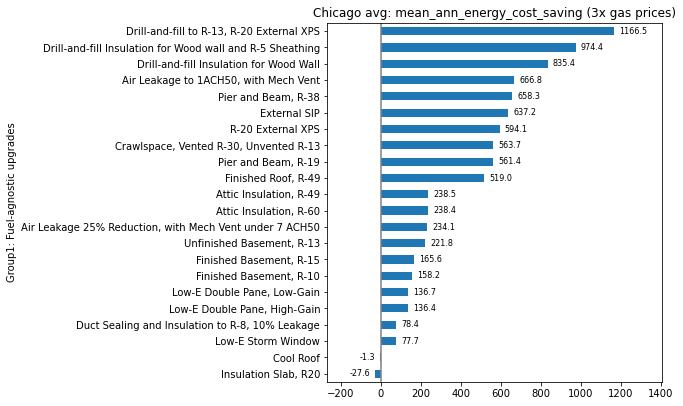

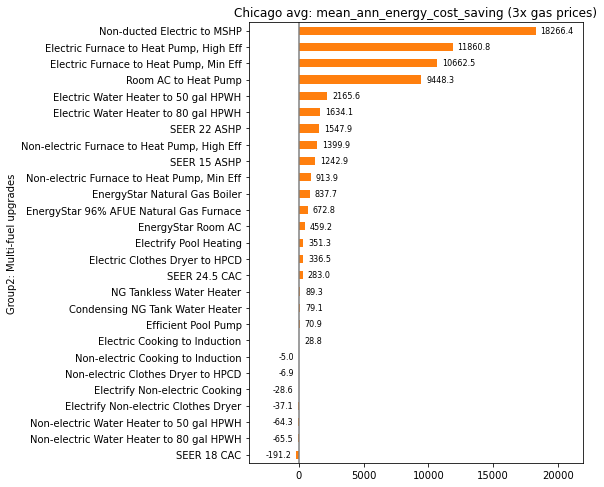

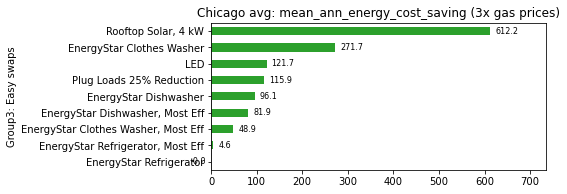

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


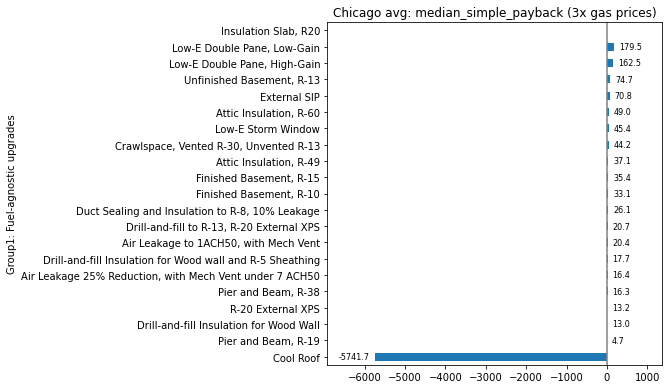

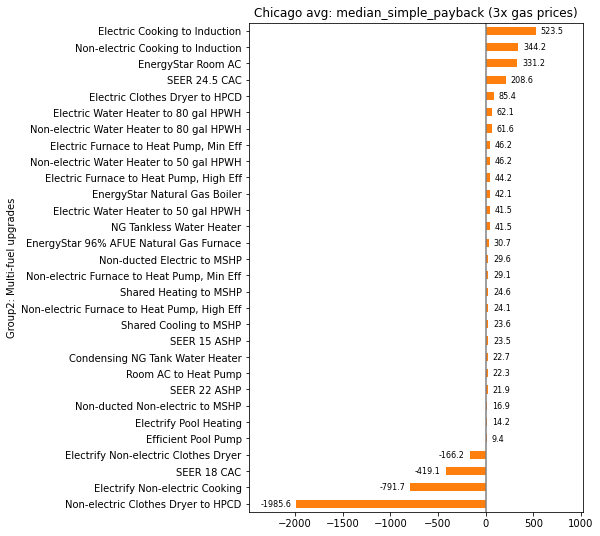

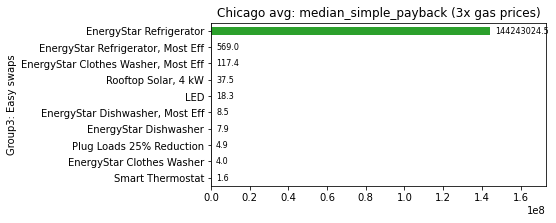

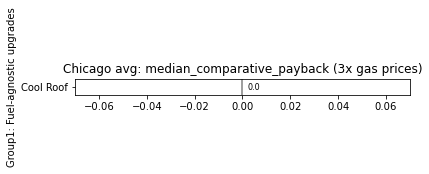

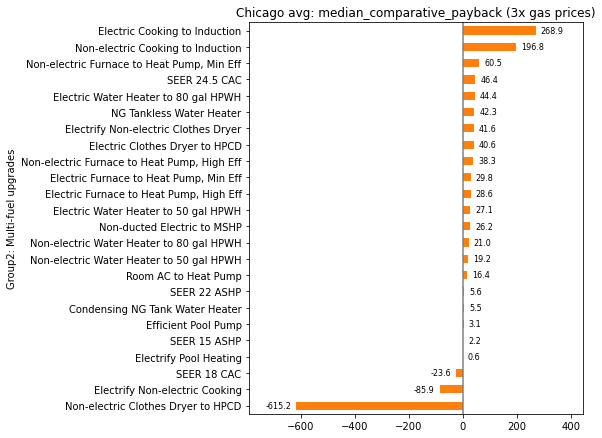

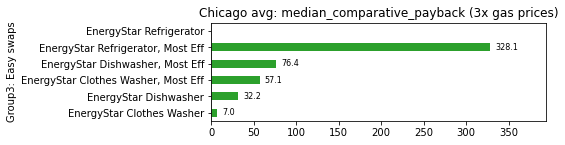

In [94]:
para_to_plot = 'Chicago avg' # <------

upgrade_sets = {
    'Group1: Fuel-agnostic upgrades': range(1, 23),
    'Group2: Multi-fuel upgrades': range(23, 53),
    'Group3: Easy swaps': range(53, 63),
}
upgrade_set_colors = {
    'Group1: Fuel-agnostic upgrades': 'tab:blue',
    'Group2: Multi-fuel upgrades': 'tab:orange',
    'Group3: Easy swaps': 'tab:green',
}

# create subfolder for plots:
plot_path2 = os.path.join(plot_path, 'mean_values_chicago_avg')
if not os.path.exists(plot_path2):
    os.mkdir(plot_path2)
print(f'plot dir: {plot_path2}\n')

if NG_rate_multiplier == 1: 
    metrics_to_plot = groups_avg['metrics'].unique()
else:
    metrics_to_plot = ['mean_ann_energy_cost_saving', 'median_simple_payback', 'median_comparative_payback']
    
for metric in metrics_to_plot:
    title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'
    title = f'{para_to_plot}: {metric}{title_ext}'
    print(f'Plotting {title}...')
    
    for n, up in enumerate(upgrade_sets.keys(),1):
        print(f'    - Group{n}')
        
        groupi = groups_avg[(groups_avg['metrics']==metric) & 
                              (groups_avg['upgrade_no'].isin(upgrade_sets[up]))][[
            'upgrade_name',para_to_plot]].set_index('upgrade_name').sort_values(by=para_to_plot)
        groupi.index.name = up
        
        ht = len(groupi)
        fig, ax = plt.subplots(figsize=(6, 0.3*ht))
        groupi.plot.barh(color=upgrade_set_colors[up], legend=False, title=title, ax=ax)
        
        # For each bar: Place a label ############################
        rects = ax.patches
        for rect in rects:
            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = "{:.1f}".format(x_value)

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha,                      # Horizontally align label differently for
                fontsize=8)                 # positive and negative values. 
            
        ax.margins(x=0.2)    
        ax.axvline(x=0, linestyle='-', color='gray')
        if (metric[-3:]=='eui') & (ax.get_xlim()[0] < -50):
            ax.axvline(x=-50, linestyle='--', color='darkred')
        
        filename = f'upgrades_{iteration}-{para_to_plot}_{metric}_group{n}{fn_ext}.pdf'
        fig.savefig(os.path.join(plot_path2, filename),
                    bbox_inches='tight')
        

#### 2.3.3. plot mean values for Chicago total stock 
Run cell below to load df for plots

In [111]:
load_df_for_plot_below_from_file = False # <-----
    
if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''

    groups_total = pd.read_csv(os.path.join(result_path,'processed results',f'upgrades_prototype_chicago_total_{fn_ext}.csv'),
                         header=[0])
    
    print(f'"groups_total{fn_ext}" df loaded from file.')
    display(groups_total)


"groups_total" df loaded from file.


,metrics,upgrade_no,upgrade_name,Frame 1942-1978 2 or more stories,Frame 1942-1978 less than 2 stories,Frame Post-1978 2 or more stories,Frame Post-1978 Less than 2 stories,Frame Post-1978 Split Level,Frame Pre-1942 2 or more stories,Frame Pre-1942 Split Level,Frame Pre-1942 less than 2 stories,Masonry 1942-1978 2 or more stories,Masonry 1942-1978 Less than 2 Stories,Masonry All Years Split Level,Masonry Post-1978 2 or more stories,Masonry Post-1978 less than 2 stories,Masonry Pre-1942 2 or more stories,Masonry Pre-1942 less than 2 stories,Chicago avg,Chicago total
0,mean_ann_elec_cost_saving,1,"Air Leakage 25% Reduction, with Mech Vent unde...",27.42,14.70,15.17,7.74,11.95,23.20,21.51,16.15,25.87,14.55,14.64,6.95,0.59,23.88,11.18,16.040100,4.390849e+06
1,mean_ann_elec_cost_saving,2,"Air Leakage to 1ACH50, with Mech Vent",79.73,29.80,65.52,21.36,45.98,62.49,56.22,43.50,73.55,28.11,37.79,51.79,15.22,75.75,35.04,48.435275,1.325877e+07
2,mean_ann_elec_cost_saving,3,"Attic Insulation, R-49",16.15,22.66,18.99,16.02,17.66,104.29,113.04,130.60,17.25,22.15,36.02,13.83,14.49,103.80,111.02,61.083634,1.672116e+07
3,mean_ann_elec_cost_saving,4,"Attic Insulation, R-60",16.92,23.78,21.27,18.46,20.03,97.77,106.25,123.44,18.09,22.85,35.38,14.98,16.23,96.14,104.46,58.584695,1.603709e+07
4,mean_ann_elec_cost_saving,6,"Duct Sealing and Insulation to R-8, 10% Leakage",20.48,20.45,28.07,23.55,26.02,16.75,17.43,18.88,19.33,20.45,20.16,22.60,21.58,17.36,18.33,20.426807,5.591675e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,mean_upgrade_cost,54,"EnergyStar Clothes Washer, Most Eff",2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2799.999997,7.664776e+08
395,mean_upgrade_cost,55,EnergyStar Dishwasher,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,1999.999998,5.474840e+08
396,mean_upgrade_cost,56,"EnergyStar Dishwasher, Most Eff",2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2400.00,2399.999998,6.569808e+08
397,mean_upgrade_cost,57,Plug Loads 25% Reduction,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,599.999999,1.642452e+08


plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results/plots/sum_values_chicago_total

Plotting Chicago total ann_gas_cost_saving (3x gas prices)...
    - Group1
    - Group2
    - Group3


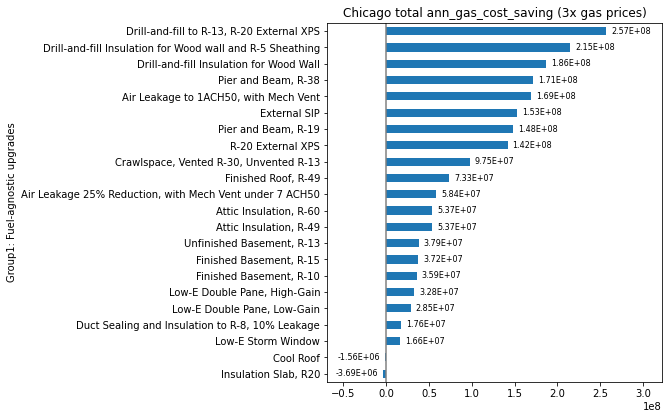

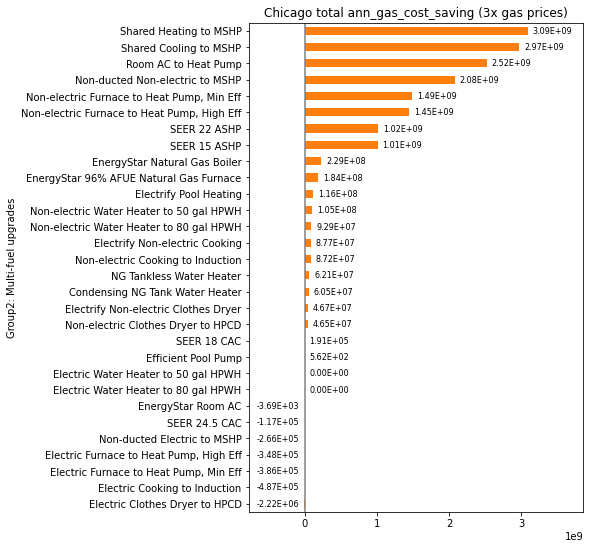

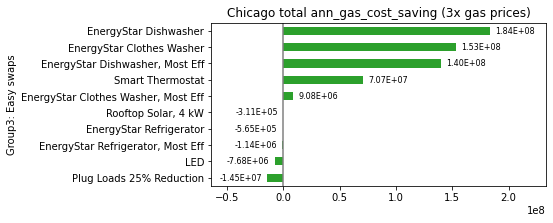

In [92]:
para_to_plot = 'Chicago total' # <------

upgrade_sets = {
    'Group1: Fuel-agnostic upgrades': range(1, 23),
    'Group2: Multi-fuel upgrades': range(23, 53),
    'Group3: Easy swaps': range(53, 63),
}
upgrade_set_colors = {
    'Group1: Fuel-agnostic upgrades': 'tab:blue',
    'Group2: Multi-fuel upgrades': 'tab:orange',
    'Group3: Easy swaps': 'tab:green',
}

# create subfolder for plots:
plot_path3 = os.path.join(plot_path, 'sum_values_chicago_total')
if not os.path.exists(plot_path3):
    os.mkdir(plot_path3)
print(f'plot dir: {plot_path3}\n')

if NG_rate_multiplier == 1: 
    metrics_to_plot = groups_total['metrics'].unique()
else:
    metrics_to_plot = ['mean_ann_gas_cost_saving']
    
for metric in metrics_to_plot:
    title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'
    title = f'{para_to_plot} {metric[5:]}{title_ext}'
    print(f'Plotting {title}...')
    
    for n, up in enumerate(upgrade_sets.keys(),1):
        print(f'    - Group{n}')
        
        groupi = groups_total[(groups_total['metrics']==metric) & 
                              (groups_total['upgrade_no'].isin(upgrade_sets[up]))][[
            'upgrade_name',para_to_plot]].set_index('upgrade_name').sort_values(by=para_to_plot)
        groupi.index.name = up
        
        ht = len(groupi)
        fig, ax = plt.subplots(figsize=(6, 0.3*ht))
        groupi.plot.barh(color=upgrade_set_colors[up], legend=False, title=title, ax=ax)
        
        # For each bar: Place a label ############################
        rects = ax.patches
        for rect in rects:
            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = "{:.2E}".format(x_value)

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha,                      # Horizontally align label differently for
                fontsize=8)                 # positive and negative values.                      
                                            
        ax.margins(x=0.25)
        ax.axvline(x=0, linestyle='-', color='gray')
        
        filename = f'upgrades_{iteration}-{para_to_plot}_{metric[5:]}_group{n}{fn_ext}.pdf'
        fig.savefig(os.path.join(plot_path3, filename),
                    bbox_inches='tight')

#### 2.3.4. plot metrics distribution
Run cell below to load df for plots

In [124]:
load_df_for_plot_below_from_file = False # <-----
    
if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''
    
    all_proto_upgrades = pd.read_csv(
        os.path.join(result_path, 'processed results', 'all_upgrades_by_prototype_combined.csv'))
    
    print(f'"all_proto_upgrades{fn_ext}" df loaded from file.')
    N_upgrades = all_proto_upgrades['upgrade_no'].nunique()
    print(f'   total number of upgrades: {N_upgrades}')
    
    display(all_proto_upgrades)
    

"all_proto_upgrades" df loaded from file.
   total number of upgrades: 57


,building_id,job_id,started_at,completed_at,completed_status,apply_upgrade.applicable,apply_upgrade.upgrade_name,simulation_output_report.applicable,simulation_output_report.door_area_ft_2,simulation_output_report.duct_surface_area_ft_2,...,pct_delta_gas_eui,pct_delta_elec_eui,pct_delta_site_eui,ann_kbtu_saved_per_dollar,ann_energy_cost_saving,simple_payback,ann_metric_ton_co2e_saving,upgrade_no,HousingGroupNo,HousingGroupName
0,69,240,2020-12-15 23:47:30,2020-12-15 23:49:27,Success,True,"Air Leakage 25% Reduction, with Mech Vent unde...",True,20.0,1221.37,...,-1.585667e+01,-3.922154,-13.587210,32.883483,321.888747,24.612230,2.610829,1,1,Masonry Post-1978 less than 2 stories
1,74,90,2020-12-15 21:50:45,2020-12-15 21:52:39,Success,True,"Air Leakage 25% Reduction, with Mech Vent unde...",True,20.0,234.21,...,-7.184254e+00,-1.267127,-5.710729,54.897958,39.750011,38.218857,0.322304,1,1,Masonry Post-1978 less than 2 stories
2,104,66,2020-12-15 22:39:34,2020-12-15 22:41:29,Success,True,"Air Leakage 25% Reduction, with Mech Vent unde...",True,20.0,1221.37,...,-1.594702e+01,-2.834160,-13.283212,21.377279,194.624115,40.706158,1.596145,1,1,Masonry Post-1978 less than 2 stories
3,130,116,2020-12-15 22:18:41,2020-12-15 22:20:33,Success,True,"Air Leakage 25% Reduction, with Mech Vent unde...",True,20.0,805.12,...,-1.193634e+01,-2.258640,-9.313358,23.411661,102.863988,50.769955,0.826353,1,1,Masonry Post-1978 less than 2 stories
4,150,91,2020-12-15 23:21:59,2020-12-15 23:23:55,Success,True,"Air Leakage 25% Reduction, with Mech Vent unde...",True,20.0,805.12,...,-1.062189e+01,-1.251659,-8.748435,27.725469,51.364098,53.378919,0.427838,1,1,Masonry Post-1978 less than 2 stories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903050,16750,244,2020-12-16 00:43:41,2020-12-16 00:45:42,Success,True,"Rooftop Solar, 4 kW",True,20.0,390.40,...,0.000000e+00,-85.488181,-7.128808,9.401577,640.624346,37.463453,4.236943,58,15,Frame Pre-1942 2 or more stories
903051,16758,13,2020-12-15 22:53:39,2020-12-15 22:55:42,Success,True,"Rooftop Solar, 4 kW",True,20.0,852.16,...,-1.216843e-08,-50.631129,-7.848256,8.473526,640.620194,37.463696,4.236915,58,15,Frame Pre-1942 2 or more stories
903052,16759,228,2020-12-15 22:12:46,2020-12-15 22:14:44,Success,True,"Rooftop Solar, 4 kW",True,20.0,283.20,...,0.000000e+00,-94.635479,-11.206311,5.718119,640.620190,37.463696,4.236915,58,15,Frame Pre-1942 2 or more stories
903053,16769,91,2020-12-16 00:23:16,2020-12-16 00:25:22,Success,True,"Rooftop Solar, 4 kW",True,20.0,540.80,...,-1.380243e-07,-30.536659,-6.326786,10.684793,640.620192,37.463696,4.236915,58,15,Frame Pre-1942 2 or more stories


plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results/plots/distribution_by_prototype

>> 1. plotting ann_energy_cost_saving...
>> 2. plotting simple_payback...


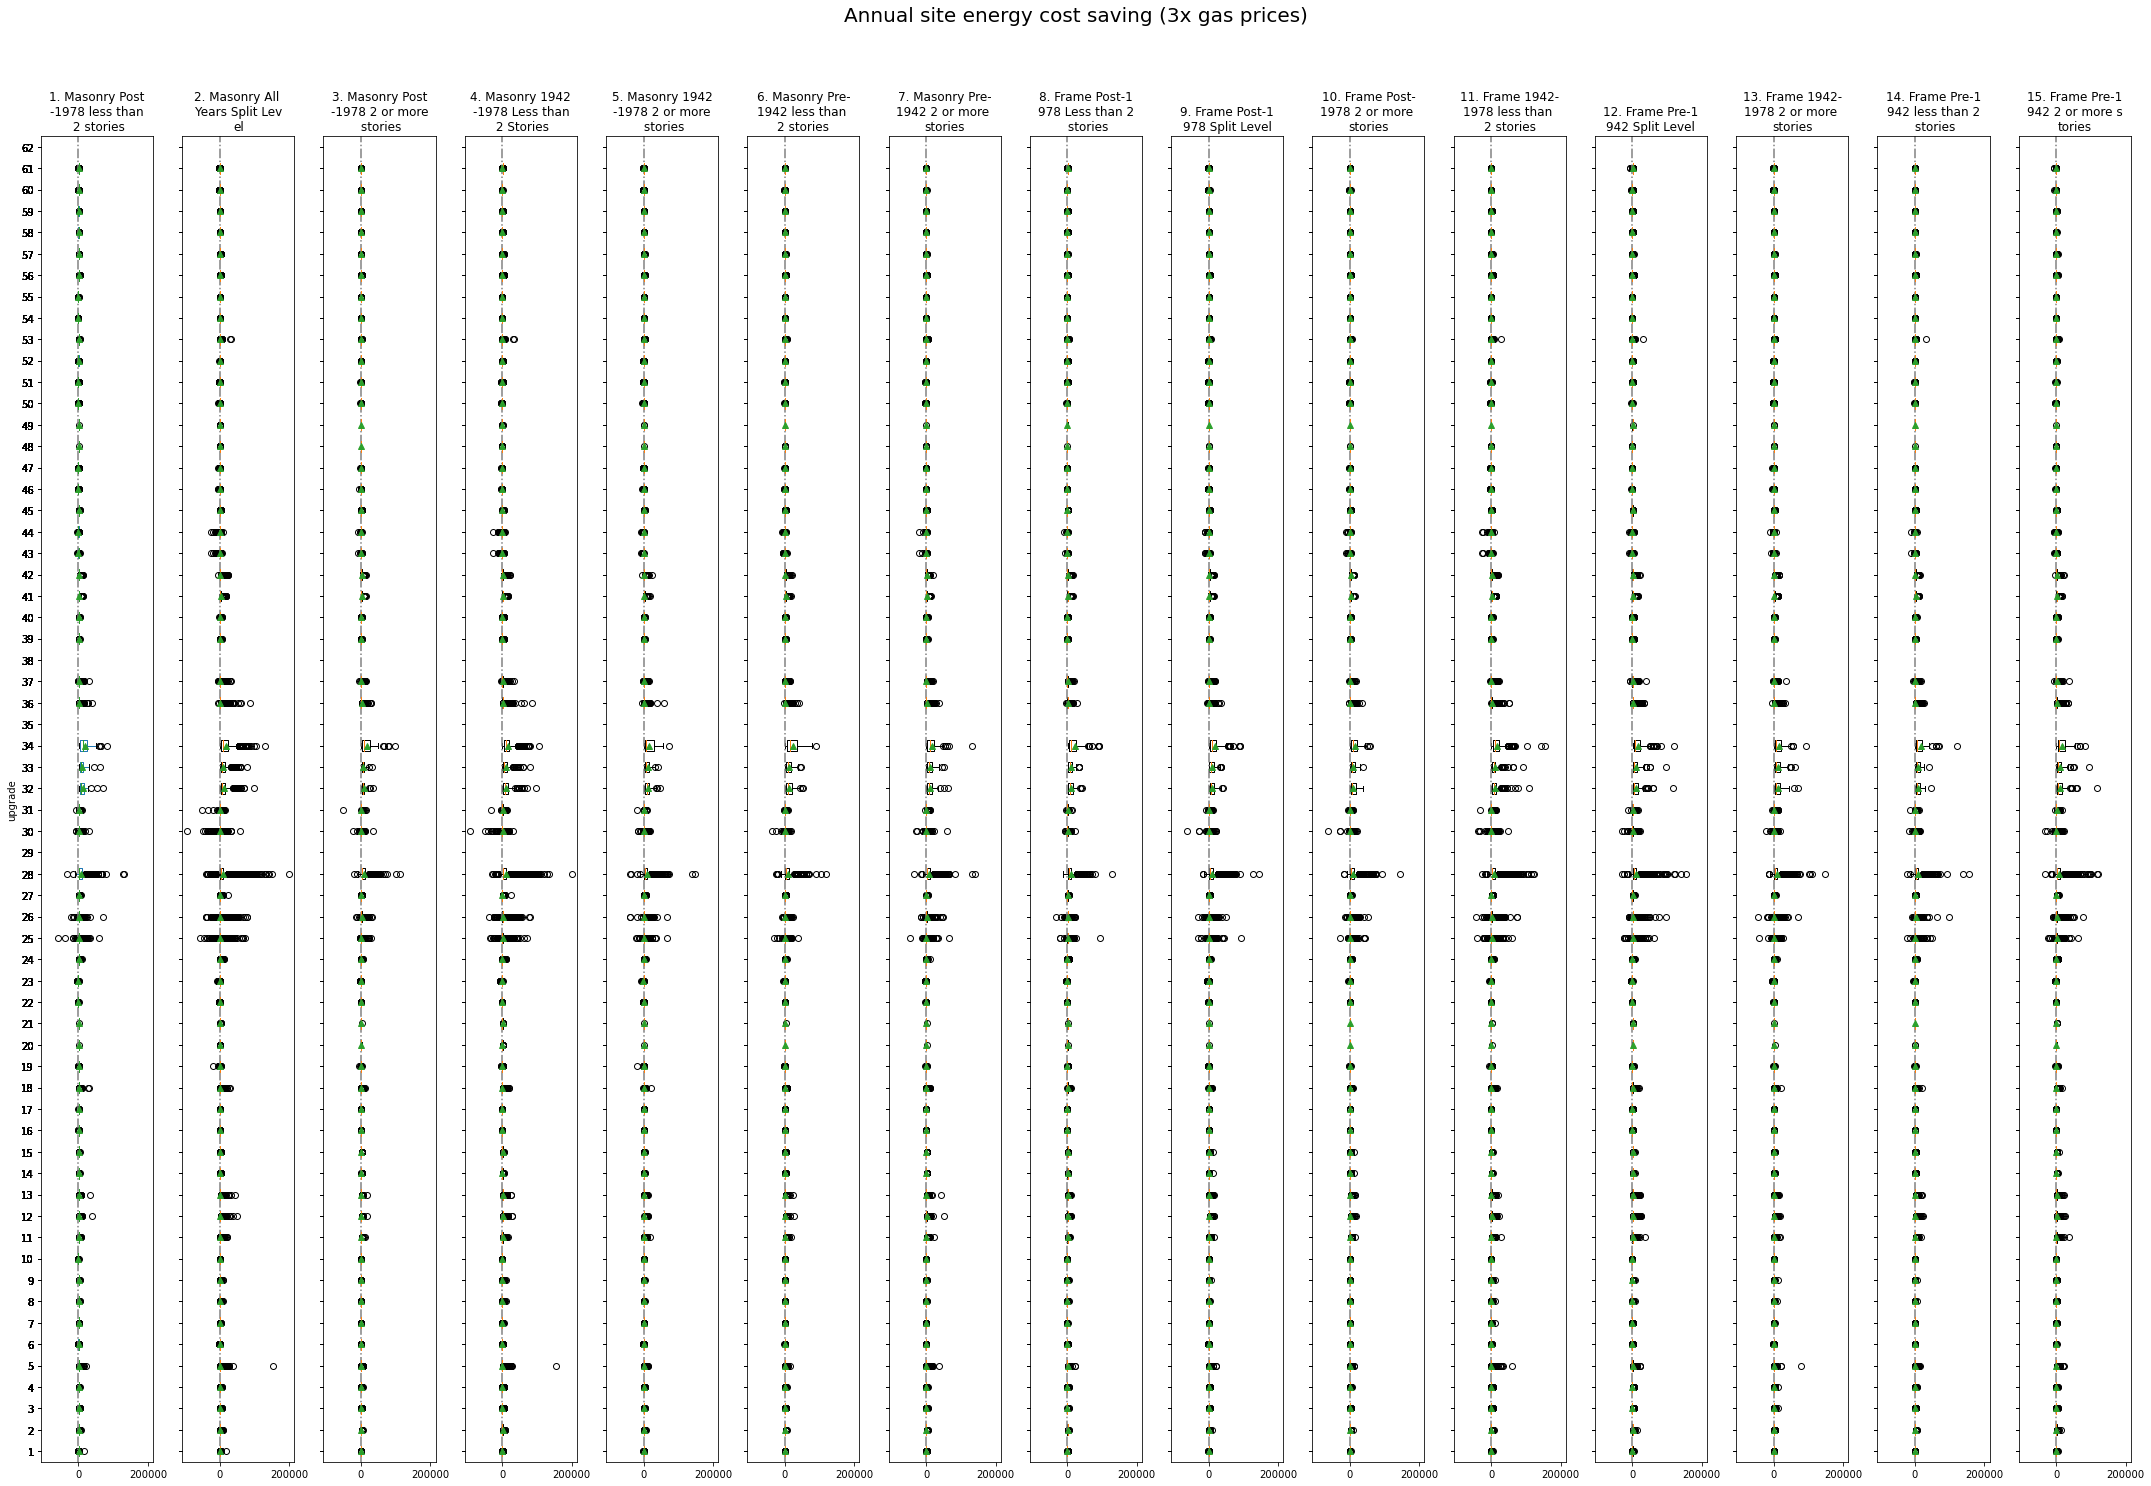

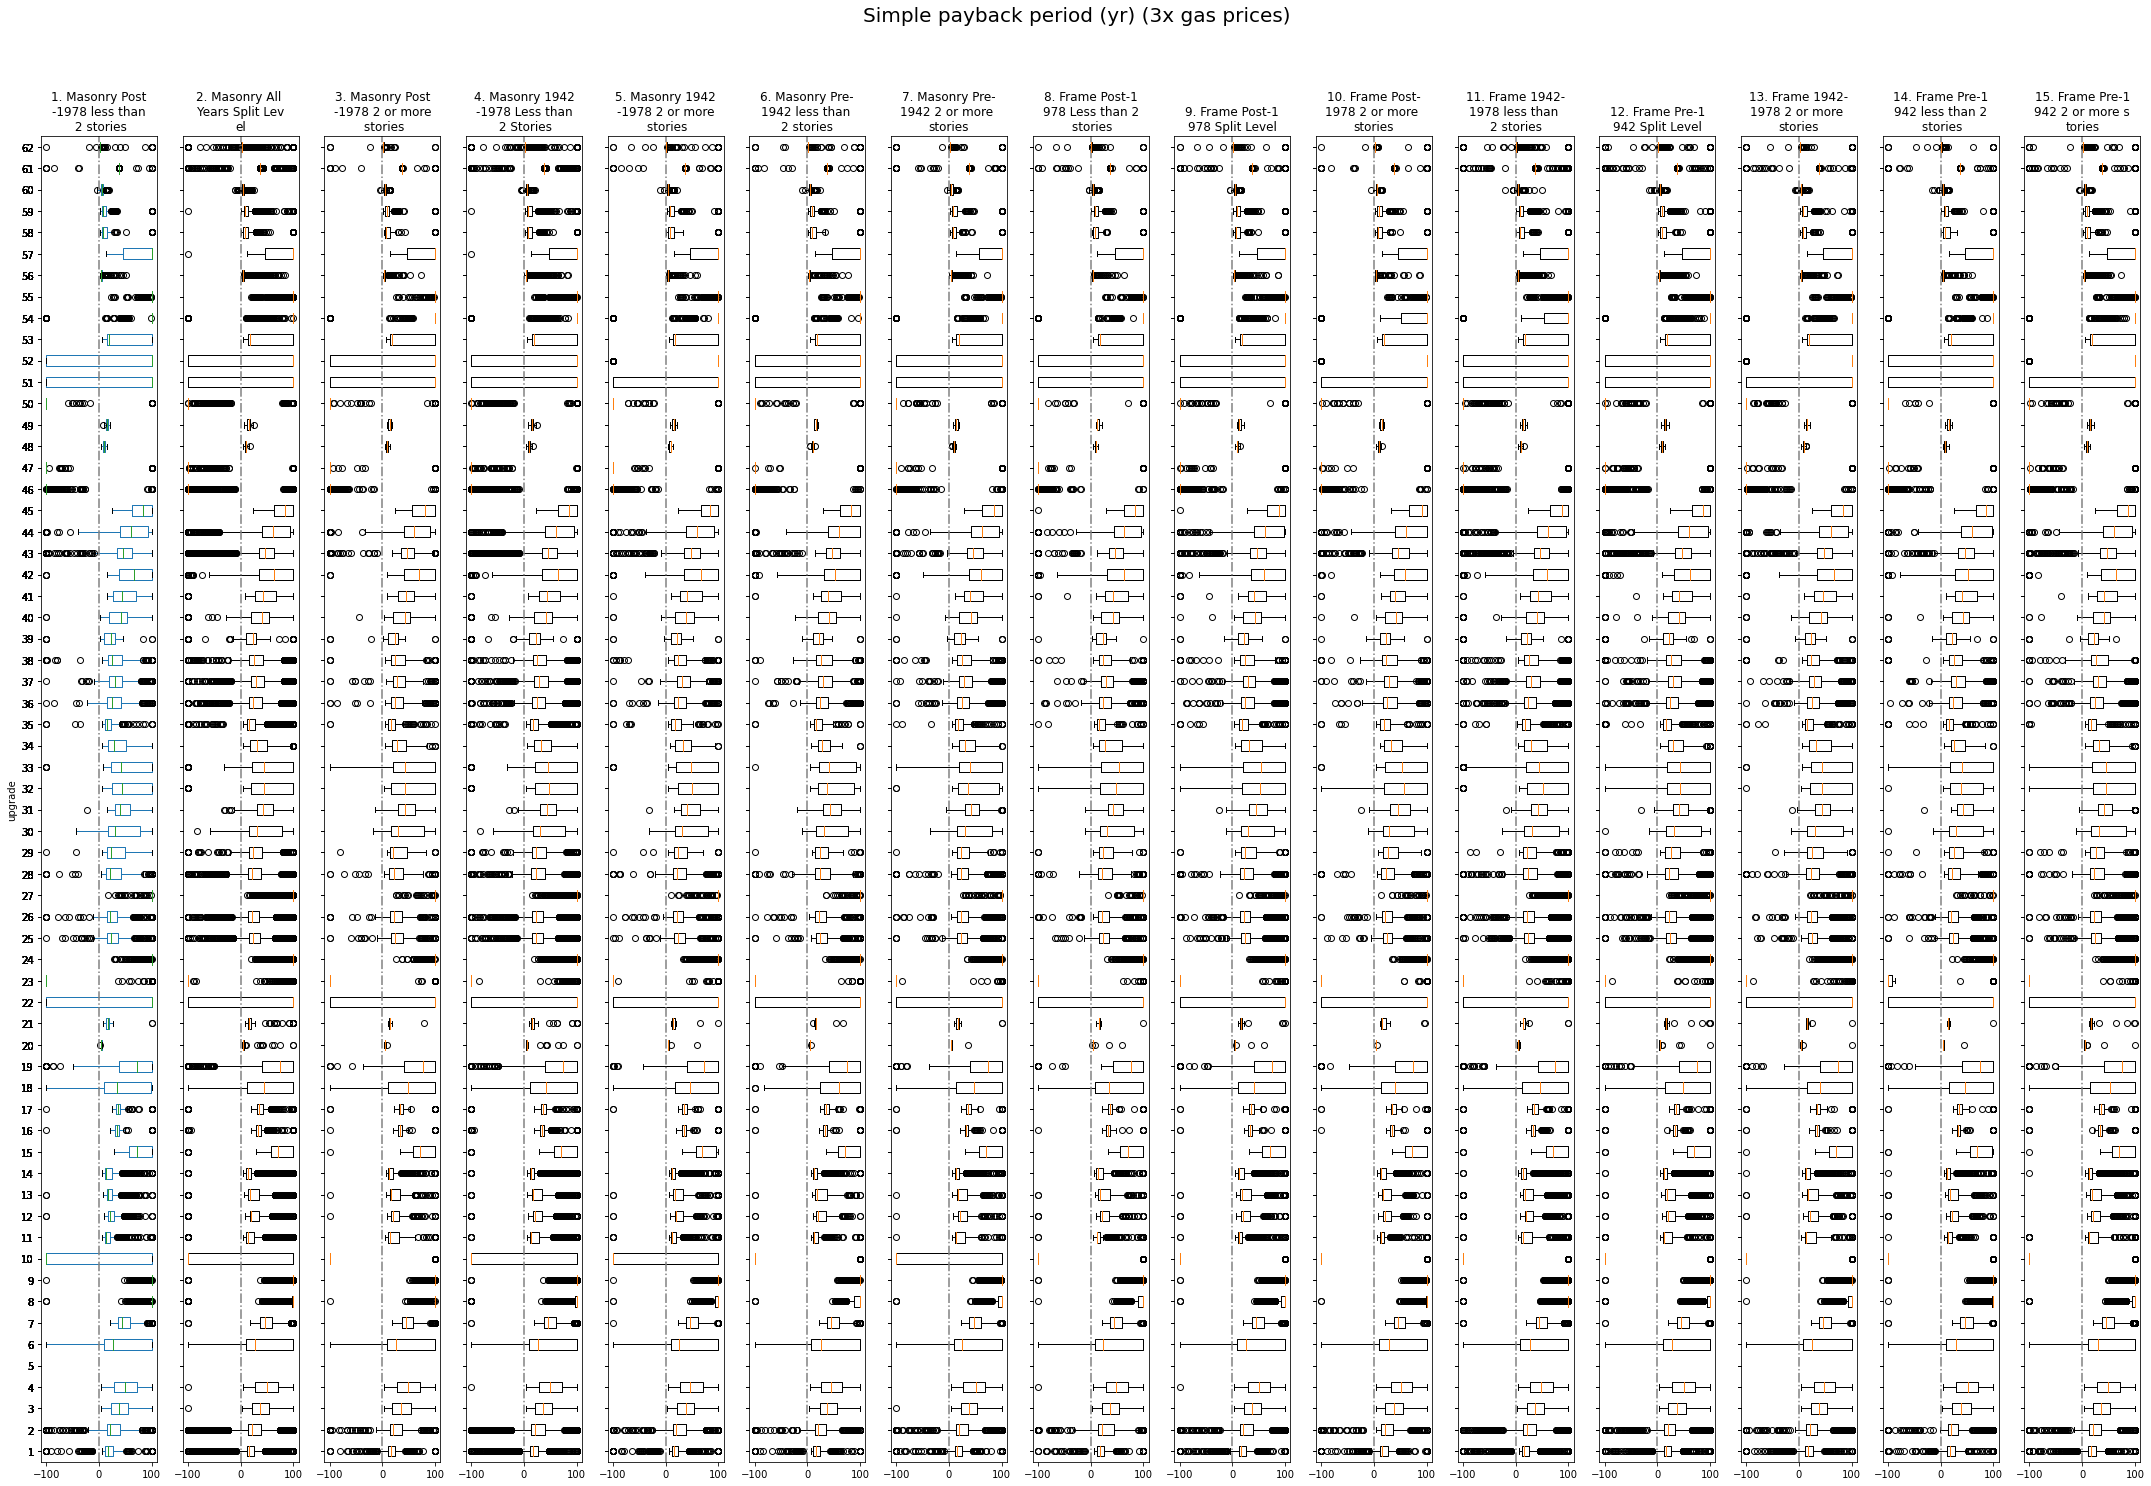

In [93]:
### other metrics to consider:
# energy savings per dollar (gas, elec)
# carbon savings (require timeseries results)

# create subfolder for plots:
plot_path4 = os.path.join(plot_path, 'distribution_by_prototype')
if not os.path.exists(plot_path4):
    os.mkdir(plot_path4)
print(f'plot dir: {plot_path4}\n')

title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'

## modifying payback periods, cap either ends at [100,-100] 
all_proto_upgrades.loc[(all_proto_upgrades[all_proto_upgrades['simple_payback']>100]).index,
                       'simple_payback'] = 100
all_proto_upgrades.loc[(all_proto_upgrades[all_proto_upgrades['simple_payback']<-100]).index,
                       'simple_payback'] = -100

if NG_rate_multiplier == 1:
    para_labels = {
        'pct_delta_gas_eui': 'Percent change from baseline in gas use intensity (therm/sqft)',
        'pct_delta_elec_eui': 'Percent change from baseline in electricity use intensity (kWh/sqft)',
        'pct_delta_site_eui': 'Percent change from baseline in site energy use intensity (kBtu/sqft)',
        'upgrade_cost': 'Upgrade capital cost ($)',
        'ann_kbtu_saved_per_dollar': 'Annual site energy saving per upgrade cost (kBtu/$)',
        'ann_energy_cost_saving': f'Annual site energy cost saving{title_ext}',
        'simple_payback': f'Simple payback period (yr){title_ext}',
        'ann_metric_ton_co2e_saving': f'Annual carbon emission saving (metric ton CO₂e)',
    }
else:
    para_labels = {
        'ann_energy_cost_saving': f'Annual site energy cost saving{title_ext}',
        'simple_payback': f'Simple payback period (yr){title_ext}',
    }

cols_to_match = list(f'upg{str(i).zfill(2)}' for i in range(1,N_upgrades+1))

for i, para_to_plot in enumerate(para_labels.keys(),1):
    
    print(f'>> {i}. plotting {para_to_plot}...')
    xmin = all_proto_upgrades[para_to_plot].min(); xmax = all_proto_upgrades[para_to_plot].max()
    
    fig, axes = plt.subplots(ncols=15, nrows=1, sharex=True, sharey=True, figsize=(30, 20))
    for h in range(1,16):
        ax = axes[h-1]
        p = all_proto_upgrades.query('HousingGroupNo==@h')[['HousingGroupNo','HousingGroupName',
                                                            'upgrade_no', para_to_plot]]
        lab = f'{p["HousingGroupNo"].iloc[0]}. {p["HousingGroupName"].iloc[0]}'
        lab = '\n'.join([lab[i:i+15] for i in range(0, len(lab), 15)]) # break up long string
        p.loc[:,'upgrade_no'] = 'upg'+p['upgrade_no'].astype(str).str.zfill(2)
        p = p.sort_values(by='upgrade_no')
        p = p.set_index([p.index, 'upgrade_no'])[
            para_to_plot].unstack(level=-1).dropna(
            axis=0, how='all')

        ### show all upgrades
        for col in set(cols_to_match)-set(p.columns):
            p[col] = np.nan
        p = p.sort_index(axis=1)
        
        if para_to_plot == 'simple_payback':
            showmeans = False
        else:
            showmeans = True
            
        try:
            p.boxplot(ax=ax, vert=False, grid=False, showmeans=showmeans)
        except:
            pass

        ax.set_title(lab)
        if h==1:
            ax.set_ylabel('upgrade')
        ax.axvline(x=0, linestyle='-.', color='gray')
        if (para_to_plot[-3:]=='eui') & (xmin < -50):
            ax.axvline(x=-50, linestyle='--', color='darkred') 
        
    para_label = para_labels[para_to_plot]
    fig.suptitle(para_label, fontsize=20, y=1.03)
    plt.tight_layout()
    
    filename = os.path.join(plot_path4, f'{iter_path}-distribution_{para_to_plot}{fn_ext}.pdf')
    fig.savefig(filename, bbox_inches='tight')


#### 2.3.5. plot mean values for Multi-Family
Run cell below to load df for plots

In [129]:
load_df_for_plot_below_from_file = False # <-----
    
if load_df_for_plot_below_from_file:
    NG_rate_multiplier = 1 # 1 or 3 <----- This controls what to plot in both '2.3.1.' and '2.3.2.' plots
 
    if NG_rate_multiplier > 1:
        fn_ext = f'_{NG_rate_multiplier}x_gas_prices' # file name extension to add to relevant results
    else:
        fn_ext = ''
    
    filename = os.path.join(result_path,'processed results', f'mf_upgrades_summary{fn_ext}.csv')
    if not os.path.exists(filename):
        print(f'"summary_upgrades_mf{fn_ext}" df does not exist, check if Multi-Family buildings have been modeled.')
    else:
        summary_upgrades_mf = pd.read_csv(filename)
    
        print(f'"summary_upgrades_mf{fn_ext}" df loaded from file.')
        N_upgrades = summary_upgrades_mf['upgrade_no'].nunique()
        print(f'   total number of upgrades: {N_upgrades}')

        display(summary_upgrades_mf)
    


"summary_upgrades_mf" df loaded from file.
   total number of upgrades: 62


,upgrade_no,upgrade_name,n_applied,n_success,n_fail,pct_success,mean_pct_delta_gas_eui,mean_pct_delta_elec_eui,mean_pct_delta_site_eui,mean_upgrade_cost,mean_ann_kbtu_saved_per_dollar,mean_ann_energy_cost_saving,median_simple_payback,median_comparative_payback,mean_ann_metric_ton_co2e_saving
0,1.0,"Air Leakage 25% Reduction, with Mech Vent unde...",20759.0,20753.0,0.0,100.0,803.640,1511.405,659.199,44679.48,35.878070,1563.34,34.094723,NaN,12.220576
1,2.0,"Air Leakage to 1ACH50, with Mech Vent",20759.0,20759.0,0.0,100.0,544.155,1365.732,501.840,147210.01,8.873597,4522.16,44.305438,NaN,35.653685
2,3.0,"Attic Insulation, R-49",20759.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,"Attic Insulation, R-60",20759.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,"Finished Roof, R-49",20759.0,19431.0,0.0,93.6,905.304,1572.936,721.275,NaN,NaN,342.67,NaN,NaN,2.577067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,59.0,"EnergyStar Dishwasher, Most Eff",20759.0,5919.0,0.0,28.5,964.910,1625.277,732.175,45989.66,37.985923,-17847.97,18.818456,-2.43397,0.954028
75,60.0,Plug Loads 25% Reduction,20759.0,20759.0,0.0,100.0,952.103,1419.220,713.242,11679.12,148.055117,849.68,5.843722,NaN,13.768582
76,61.0,"Rooftop Solar, 4 kW",20759.0,20759.0,0.0,100.0,924.224,1553.860,727.163,467164.70,3.659710,-717.17,172.583935,NaN,3.678282
77,NaN,Reference Thermostat,20759.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


plot dir: /Users/lliu2/Documents/Chicago retrofits/ResStock results/cookcnty_upgrades_02a/processed results/plots/multi-family_mean_values_chicago_avg

Plotting Multi-Family: mean_pct_delta_gas_eui...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: mean_pct_delta_elec_eui...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: mean_pct_delta_site_eui...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: mean_upgrade_cost...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: mean_ann_kbtu_saved_per_dollar...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: mean_ann_energy_cost_saving...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: median_simple_payback...
    - Group1
    - Group2
    - Group3


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plotting Multi-Family: median_comparative_payback...
    - Group1
    - Group2
    - Group3
Plotting Multi-Family: mean_ann_metric_ton_co2e_saving...
    - Group1
    - Group2
    - Group3


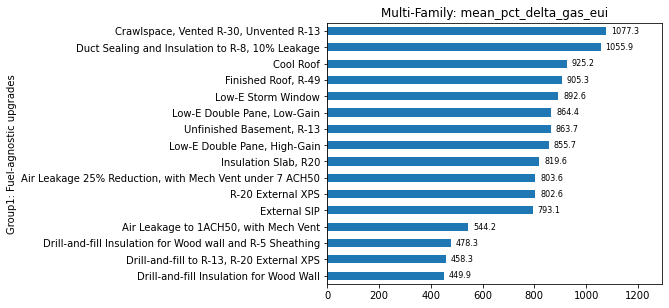

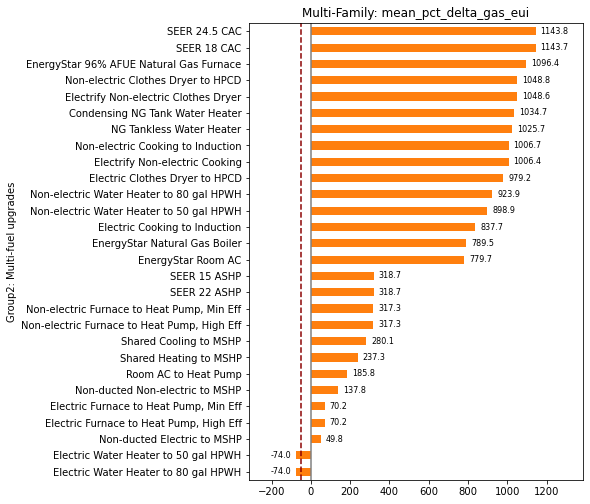

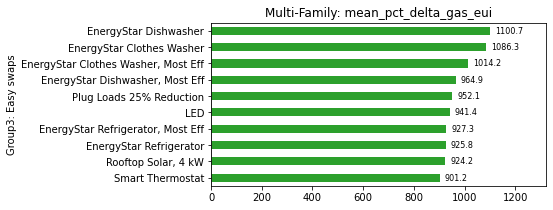

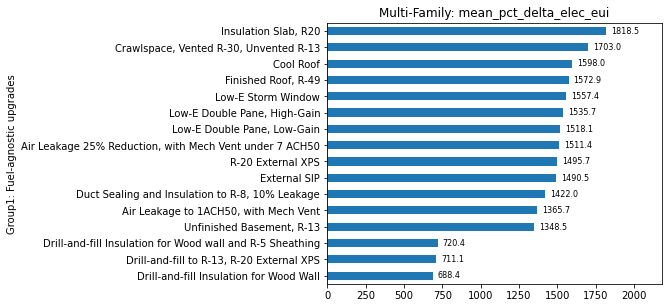

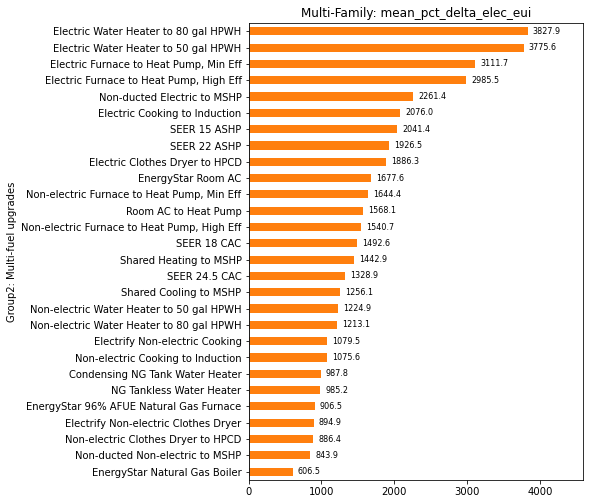

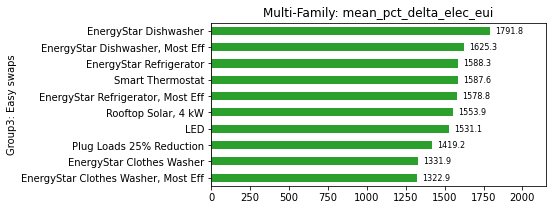

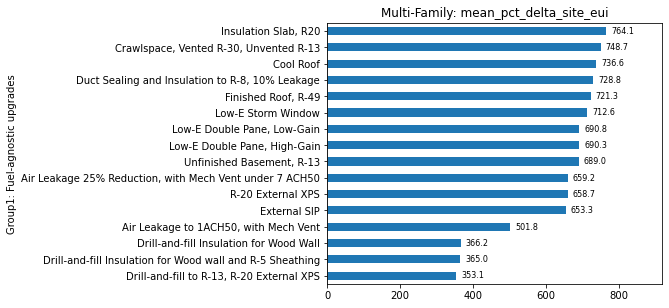

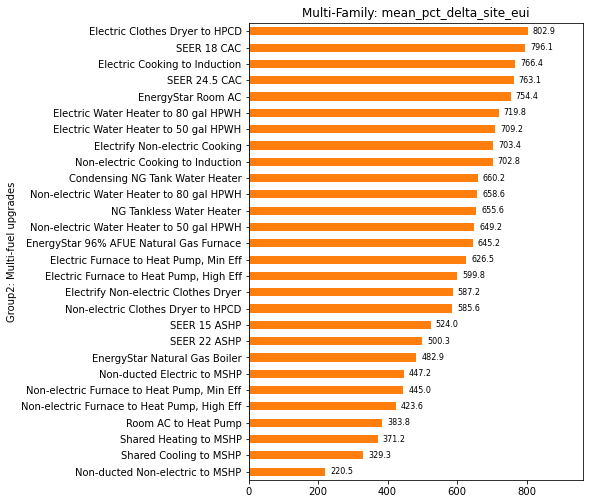

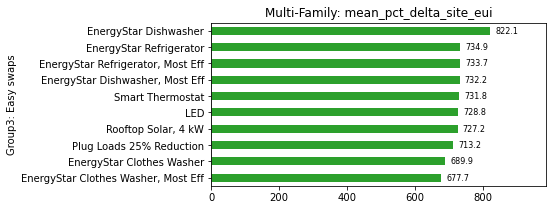

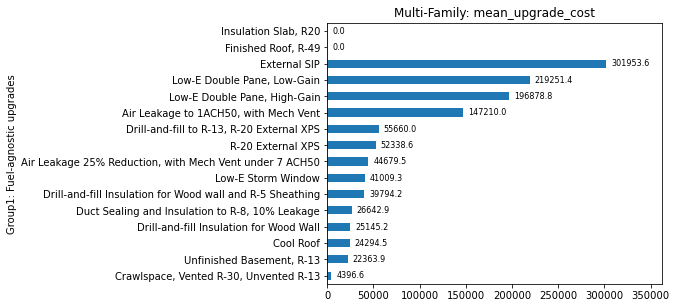

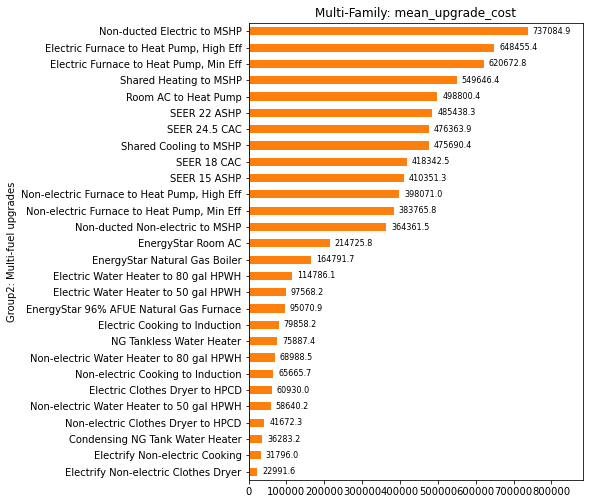

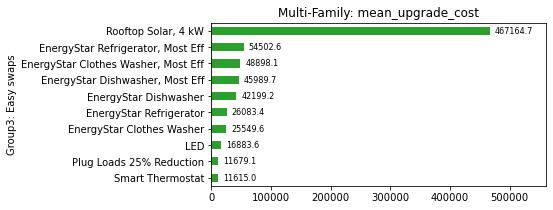

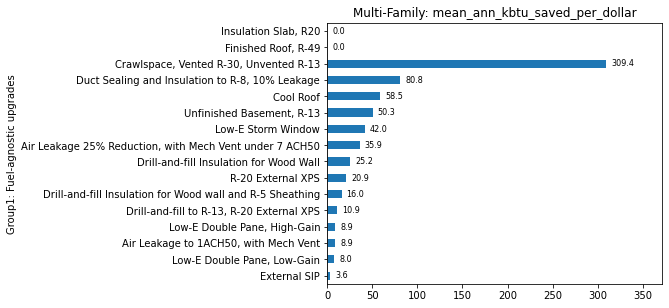

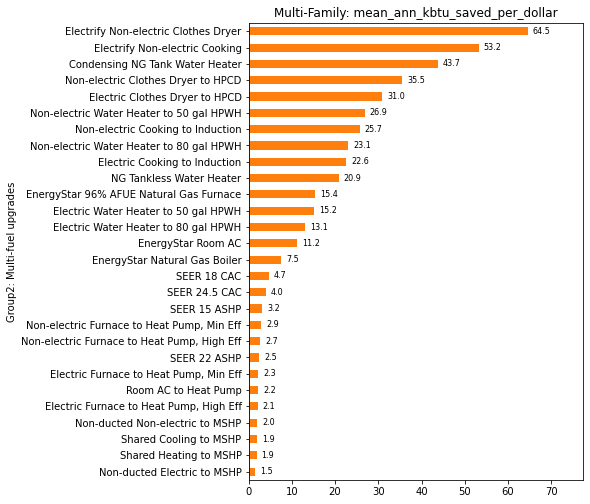

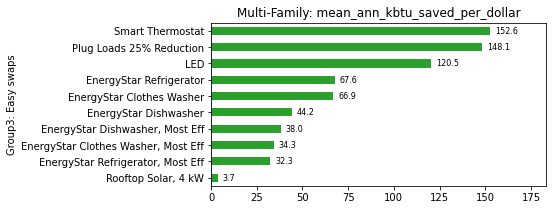

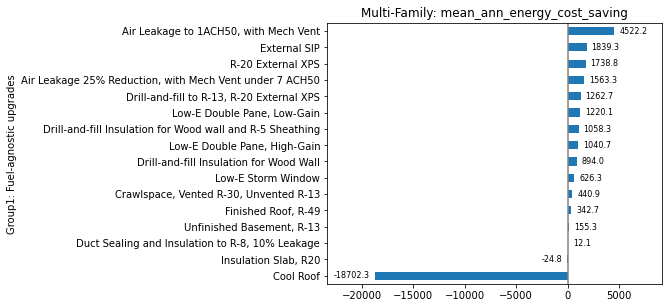

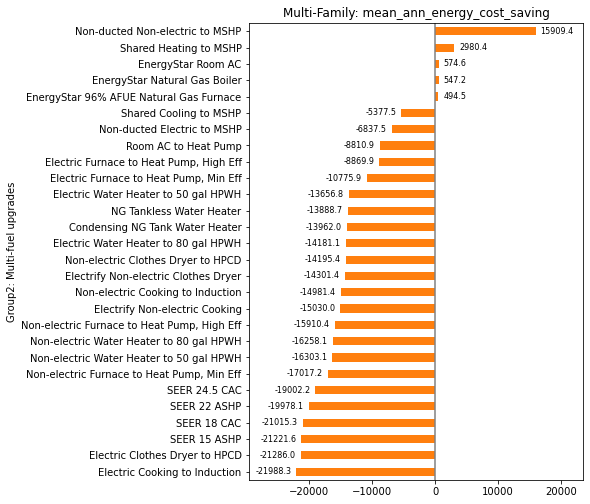

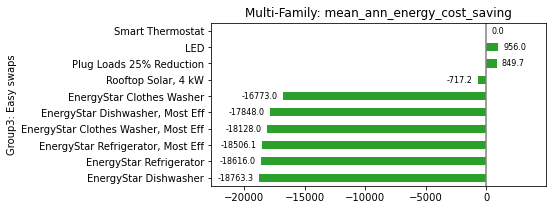

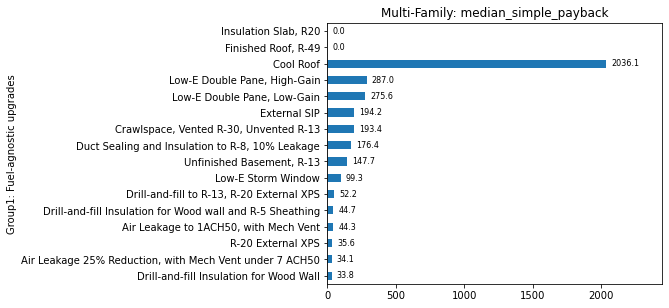

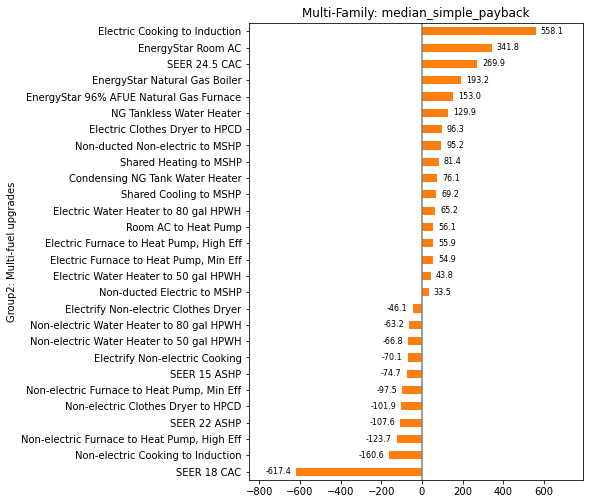

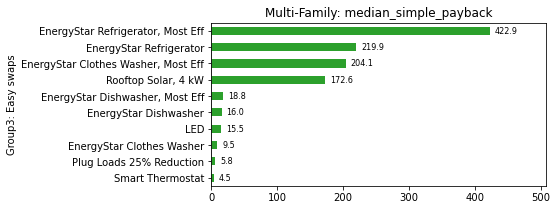

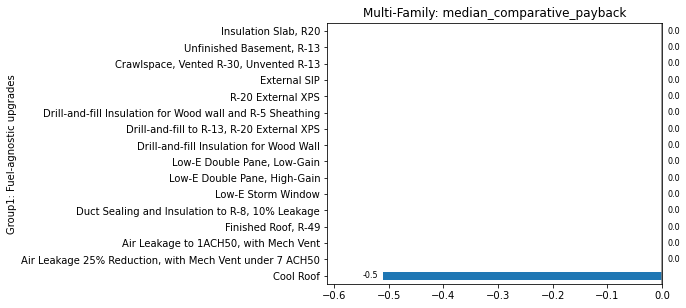

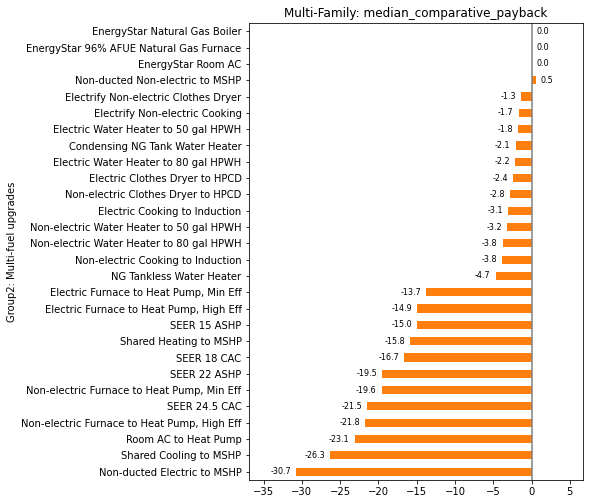

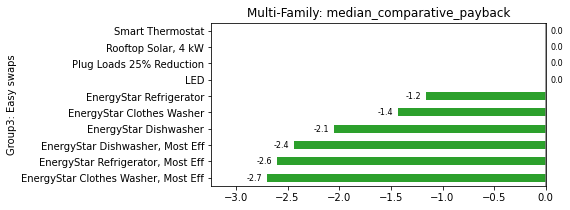

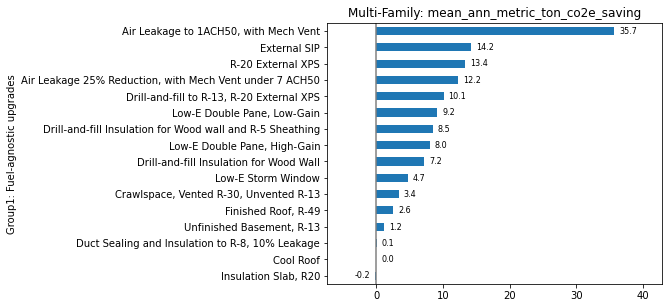

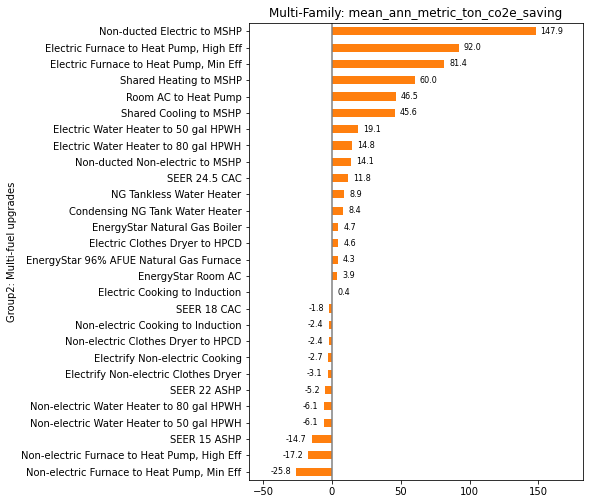

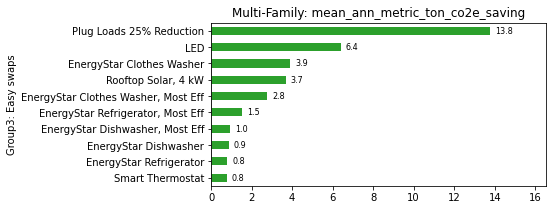

In [130]:
summary_upgrades_mf = summary_upgrades_mf[summary_upgrades_mf['n_success']>0].reset_index(
    drop=True)

upgrade_sets = {
    'Group1: Fuel-agnostic upgrades': range(1, 23),
    'Group2: Multi-fuel upgrades': range(23, 53),
    'Group3: Easy swaps': range(53, 63),
}
upgrade_set_colors = {
    'Group1: Fuel-agnostic upgrades': 'tab:blue',
    'Group2: Multi-fuel upgrades': 'tab:orange',
    'Group3: Easy swaps': 'tab:green',
}

# create subfolder for plots:
plot_path5 = os.path.join(plot_path, 'mean_values_multi-family')
if not os.path.exists(plot_path5):
    os.mkdir(plot_path5)
print(f'plot dir: {plot_path5}\n')

if NG_rate_multiplier == 1: 
    metrics_to_plot = list(x for x in summary_upgrades_mf.columns if 
                           x.startswith('mean') or x.startswith('median'))
else:
    metrics_to_plot = ['mean_ann_energy_cost_saving', 'median_simple_payback', 'median_comparative_payback']
    
for metric in metrics_to_plot:
    title_ext = '' if fn_ext == '' else f' ({fn_ext.replace("_"," ").lstrip()})'
    title = f'Multi-Family: {metric}{title_ext}'
    print(f'Plotting {title}...')
    
    for n, up in enumerate(upgrade_sets.keys(),1):
        print(f'    - Group{n}')
        
        groupi = summary_upgrades_mf.loc[
            summary_upgrades_mf['upgrade_no'].isin(upgrade_sets[up]),
            ['upgrade_name', metric]
                                        ].set_index(
            ['upgrade_name']).sort_values(by = metric)
        groupi.index.name = up
        
        ht = len(groupi)
        fig, ax = plt.subplots(figsize=(6, 0.3*ht))
        groupi.plot.barh(color=upgrade_set_colors[up], legend=False, title=title, ax=ax)
        
        # For each bar: Place a label ############################
        rects = ax.patches
        for rect in rects:
            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = "{:.1f}".format(x_value)

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha,                      # Horizontally align label differently for
                fontsize=8)                 # positive and negative values. 
            
        ax.margins(x=0.2)    
        ax.axvline(x=0, linestyle='-', color='gray')
        if (metric[-3:]=='eui') & (ax.get_xlim()[0] < -50):
            ax.axvline(x=-50, linestyle='--', color='darkred')
        
        filename = f'MF-upgrades_{iteration}_{metric[5:]}_group{n}{fn_ext}.pdf'
        fig.savefig(os.path.join(plot_path5, filename),
                    bbox_inches='tight')
        

### 3. Optional: Useful aggregations for diagnosis

### Add additional metrics to ResStock results

In [69]:
### get sqft distr by building type and vintage
res_sqft_distr = res.groupby(['build_existing_model.geometry_building_type_recs', 'build_existing_model.vintage_acs',
    'build_existing_model.geometry_floor_area'])['building_id'].count().to_frame()

# normalize
res_sqft_distr = res_sqft_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=2)

# export
res_sqft_distr.to_csv(os.path.join(result_path, 'baseline', 'building_type_vintage_floor_area.csv'), index=True)
print('sqft distr by vintage & bldg type exported')


sqft distr by vintage & bldg type exported


In [73]:
### get foundation type distr by building type, vintage (EE prototype)
print('>> prevalence')
res_found_distr = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage_ee', 'stories',
    'build_existing_model.geometry_foundation_type'])['building_id'].count().to_frame()

# normalize
res_found_distr = res_found_distr.groupby(level = [0,1])['building_id'].apply(lambda x: x/x.sum()).unstack(level=-1)
display(res_found_distr)

print('\n>> gas usage')
res_found_gas = res[res['build_existing_model.geometry_building_type_recs'] =="Single-Family Detached"].groupby(
    ['build_existing_model.geometry_wall_type', 'vintage_ee', 'stories',
    'build_existing_model.geometry_foundation_type'])[
    'simulation_output_report.total_site_natural_gas_therm'].mean().to_frame()
res_found_gas.unstack(level=-1)


>> prevalence


build_existing_model.geometry_foundation_type                          Crawl  \
build_existing_model.geometry_wall_type vintage_ee   stories                   
Masonry                                 1: pre-1942  1: <2 stories  0.067395   
                                                     2: 2+ stories  0.085610   
                                        2: 1942-1978 1: <2 stories  0.118911   
                                                     2: 2+ stories  0.013690   
                                        3: post-1978 1: <2 stories  0.102585   
                                                     2: 2+ stories  0.077565   
WoodStud                                1: pre-1942  1: <2 stories  0.050282   
                                                     2: 2+ stories  0.123120   
                                        2: 1942-1978 1: <2 stories  0.106988   
                                                     2: 2+ stories  0.043855   
                                        3: post-1978 1: <2 stories  0.075724   
                                                     2: 2+ stories  0.073497   

build_existing_model.geometry_foundation_type                       Heated Basement  \
build_existing_model.geometry_wall_type vintage_ee   stories                          
Masonry                                 1: pre-1942  1: <2 stories         0.141469   
                                                     2: 2+ stories         0.163327   
                                        2: 1942-1978 1: <2 stories         0.381566   
                                                     2: 2+ stories         0.058580   
                                        3: post-1978 1: <2 stories         0.206005   
                                                     2: 2+ stories         0.156797   
WoodStud                                1: pre-1942  1: <2 stories         0.093985   
                                                     2: 2+ stories         0.163534   
                                        2: 1942-1978 1: <2 stories         0.239759   
                                                     2: 2+ stories         0.089398   
                                        3: post-1978 1: <2 stories         0.154417   
                                                     2: 2+ stories         0.195991   

build_existing_model.geometry_foundation_type                       Pier and Beam  \
build_existing_model.geometry_wall_type vintage_ee   stories                        
Masonry                                 1: pre-1942  1: <2 stories       0.011536   
                                                     2: 2+ stories       0.009107   
                                        2: 1942-1978 1: <2 stories       0.014963   
                                                     2: 2+ stories       0.001273   
                                        3: post-1978 1: <2 stories       0.019183   
                                                     2: 2+ stories       0.011676   
WoodStud                                1: pre-1942  1: <2 stories       0.001410   
                                                     2: 2+ stories       0.003759   
                                        2: 1942-1978 1: <2 stories       0.018795   
                                                     2: 2+ stories       0.008434   
                                        3: post-1978 1: <2 stories       0.005197   
                                                     2: 2+ stories       0.008909   

build_existing_model.geometry_foundation_type                           Slab  \
build_existing_model.geometry_wall_type vintage_ee   stories                   
Masonry                                 1: pre-1942  1: <2 stories  0.034608   
                                                     2: 2+ stories  0.051002   
                                        2: 1942-1978 1: <2 stories  0.178606   
                                                     2: 2+ stories  0


>> gas usage


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.geometry_foundation_type                                                                      Crawl   
build_existing_model.geometry_wall_type vintage_ee   stories                                                               
Masonry                                 1: pre-1942  1: <2 stories                                        1940.461603      
                                                     2: 2+ stories                                        2458.390036      
                                        2: 1942-1978 1: <2 stories                                        1569.225704      
                                                     2: 2+ stories                                        2085.599435      
                                        3: post-1978 1: <2 stories                                         997.958444      
                                                     2: 2+ stories                                        1465.916083      
WoodStud                                1: pre-1942  1: <2 stories                                        1832.262789      
                                                     2: 2+ stories                                        2339.902964      
                                        2: 1942-1978 1: <2 stories                                        1563.475069      
                                                     2: 2+ stories                                        2059.848575      
                                        3: post-1978 1: <2 stories                                        1106.906242      
                                                     2: 2+ stories                                        1749.793063      

                                                                                    \
build_existing_model.geometry_foundation_type                      Heated Basement   
build_existing_model.geometry_wall_type vintage_ee   stories                         
Masonry                                 1: pre-1942  1: <2 stories      927.833921   
                                                     2: 2+ stories     1610.622552   
                                        2: 1942-1978 1: <2 stories      849.796824   
                                                     2: 2+ stories     1435.606517   
                                        3: post-1978 1: <2 stories      613.756635   
                                                     2: 2+ stories     1130.098897   
WoodStud                                1: pre-1942  1: <2 stories     1073.996908   
                                                     2: 2+ stories     1659.683948   
                                        2: 1942-1978 1: <2 stories      861.448258   
                                                     2: 2+ stories     1541.657212   
                                        3: post-1978 1: <2 stories      661.310294   
                                                     2: 2+ stories     1143.715722   

                                                                                  \
build_existing_model.geometry_foundation_type                      Pier and Beam   
build_existing_model.geometry_wall_type vintage_ee   stories                       
Masonry                                 1: pre-1942  1: <2 stories   1993.172841   
                                                     2: 2+ stories   2648.913123   
                                        2: 1942-1978 1: <2 stories   1795.871929   
                                                     2: 2+ stories   2183.880144   
                                        3: post-1978 1: <2 stories   1517.001083   
                                                     2: 2+ stories   2047.359080   
WoodStud                                1: pre-1942  1: <2 stories   2367.532625   
                                                     2: 2+ stories   2506.8

In [78]:
res[(res['completed_status']=="Success") &
    (res['build_existing_model.geometry_building_type_recs'] == "Single-Family Detached")
   ].groupby(['build_existing_model.vintage', 'build_existing_model.geometry_stories'])[
    'simulation_output_report.total_site_natural_gas_therm','gas_eui', 
    'simulation_output_report.total_site_electricity_kwh', 'elec_eui','sqft'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


simulation_output_report.total_site_natural_gas_therm  \
build_existing_model.vintage build_existing_model.geometry_stories                                                          
1940s                        1                                                                            1165.567346       
                             2                                                                            1663.586278       
                             3                                                                            2902.876088       
1950s                        1                                                                            1151.998294       
                             2                                                                            1758.102403       
                             3                                                                            2356.456906       
1960s                        1                                                                            1210.069079       
                             2                                                                            1803.041217       
                             3                                                                            2253.285793       
1970s                        1                                                                            1085.069685       
                             2                                                                            1568.397085       
                             3                                                                            1992.237307       
1980s                        1                                                                            1023.246750       
                             2                                                                            1562.276096       
                             3                                                                            2130.240485       
1990s                        1                                                                             959.363511       
                             2                                                                            1459.369301       
                             3                                                                            2122.163827       
2000s                        1                                                                             744.748035       
                             2                                                                            1074.057426       
                             3                                                                            1340.696042       
2010s                        1                                                                             651.038006       
                             2                                                                            1200.248688       
                             3                                                                            1918.241436       
<1940                        1                                                                            1480.098034       
                             2                                                                            2005.382117       
                             3                                                                            2718.633120       

                                                                     gas_eui  \
build_existing_model.vintage build_existing_model.geometry_stories             
1940s                        1                                      0.785852   
                             2                                      0.897455   
                             3                                      1.158714   
1950s                        1            